## Problem Statement  

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

## Business Understanding

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Content:

    1. Data Understanding and Exploration
    2. Data Cleaning
    3. Data Preparation
    4. Model building and evaluation

## 1. Data Understanding and Exploration


### Important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the maximum display columns and rows
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

##  Importing data

In [3]:
data = pd.read_csv("train.csv")

## Understanding data

In [4]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
data.shape

(1460, 81)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

##### Target Variable

In [8]:
data.SalePrice.describe([0.5, 0.75, 0.90, 0.95, 0.99, 1])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
50%      163000.000000
75%      214000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64

There are definitely some outliers in this column


## 2. Data Cleaning

#### Checking for duplicates

In [9]:
sum(data.duplicated(subset = 'Id'))

0

now Id variabe is of no use. so dropping it.

In [10]:
data.drop('Id', inplace = True, axis = 1)

#### Checking for null

In [11]:
def getnull():
    return data.isnull().mean()[data.isnull().mean()  >0].sort_values(ascending = False)* 100

getnull()

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

According to data dictionary-

    'PoolQC' - 'NA' => 'No Pool'
    'MiscFeature' - 'NA' => 'None'
    'Alley' - 'NA' => 'No alley Access'
    'Fence' - 'NA' => 'No Fence'
    'FireplaceQu' - "NA" => 'No Fireplace'
    'GarageCond' - "NA" => 'No Garage'
    'GarageQual' - "NA" => 'No Garage'
    'GarageFinish' - "NA" => 'No Garage'
    'GarageYrBlt' - "NA" => 'No Garage'
    'GarageType' - "NA" => 'NO Garage'
    'BsmtFinType2' - "NA" => 'No Basement'
    'BsmtExposure' - "NA" => 'No Basement'
    'BsmtFinType1' - "NA" => 'No Basement'
    'BsmtCond' - "NA" => 'No Basement'
    'BsmtQual' - "NA" => 'No Basement'

So we need not to treat these columns now.

'LotFrontage', 'MasVnrArea', 'MasVnrType'and 'Electrical' have real null values so we need to treat these features accordingly.


Replacing non null "NA" values with none and quality and condition level as 0. 

In [12]:
not_null = ['PoolQC','MiscFeature','Alley',
    'Fence','FireplaceQu','GarageCond',
    'GarageQual','GarageFinish','GarageYrBlt',
    'GarageType','BsmtFinType2','BsmtExposure',
    'BsmtFinType1','BsmtCond','BsmtQual']

for i in not_null:
    if i in ['GarageYrBlt']:
        data[i].fillna(2021, inplace = True)  
    else:   
        data[i].fillna("None", inplace = True)

In [13]:

getnull()

LotFrontage    17.739726
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

### Null Imputation 

imputing median in missing values in 'LotFrontage'

<AxesSubplot:>

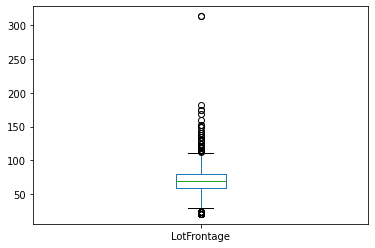

In [14]:
data['LotFrontage'].plot.box()

we have alot of outliers here so we should use median as imputing value

In [15]:
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace = True)

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

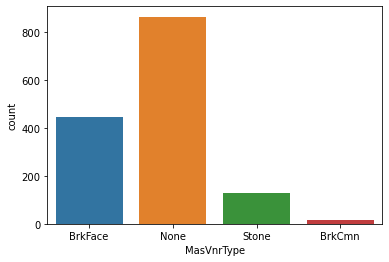

In [16]:
sns.countplot(data['MasVnrType'])

we can impute "NA" here as "None" as well

In [17]:
data['MasVnrType'].fillna("None", inplace = True)

<AxesSubplot:xlabel='MasVnrArea'>

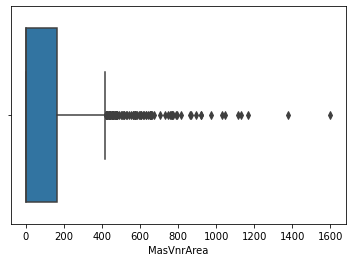

In [18]:
sns.boxplot(data['MasVnrArea'])

this tells us that MasVnrArea have quite a few outliers, we need to impute null values as median.

In [19]:
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace = True)

<AxesSubplot:xlabel='Electrical', ylabel='count'>

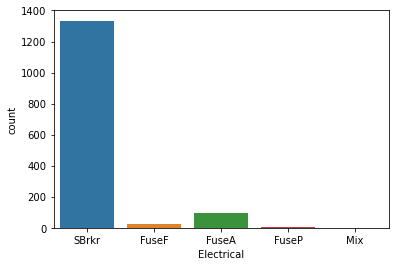

In [20]:
sns.countplot(data['Electrical'])

here we can fill null values as "others" as we do not know specifically what the values can be.

In [21]:
data['Electrical'].fillna('others', inplace= True)

In columns 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'BsmtFintype2', 'BsmtExposure', 'BsmtFintype1', 'BsmtCond' and 'BsmtQual' null value indicates non existence of the facility. we can not impute it with statistical mean or median or mode. let's write 0'' in numerical column and 'none' in categorical column.

In [22]:
data[['GarageCond', 'GarageQual', 'GarageFinish',
      'GarageYrBlt', 'GarageType', 'BsmtFinType2', 
      'BsmtExposure', 'BsmtFinType1', 'BsmtCond' , 'BsmtQual']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageCond    1460 non-null   object 
 1   GarageQual    1460 non-null   object 
 2   GarageFinish  1460 non-null   object 
 3   GarageYrBlt   1460 non-null   float64
 4   GarageType    1460 non-null   object 
 5   BsmtFinType2  1460 non-null   object 
 6   BsmtExposure  1460 non-null   object 
 7   BsmtFinType1  1460 non-null   object 
 8   BsmtCond      1460 non-null   object 
 9   BsmtQual      1460 non-null   object 
dtypes: float64(1), object(9)
memory usage: 114.2+ KB


##### we can do label encoding for some ordinal categorical variables


In [23]:
ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','HeatingQC',
 'KitchenQual','FireplaceQu','PoolQC']

label = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    'None':0
    
}


for i  in ordinal:
    data[i] = data[i].map(label)


In [24]:

data[ordinal].head()

ExterQual  ExterCond  BsmtQual  BsmtCond  GarageQual  GarageCond  \
0          4          3         4         3           3           3   
1          3          3         4         3           3           3   
2          4          3         4         3           3           3   
3          3          3         3         4           3           3   
4          4          3         4         3           3           3   

   HeatingQC  KitchenQual  FireplaceQu  PoolQC  
0          5            4            0       0  
1          5            3            3       0  
2          5            4            3       0  
3          4            4            4       0  
4          5            4            3       0

In [25]:
getnull()

Series([], dtype: float64)

#### DataTypes 

In [26]:
data.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   ExterQual    ExterCond  \
count  1460.000000   1460.000000  1460.000000  1460.00000  1460.000000   
mean   1971.267808   1984.865753   103.117123     3.39589     3.083562   
std      30.202904     20.645407   180.731373     0.57428     0.351054   
min    1872.000000   1950.000000     0.000000     2.00000     1.000000   
25%    1954.000000   1967.000000     0.000000     3.00000     3.000000   
50%    1973.000000   1994.000000     0.000000     3.00000     3.000000   
75%    2000.000000   2004.000000   164.250000     4.00000     3.000000   
90%    2006.000000   2006.000000   335.000000     4.00000     4.000000   
95%    2007.000000   2007.000000   456.000000     4.00000     4.000000   
99%    2009.000000   2009.000000   791.280000     5.00000     4.000000   
max    2010.000000   2010.000000  1600.000000     5.00000     5.000000   

          BsmtQual     BsmtCond   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      3.489041     2.934932   443.639726    46.549315   567.240411   
std       0.876478     0.552159   456.098091   161.319273   441.866955   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     3.000000     0.000000     0.000000   223.000000   
50%       4.000000     3.000000   383.500000     0.000000   477.500000   
75%       4.000000     3.000000   712.250000     0.000000   808.000000   
90%       4.000000     3.000000  1065.500000   117.200000  1232.000000   
95%       5.000000     3.000000  1274.000000   396.200000  1468.000000   
99%       5.000000     4.000000  1572.410000   830.380000  1797.050000   
max       5.000000     4.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF    HeatingQC     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean   1057.429452     4.145205  1162.626712   346.992466      5.844521   
std     438.705324     0.959501   386.587738   436.528436     48.623081   
min       0.000000     1.000000   334.000000     0.000000      0.000000   
25%     795.750000     3.000000   882.000000     0.000000      0.000000   
50%     991.500000     5.000000  1087.000000     0.000000      0.000000   
75%    1298.250000     5.000000  1391.250000   728.000000      0.000000   
90%    1602.200000     5.000000  1680.000000   954.200000      0.000000   
95%    1753.000000     5.000000  1831.250000  1141.050000      0.000000   
99%    2155.050000     5.000000  2219.460000  1418.920000    360.000000   
max    6110.000000     5.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000    

'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'FirePlaces', 'GarageCars','MoSold', 

In [27]:
data['MoSold'] = data['MoSold'].astype('category')



In [28]:
obj_col = data.select_dtypes(include='object').columns

In [29]:
data[obj_col] = data[data.select_dtypes(include='object').columns].astype('category')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [31]:
data[['GarageCond', 'GarageQual', 'GarageFinish',
                      'GarageType', 'BsmtFinType2', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtCond' , 'BsmtQual']].fillna('None', axis =1, inplace = True)

In [32]:
getnull()

Series([], dtype: float64)

we have some columns containing years of construction and renovation of house, garage or basement.
So converting year column to number or calculate the age for the column YearBuilt, YearRemodAdd, GarageYrBlt, YrSold

In [33]:
data['AgeYearBuilt'] = 2021 - data['YearBuilt']
data['AgeYearRemodAdd'] = 2021 - data['YearRemodAdd']
data['AgeGarageYrBlt'] = 2021 - data['GarageYrBlt']
data['AgeYrSold'] = 2021 - data['YrSold']

dropping year columns as they are of no use now.

In [34]:
data.drop([ 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1, inplace = True)

checking newly made features

In [35]:
data[['AgeYearBuilt','AgeYearRemodAdd','AgeGarageYrBlt','AgeYrSold']].head()

AgeYearBuilt  AgeYearRemodAdd  AgeGarageYrBlt  AgeYrSold
0            18               18            18.0         13
1            45               45            45.0         14
2            20               19            20.0         13
3           106               51            23.0         15
4            21               21            21.0         13

## Univariate analysis

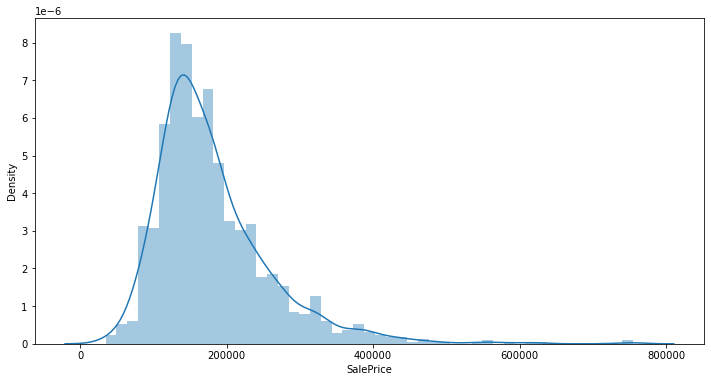

In [36]:
sns.distplot(data['SalePrice'])
fig = plt.gcf()
fig.set_size_inches(12,6)

SalePrice data have a lot of out liers and is highly skewed we need to take care of them. one way is to remove all outliers or capping, but we may loose information. we can use transformation as well.



#### using log transformation

In [37]:
data['SalePrice_log'] = np.log(data['SalePrice'])
data.drop('SalePrice', axis = 1, inplace = True)

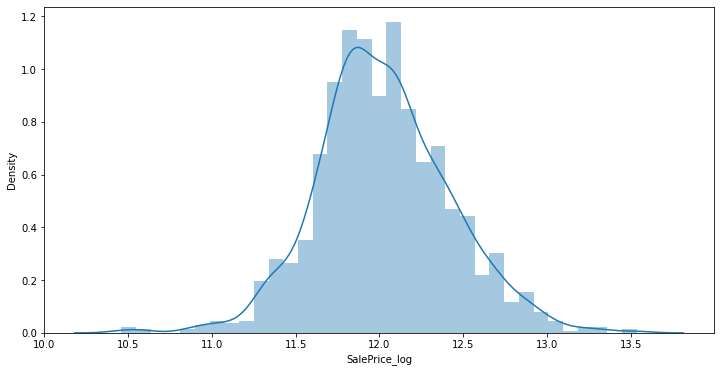

In [38]:
sns.distplot(data['SalePrice_log'])
fig = plt.gcf()
fig.set_size_inches(12,6)

looks like using log tranformation worked for us.

### Categorical Columns


Visualising categorical variables

In [39]:
cat_col = list(data.select_dtypes(include='category').columns)

------------------------------------------------------------------------------------------------------------------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


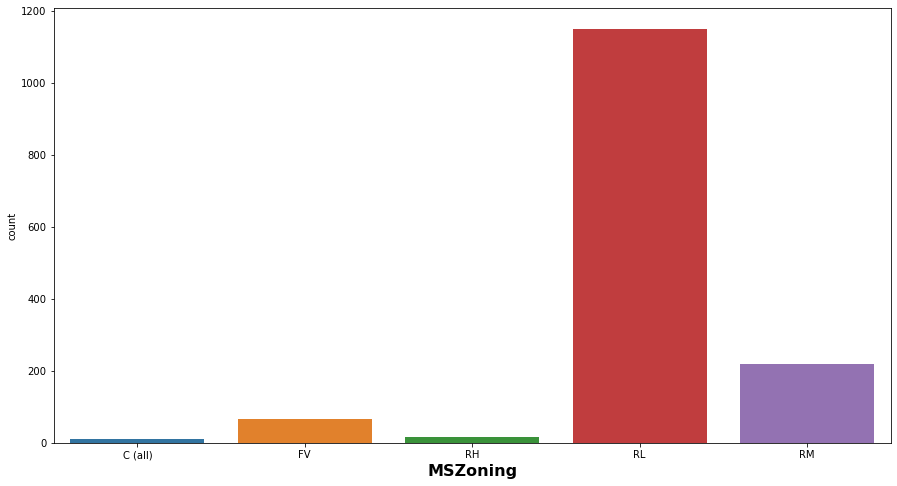

------------------------------------------------------------------------------------------------------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64


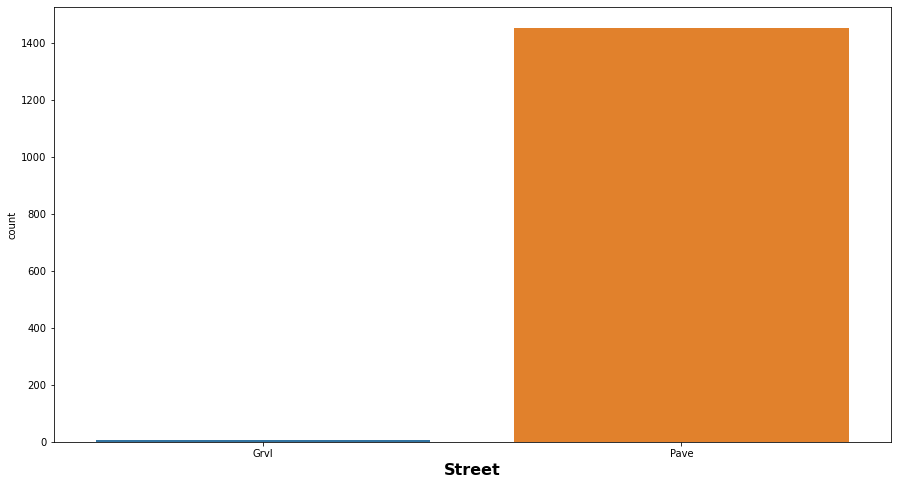

------------------------------------------------------------------------------------------------------------------------
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


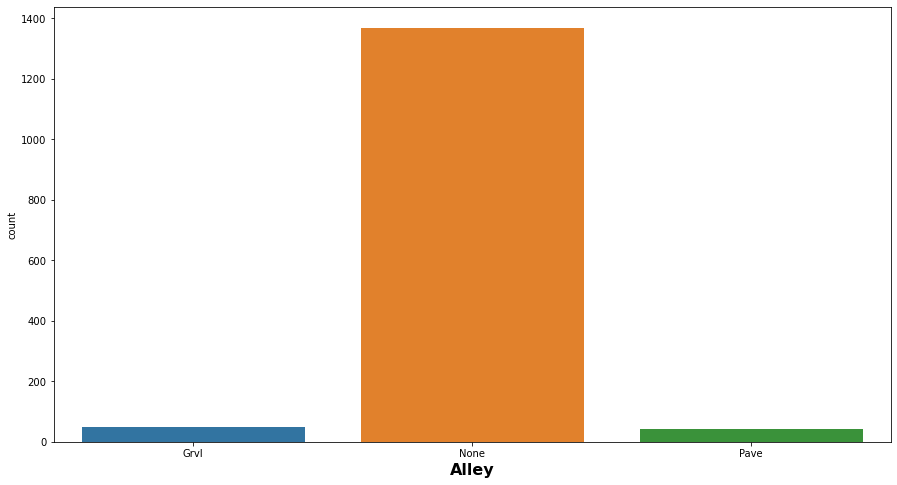

------------------------------------------------------------------------------------------------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


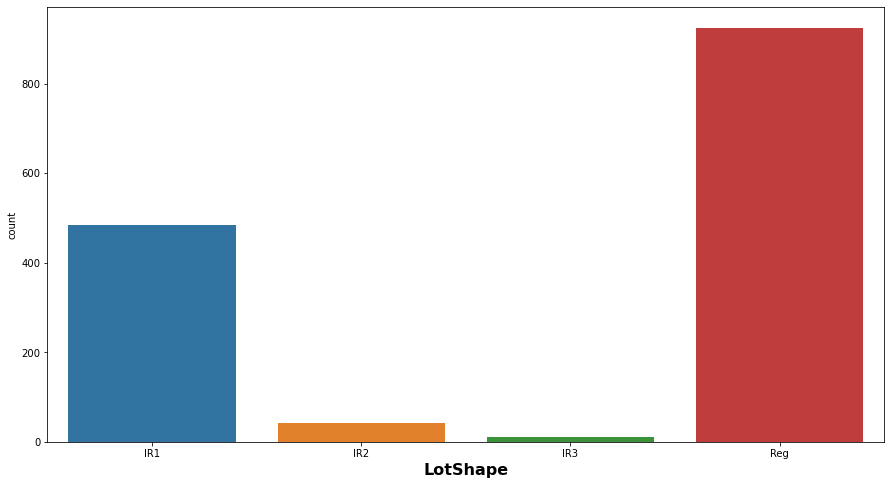

------------------------------------------------------------------------------------------------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


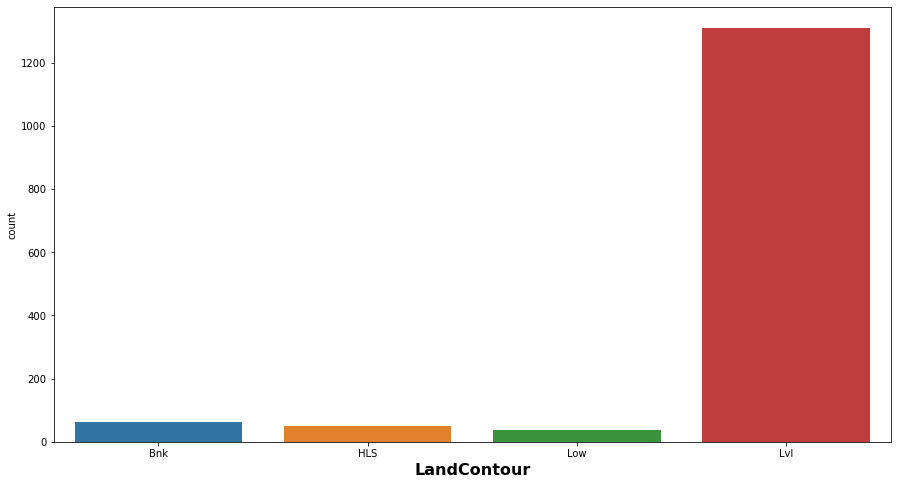

------------------------------------------------------------------------------------------------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


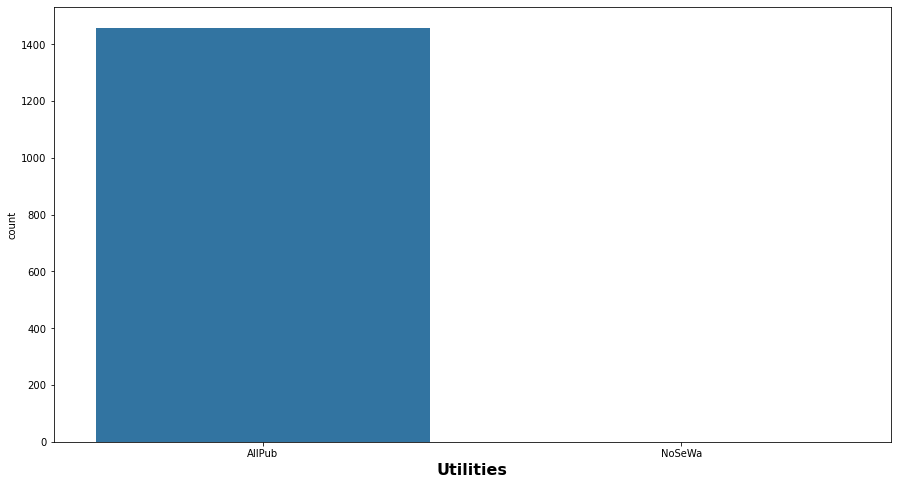

------------------------------------------------------------------------------------------------------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


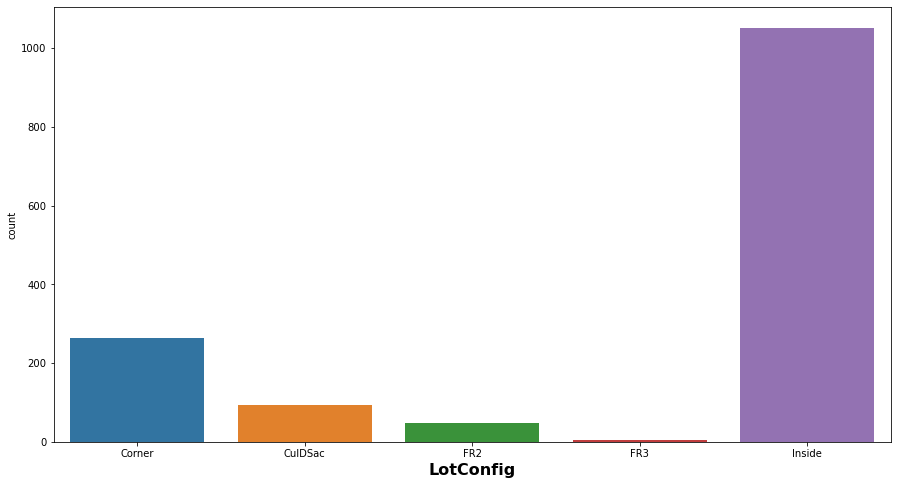

------------------------------------------------------------------------------------------------------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


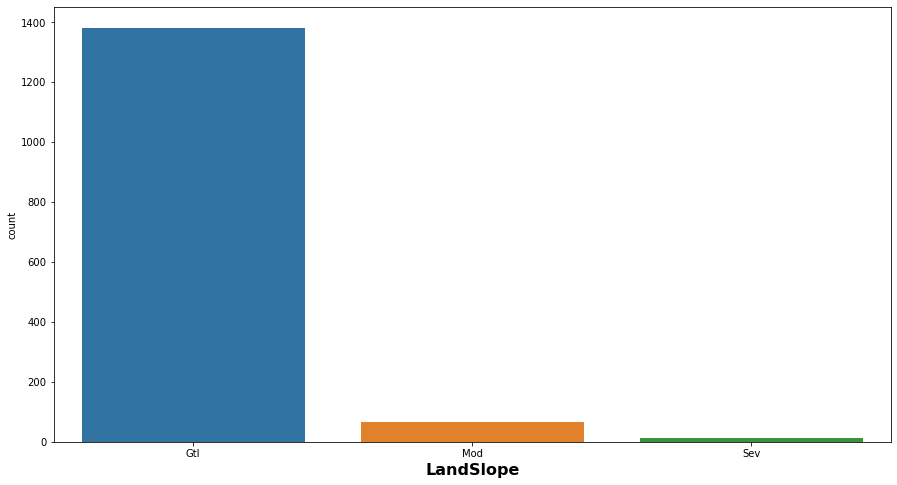

------------------------------------------------------------------------------------------------------------------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


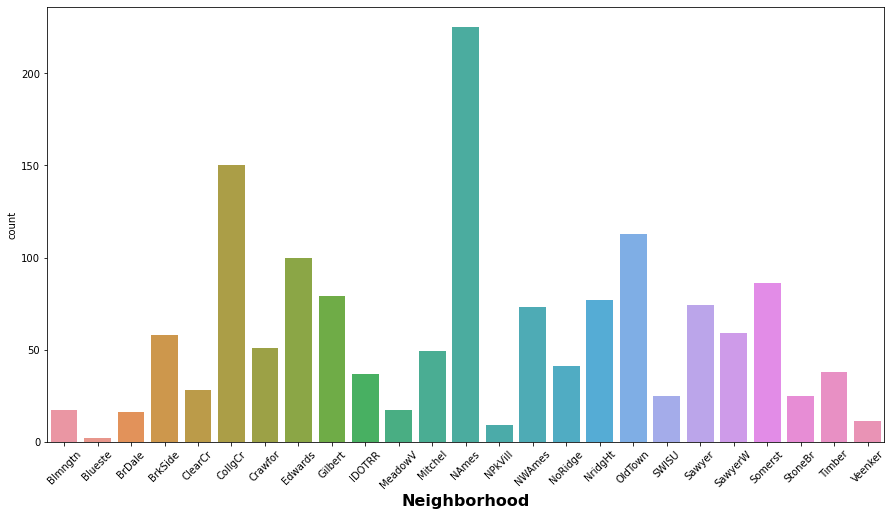

------------------------------------------------------------------------------------------------------------------------
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


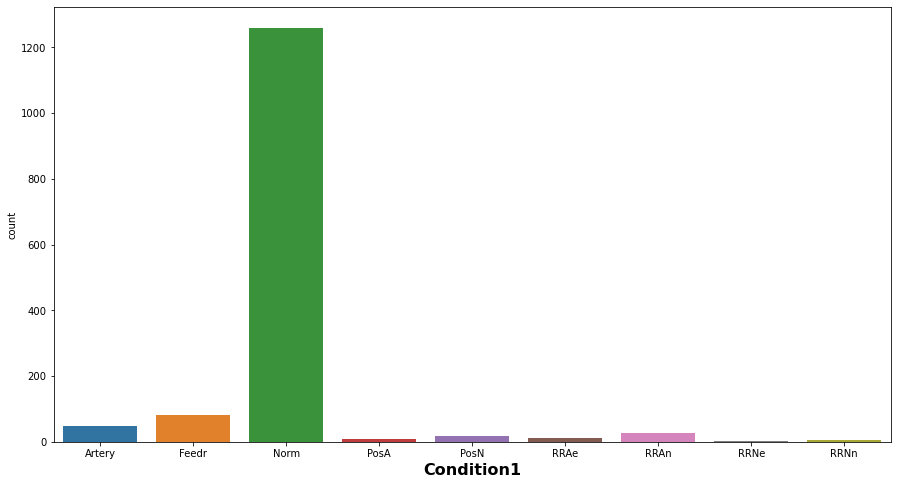

------------------------------------------------------------------------------------------------------------------------
Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


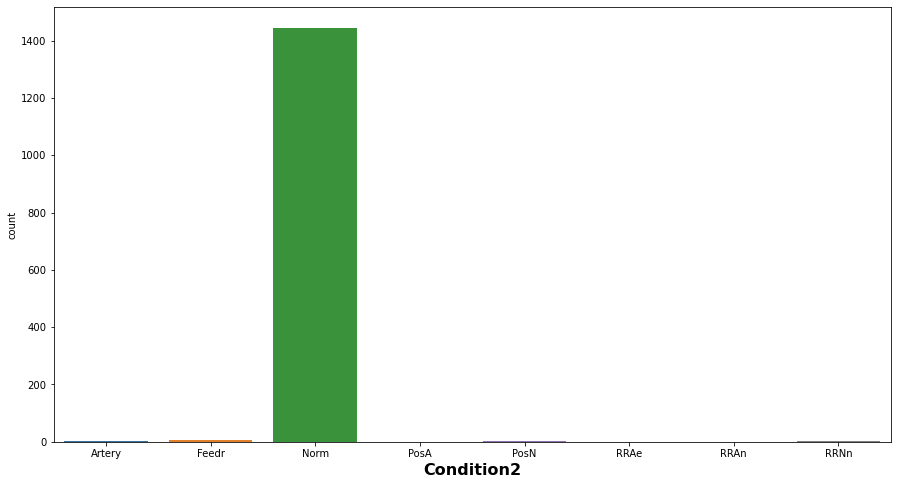

------------------------------------------------------------------------------------------------------------------------
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


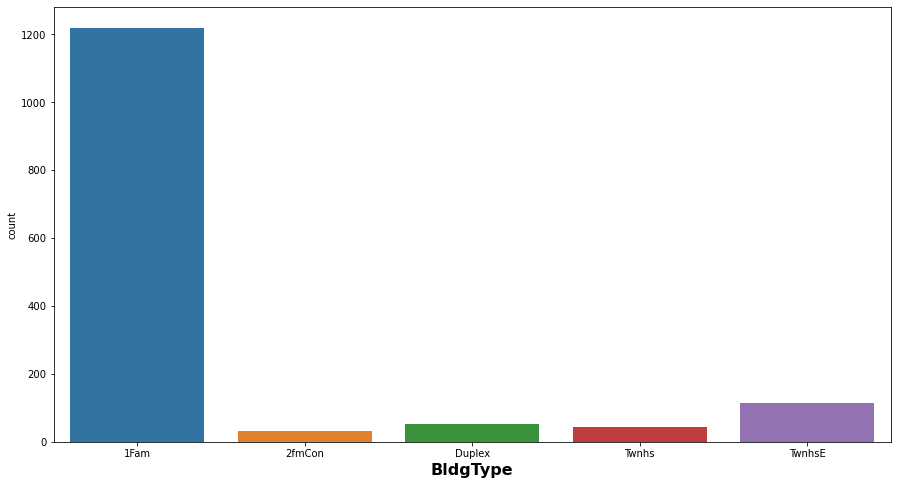

------------------------------------------------------------------------------------------------------------------------
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


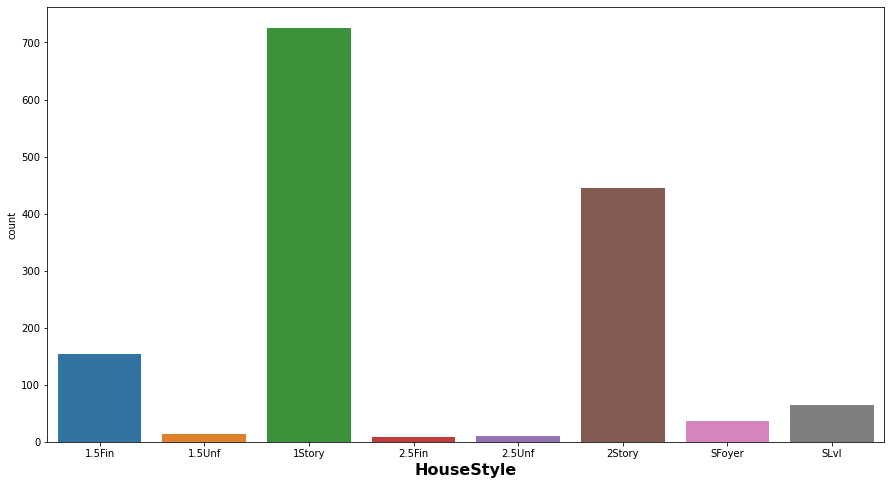

------------------------------------------------------------------------------------------------------------------------
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


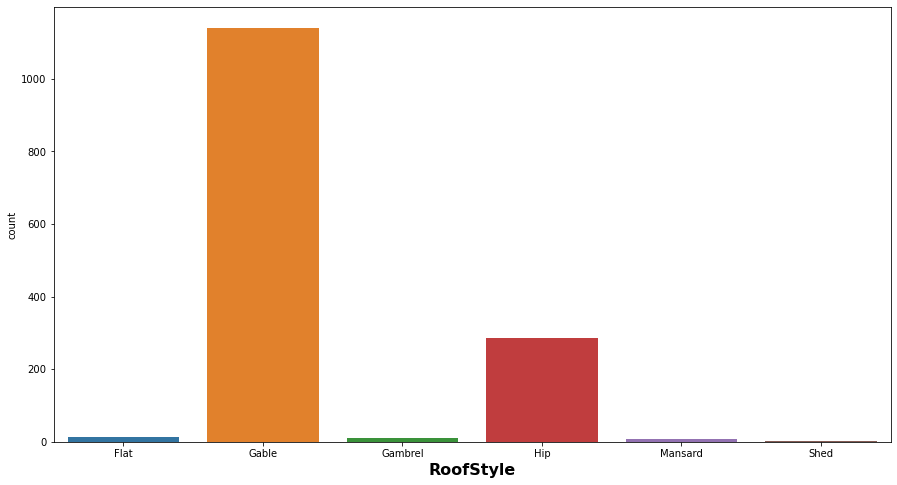

------------------------------------------------------------------------------------------------------------------------
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64


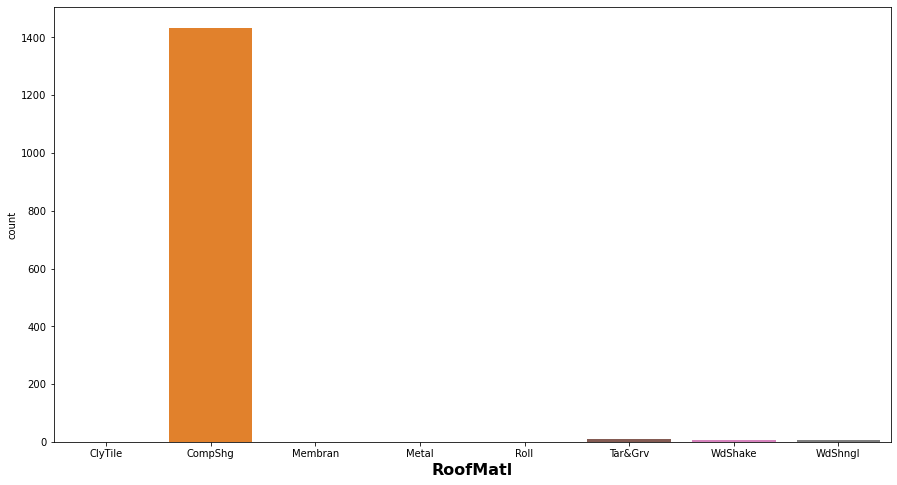

------------------------------------------------------------------------------------------------------------------------
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64


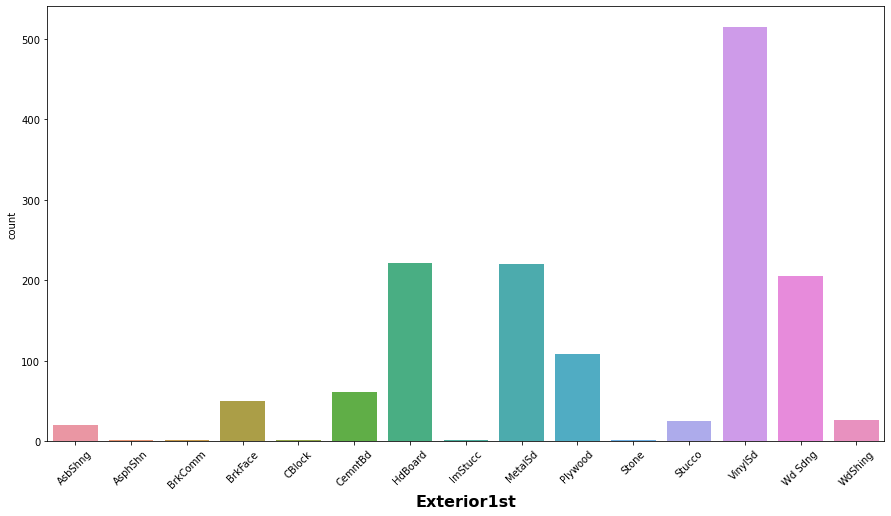

------------------------------------------------------------------------------------------------------------------------
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


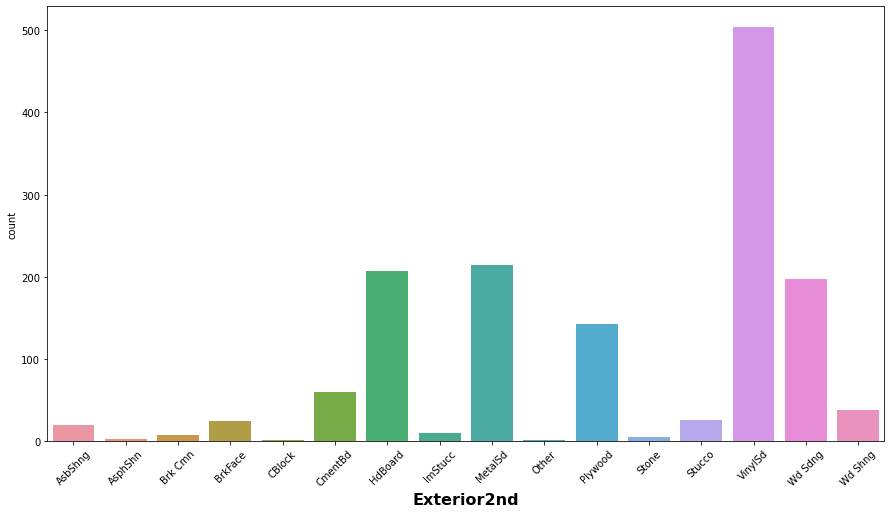

------------------------------------------------------------------------------------------------------------------------
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


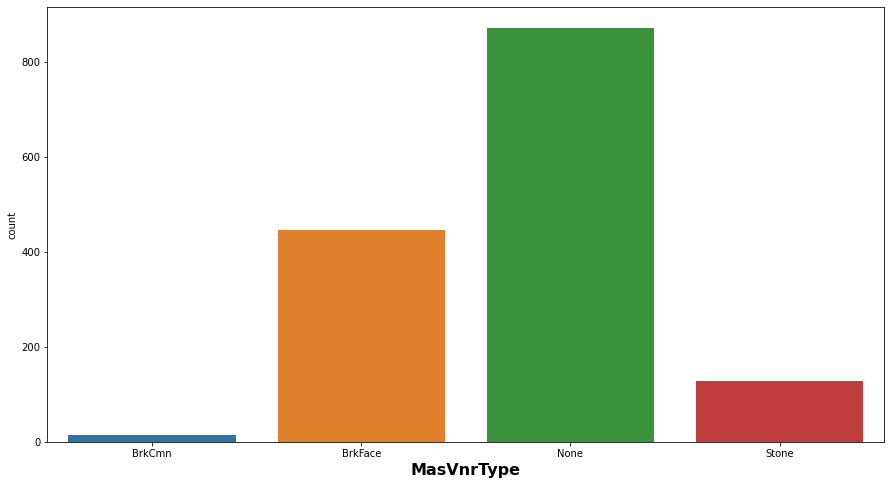

------------------------------------------------------------------------------------------------------------------------
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


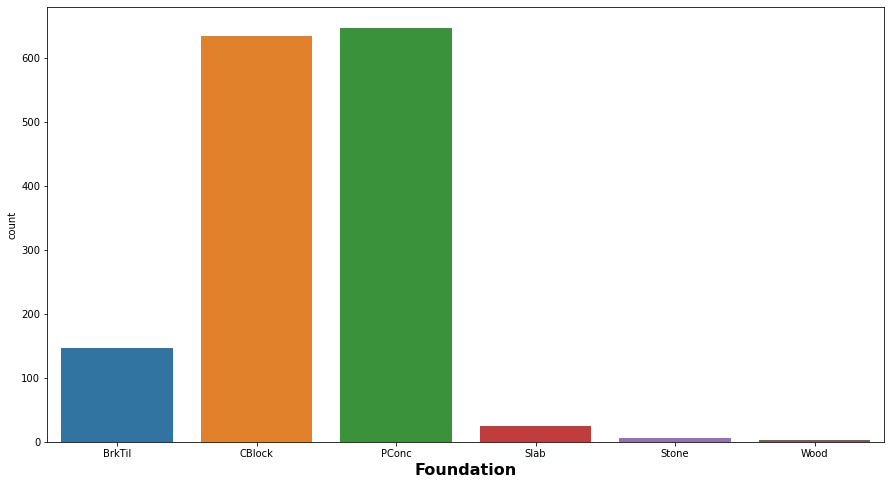

------------------------------------------------------------------------------------------------------------------------
No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64


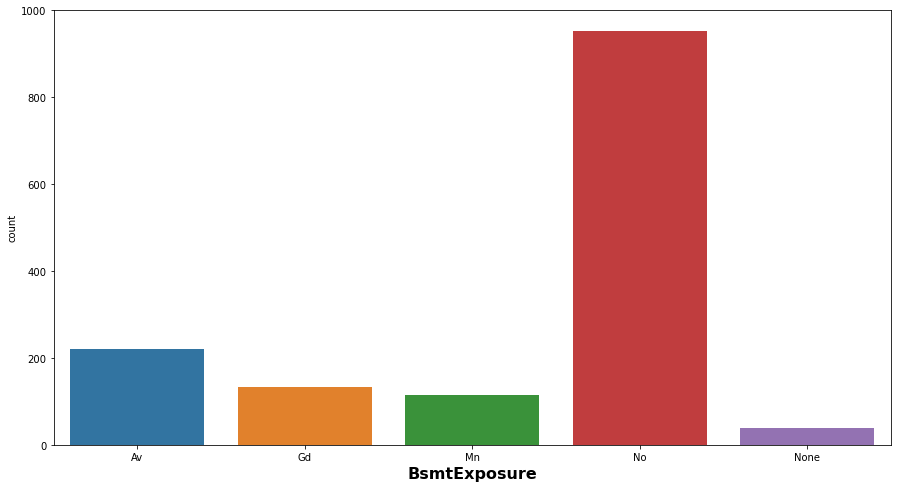

------------------------------------------------------------------------------------------------------------------------
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64


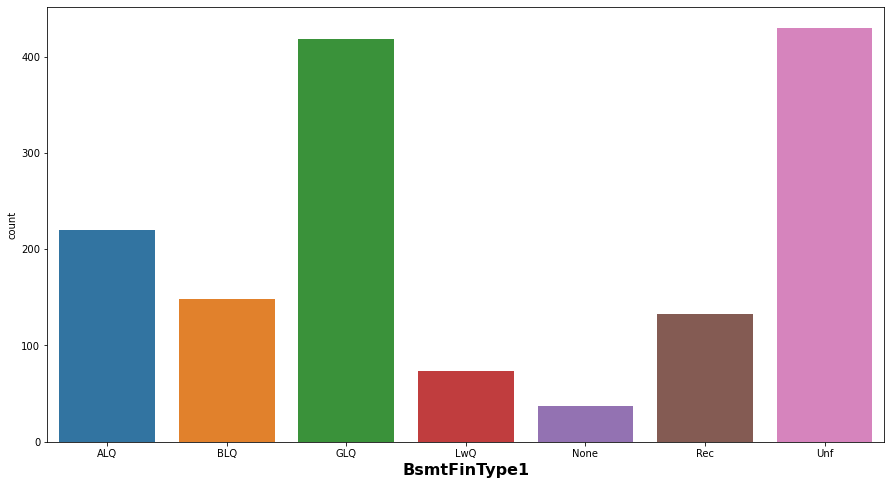

------------------------------------------------------------------------------------------------------------------------
Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64


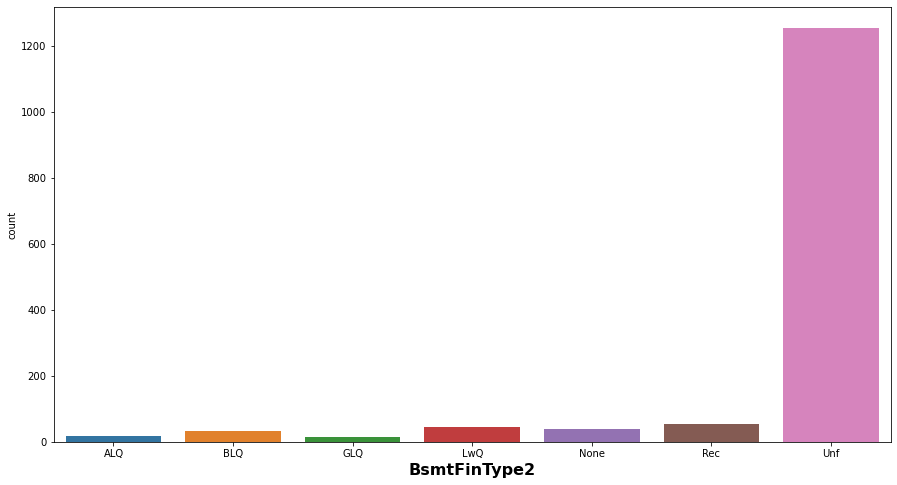

------------------------------------------------------------------------------------------------------------------------
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


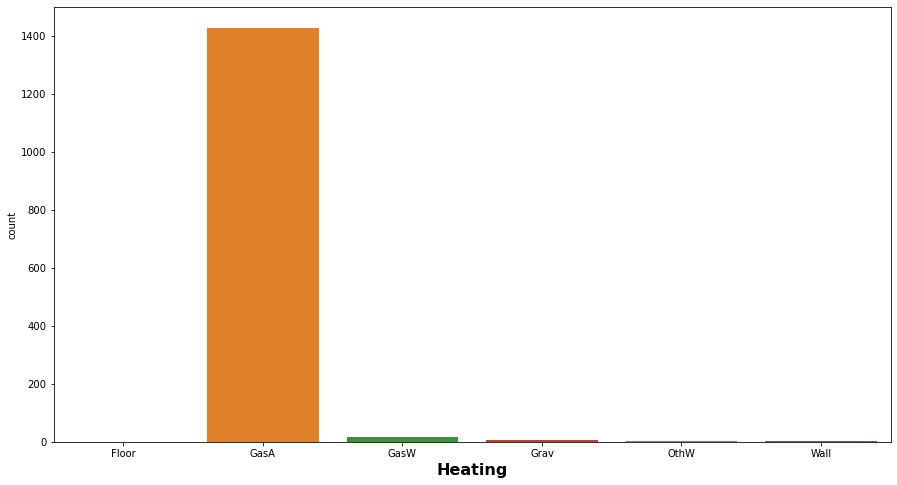

------------------------------------------------------------------------------------------------------------------------
Y    1365
N      95
Name: CentralAir, dtype: int64


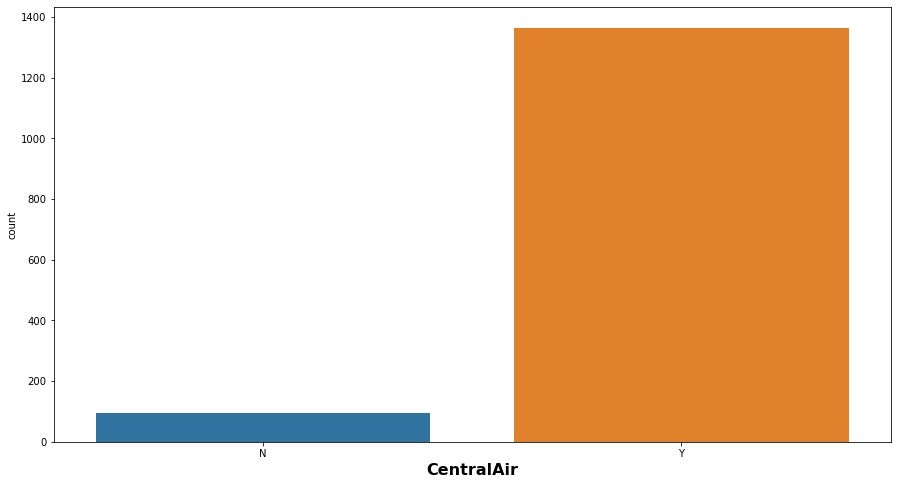

------------------------------------------------------------------------------------------------------------------------
SBrkr     1334
FuseA       94
FuseF       27
FuseP        3
others       1
Mix          1
Name: Electrical, dtype: int64


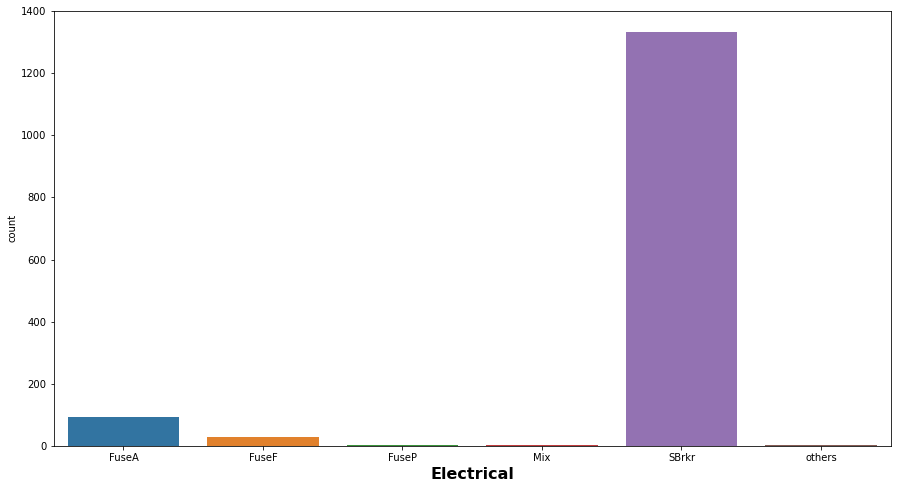

------------------------------------------------------------------------------------------------------------------------
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


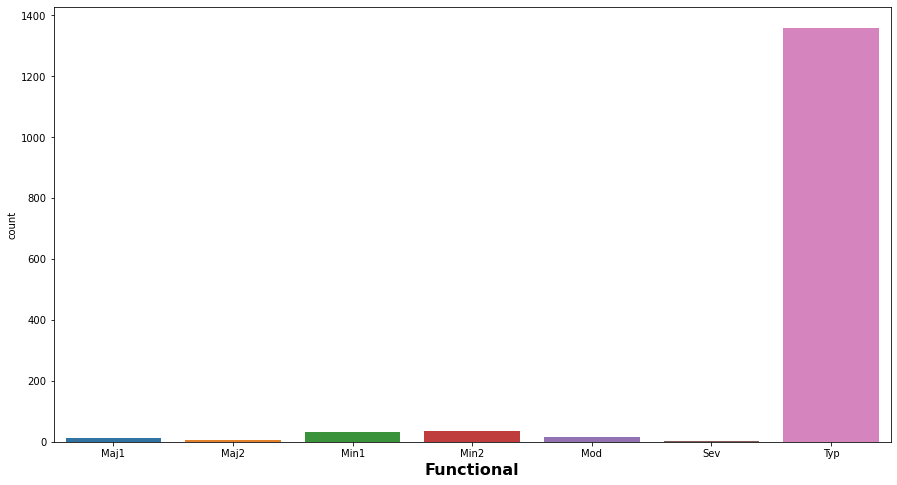

------------------------------------------------------------------------------------------------------------------------
Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


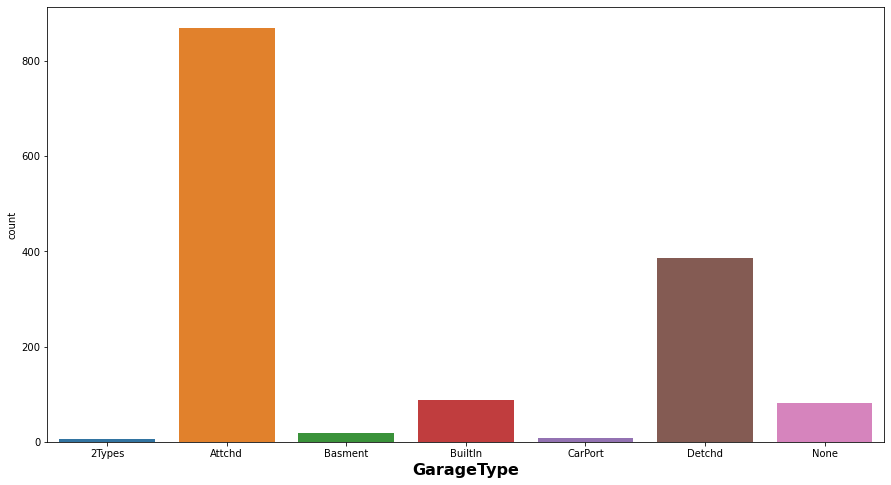

------------------------------------------------------------------------------------------------------------------------
Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64


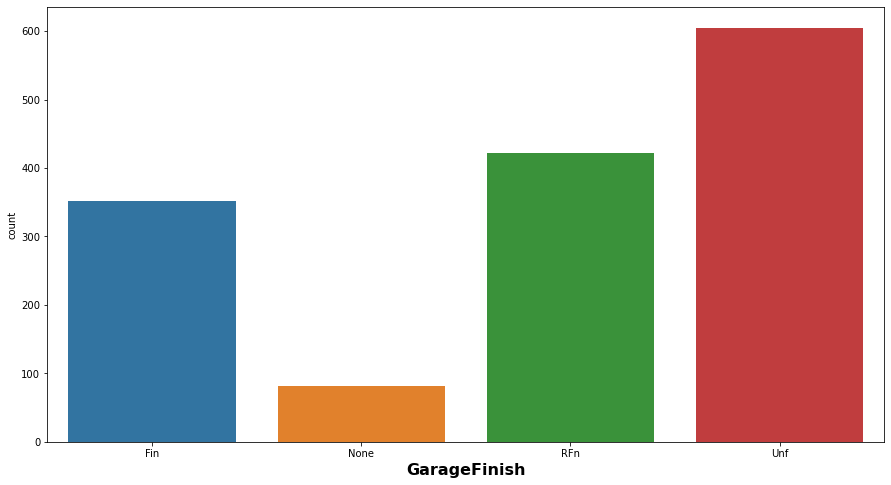

------------------------------------------------------------------------------------------------------------------------
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


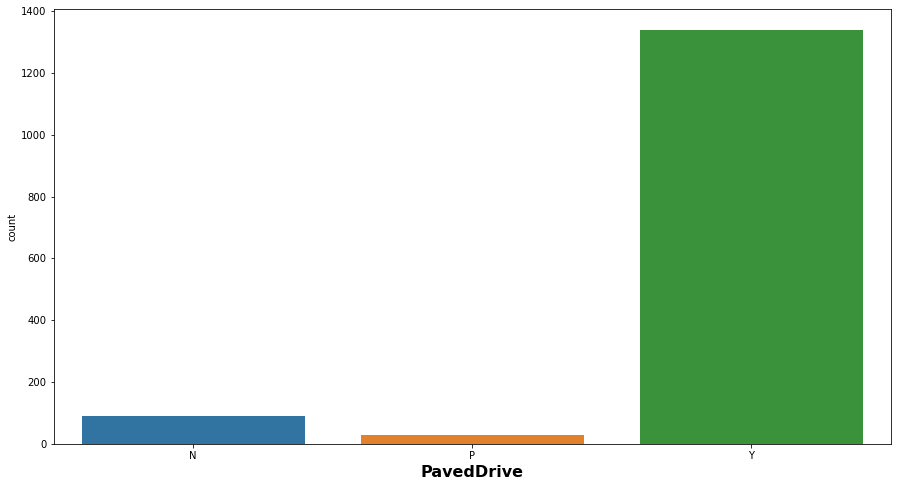

------------------------------------------------------------------------------------------------------------------------
None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


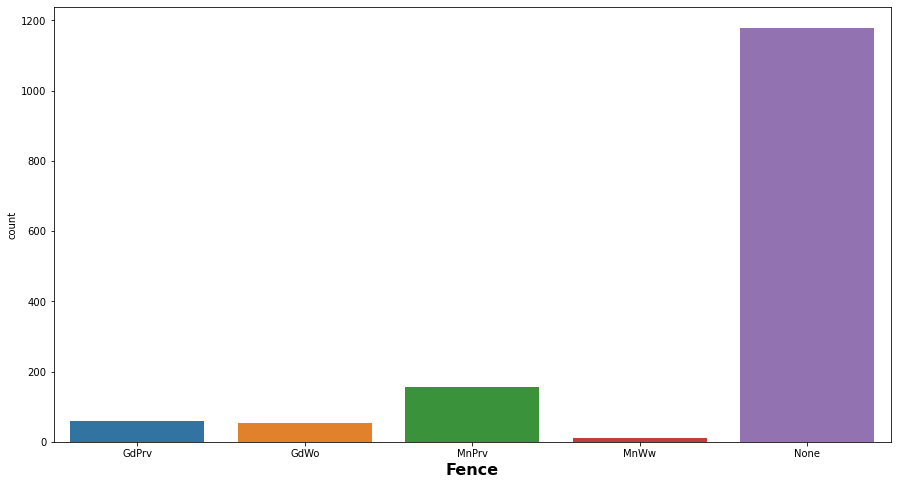

------------------------------------------------------------------------------------------------------------------------
None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64


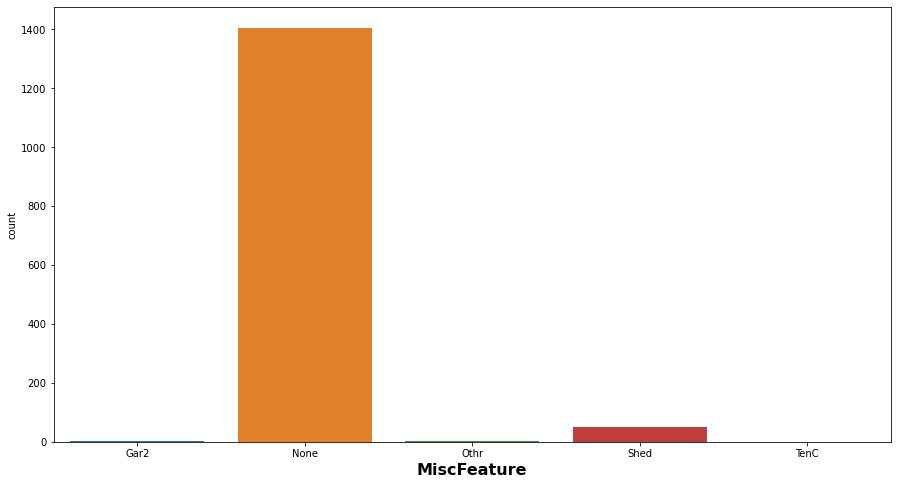

------------------------------------------------------------------------------------------------------------------------
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


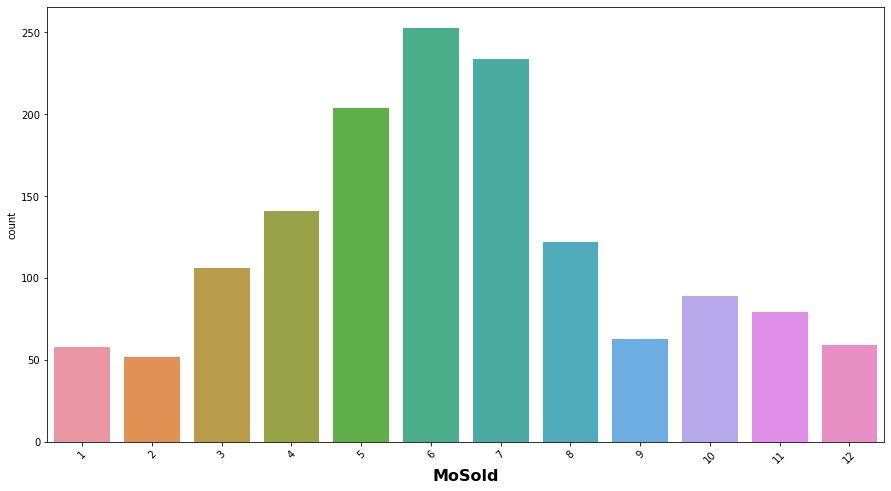

------------------------------------------------------------------------------------------------------------------------
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


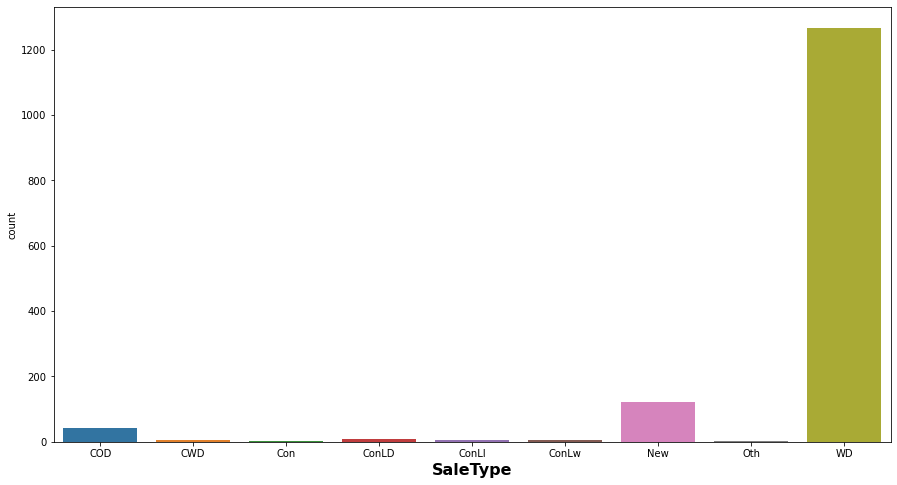

------------------------------------------------------------------------------------------------------------------------
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


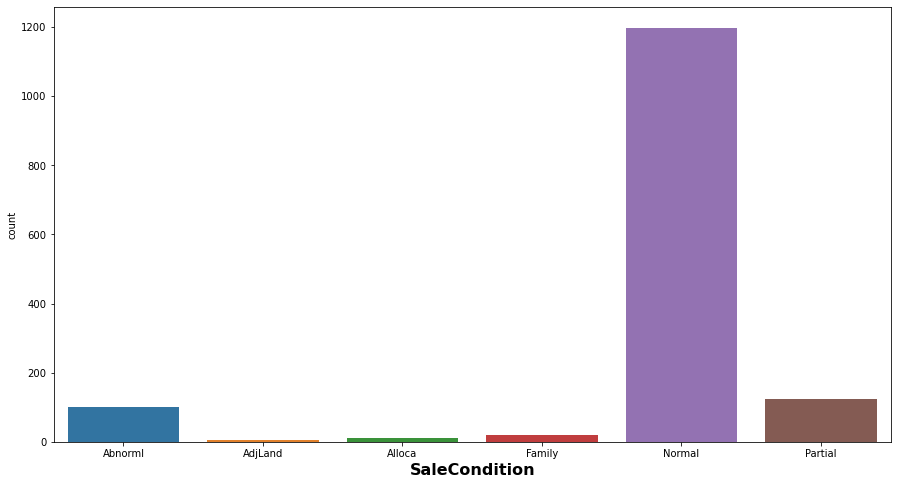

In [40]:
for i in cat_col:
    
    print("----"* 30)
    print(data[i].value_counts())
    sns.countplot(data[i])
    fig = plt.gcf()
    fig.set_size_inches(15,8)
    plt.xlabel(i,weight='bold', fontsize=16)
    if data[i].nunique() > 10:
        plt.xticks(rotation = 45)
    plt.show()


#### Dropping highly skewed categorical features

There are alot of highly skewed columns we can drop them. Names are 'Street', 'Utilities', 'Condition1', 'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'KitchenAbvGr', 'Functions', 'GarageQual' ,'GarageCond'.

In [41]:
data.drop(['Street', 'Utilities', 'Condition1',
           'Condition2', 'RoofMatl', 'BsmtCond',
           'BsmtFinType2', 'Heating', 'KitchenAbvGr',
           'Functional', 'GarageQual' ,'GarageCond'], axis=1, inplace = True)

### Merging categories 

There are some features with excess categories we can combine low value categories in categorical columns to reduce number of dummy variables to be formed later.


##### MSZoning


In [42]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [43]:
data['MSZoning'].replace(['FV','RH','C (all)'],'others', inplace = True)

##### BldgType

In [44]:
data['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [45]:
data['BldgType'].replace(['Duplex', 'Twnhs', '2fmCon'],'Duplex & others', inplace = True)

##### HouseStyle

In [46]:
data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [47]:
data['HouseStyle'].replace(['SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'],'others', inplace = True)

##### RoofStyle

In [48]:
data['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [49]:
data['RoofStyle'].replace(['Flat', 'Gambrel', 'Mansard', 'Shed'],'others', inplace = True)

##### Exterior1st

In [50]:
data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [51]:
data['Exterior1st'].replace(['AsphShn', 'CBlock', 'ImStucc',
                             'Stone', 'BrkComm', 'AsbShng',
                            'Stucco', 'WdShing', 'BrkFace', 'CemntBd'],'others', inplace = True)

##### Exterior2nd

In [52]:
data['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [53]:
data['Exterior2nd'].replace(['CBlock', 'Other', 'AsphShn',
                             'Stone', 'Brk Cmn', 'ImStucc',
                            'AsbShng', 'CmentBd', 'Wd Shng', 
                            'Stucco', 'BrkFace'],'others', inplace = True)

##### Foundation

In [54]:
data['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [55]:
data['Foundation'].replace(['Wood', 'Stone', 'Slab'],'others', inplace = True)

##### Electrical

In [56]:
data['Electrical'].value_counts()

SBrkr     1334
FuseA       94
FuseF       27
FuseP        3
others       1
Mix          1
Name: Electrical, dtype: int64

In [57]:
data['Electrical'].replace(['FuseF', 'FuseP', 'Mix'],'others', inplace = True)

##### LotConfig

In [58]:
data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

##### Garagetype

In [59]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [60]:
data['GarageType'].replace(['2Types', 'CarPort', 'Basement','BuiltIn'],'others', inplace = True)

##### SaleType

In [61]:
data['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [62]:
data['SaleType'].replace(['COD', 'ConLD', 'ConLw', 'ConLI', 'CWD', 'Oth', 'Con'],'others', inplace = True)

##### SaleCondition

In [63]:
data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [64]:
data['SaleCondition'].replace(['AdjLand', 'Alloca', 'Family'],'others', inplace = True)

### Numerical columns

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
5%         20.000000
10%        20.000000
50%        50.000000
75%        70.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


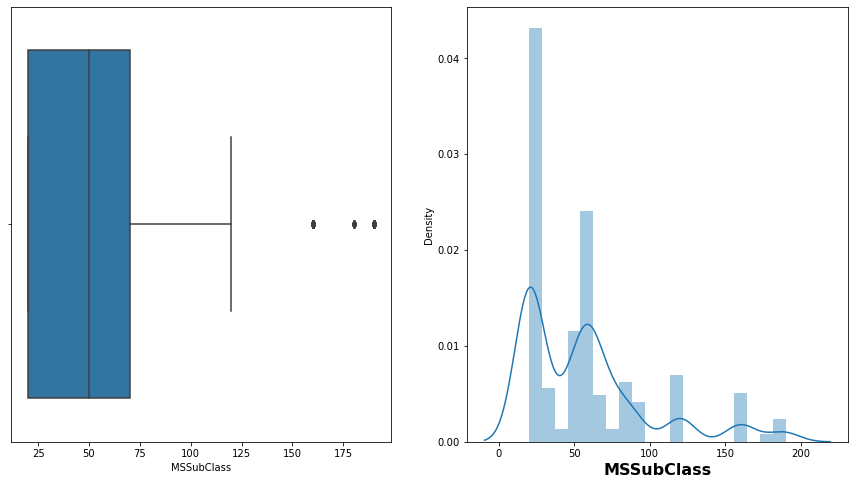

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
5%         35.950000
10%        49.000000
50%        69.000000
75%        79.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64


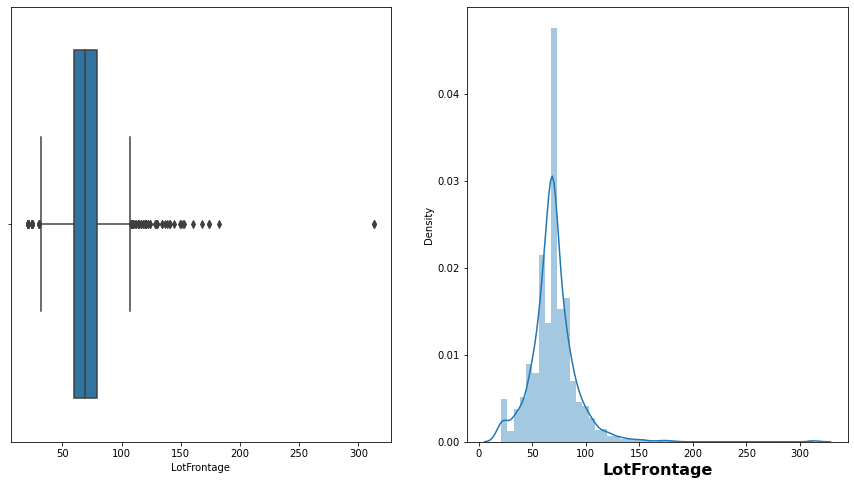

------------------------------------------------------------------------------------------------------------------------
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
5%         3311.700000
10%        5000.000000
50%        9478.500000
75%       11601.500000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64


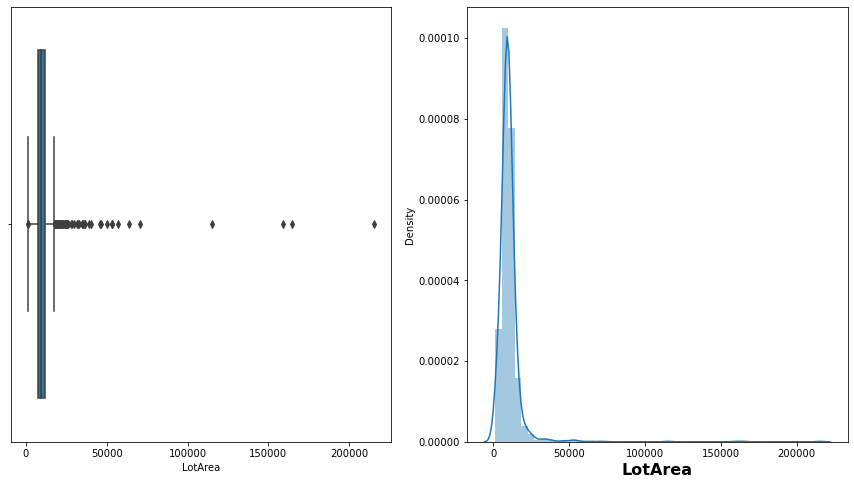

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
5%          4.000000
10%         5.000000
50%         6.000000
75%         7.000000
90%         8.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: OverallQual, dtype: float64


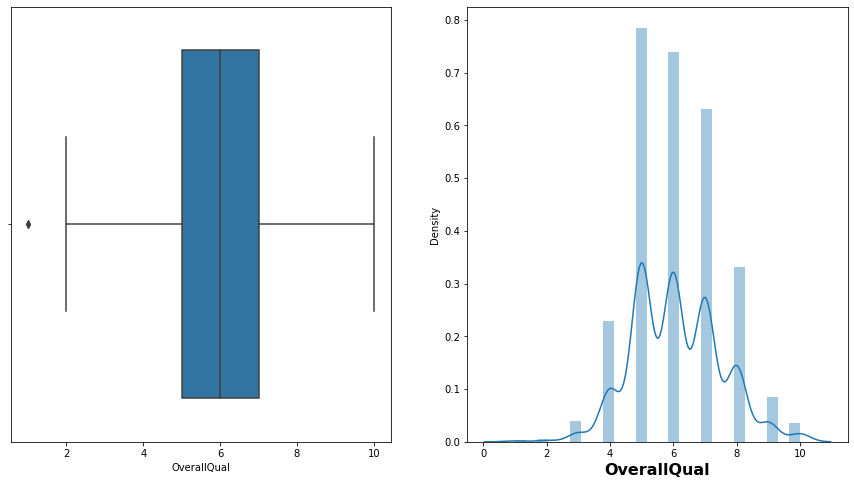

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
5%          4.000000
10%         5.000000
50%         5.000000
75%         6.000000
90%         7.000000
95%         8.000000
99%         9.000000
max         9.000000
Name: OverallCond, dtype: float64


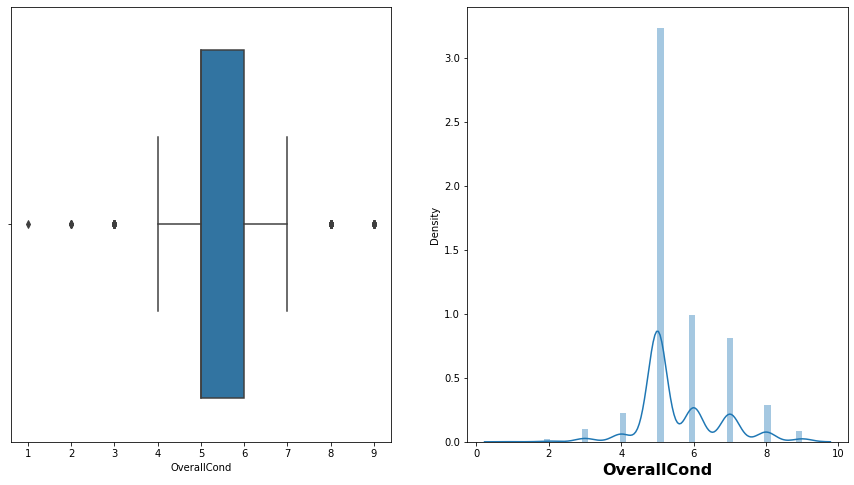

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%       164.250000
90%       335.000000
95%       456.000000
99%       791.280000
max      1600.000000
Name: MasVnrArea, dtype: float64


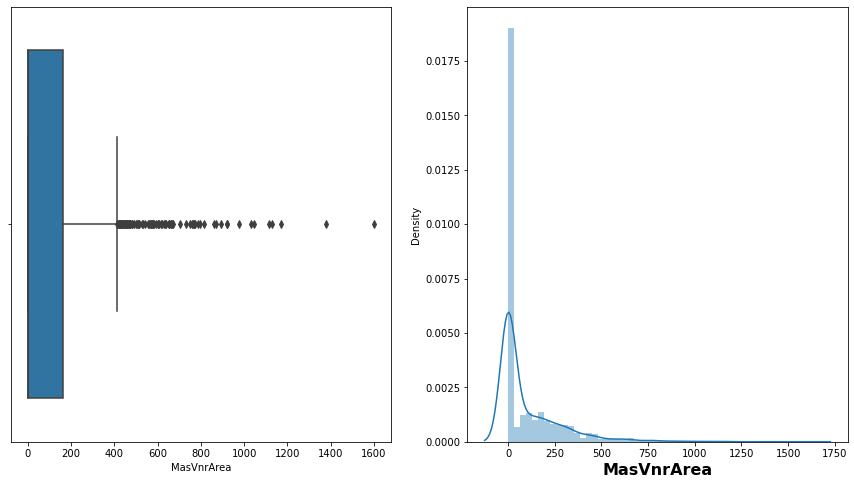

------------------------------------------------------------------------------------------------------------------------
count    1460.00000
mean        3.39589
std         0.57428
min         2.00000
5%          3.00000
10%         3.00000
50%         3.00000
75%         4.00000
90%         4.00000
95%         4.00000
99%         5.00000
max         5.00000
Name: ExterQual, dtype: float64


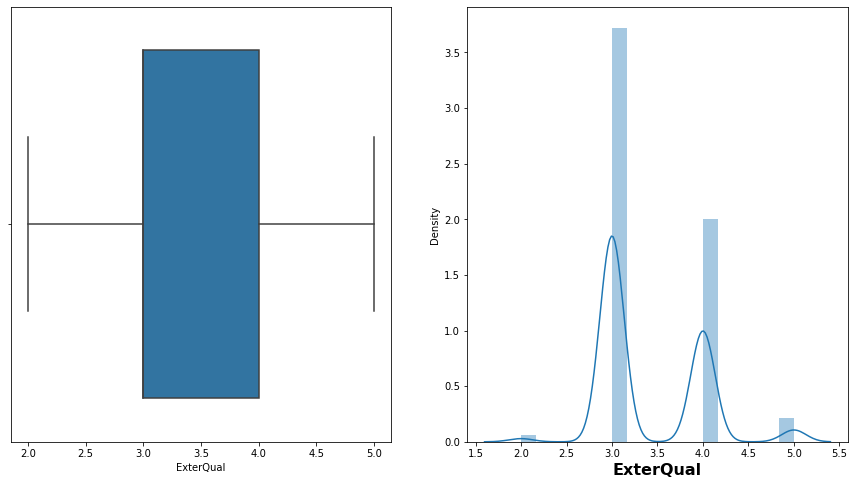

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        3.083562
std         0.351054
min         1.000000
5%          3.000000
10%         3.000000
50%         3.000000
75%         3.000000
90%         4.000000
95%         4.000000
99%         4.000000
max         5.000000
Name: ExterCond, dtype: float64


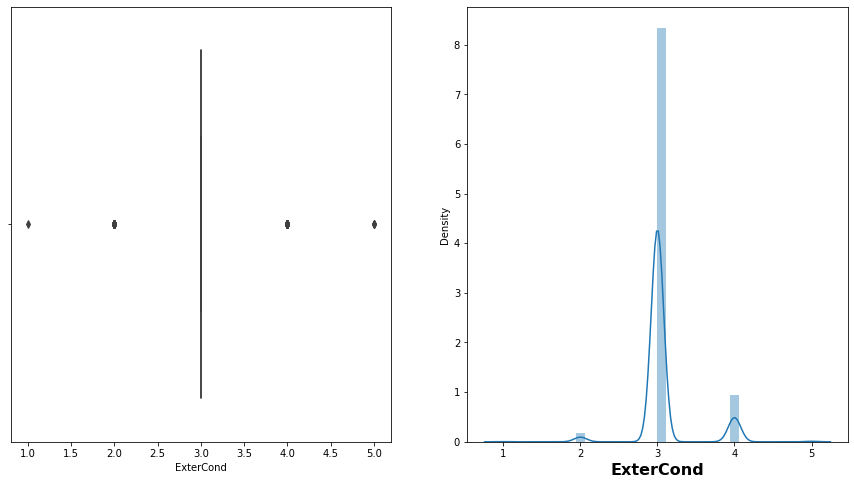

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        3.489041
std         0.876478
min         0.000000
5%          3.000000
10%         3.000000
50%         4.000000
75%         4.000000
90%         4.000000
95%         5.000000
99%         5.000000
max         5.000000
Name: BsmtQual, dtype: float64


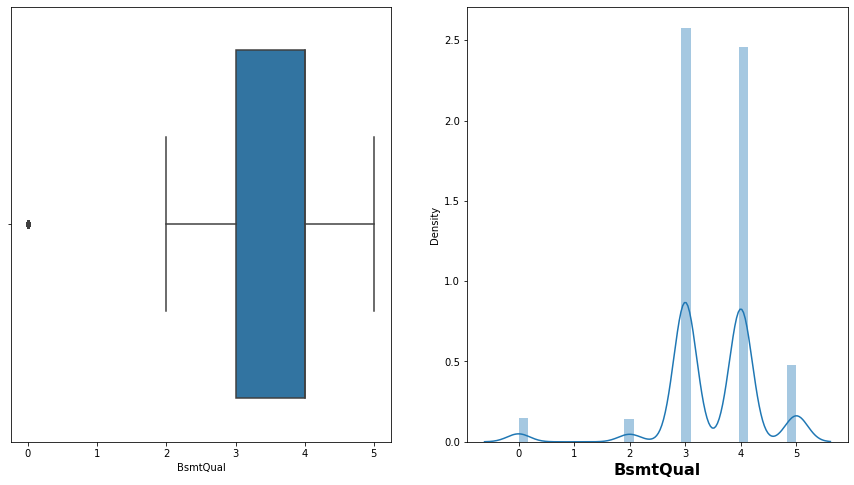

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
5%          0.000000
10%         0.000000
50%       383.500000
75%       712.250000
90%      1065.500000
95%      1274.000000
99%      1572.410000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


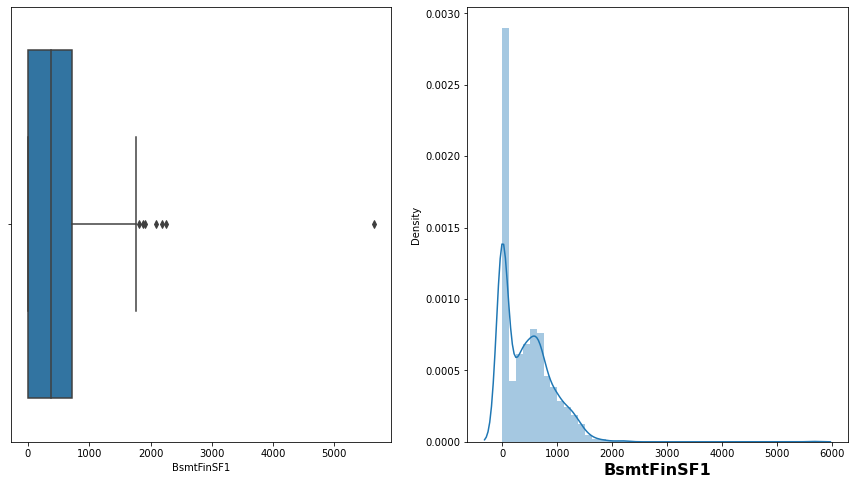

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         0.000000
90%       117.200000
95%       396.200000
99%       830.380000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


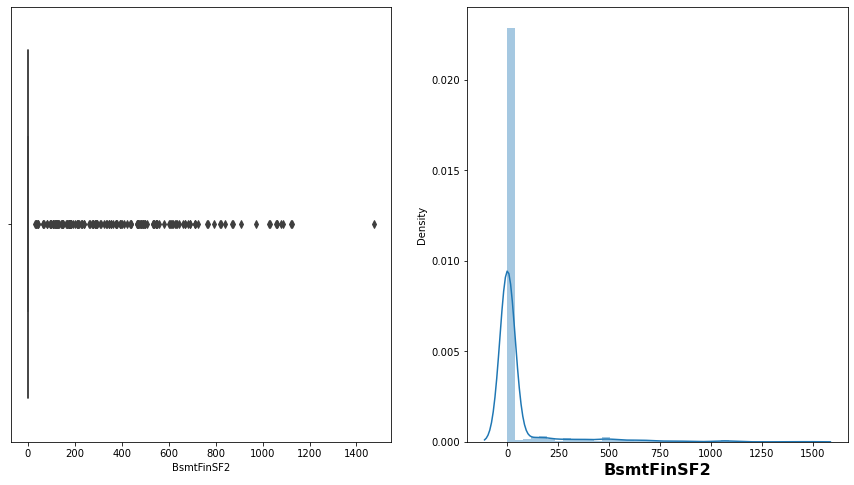

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
5%          0.000000
10%        74.900000
50%       477.500000
75%       808.000000
90%      1232.000000
95%      1468.000000
99%      1797.050000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


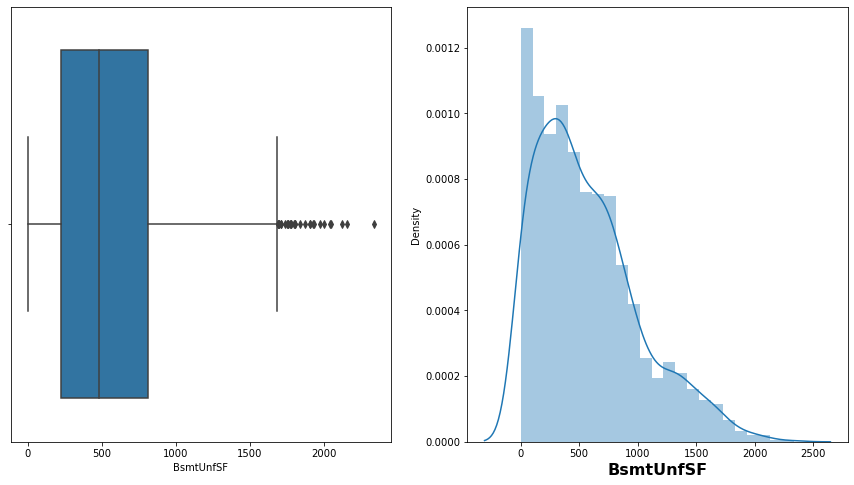

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
5%        519.300000
10%       636.900000
50%       991.500000
75%      1298.250000
90%      1602.200000
95%      1753.000000
99%      2155.050000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


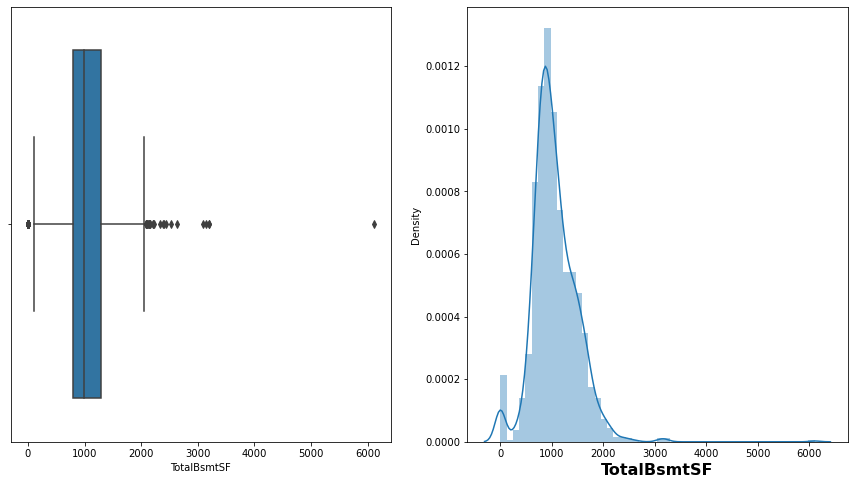

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        4.145205
std         0.959501
min         1.000000
5%          3.000000
10%         3.000000
50%         5.000000
75%         5.000000
90%         5.000000
95%         5.000000
99%         5.000000
max         5.000000
Name: HeatingQC, dtype: float64


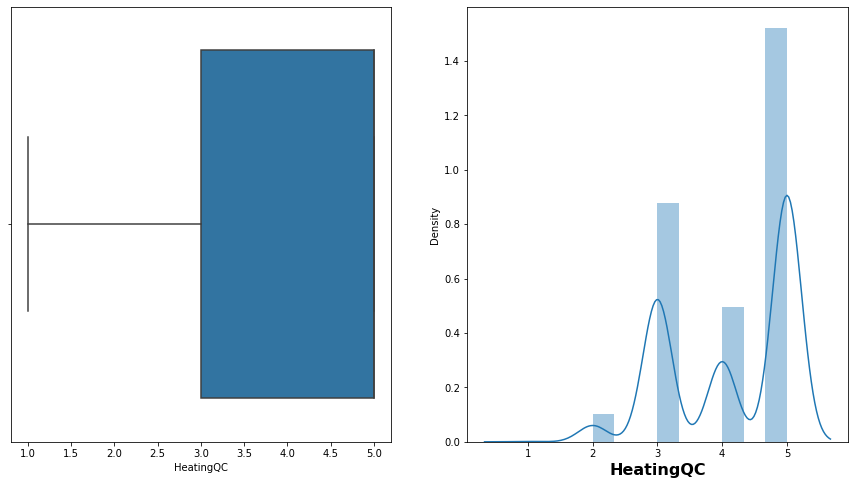

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
5%        672.950000
10%       756.900000
50%      1087.000000
75%      1391.250000
90%      1680.000000
95%      1831.250000
99%      2219.460000
max      4692.000000
Name: 1stFlrSF, dtype: float64


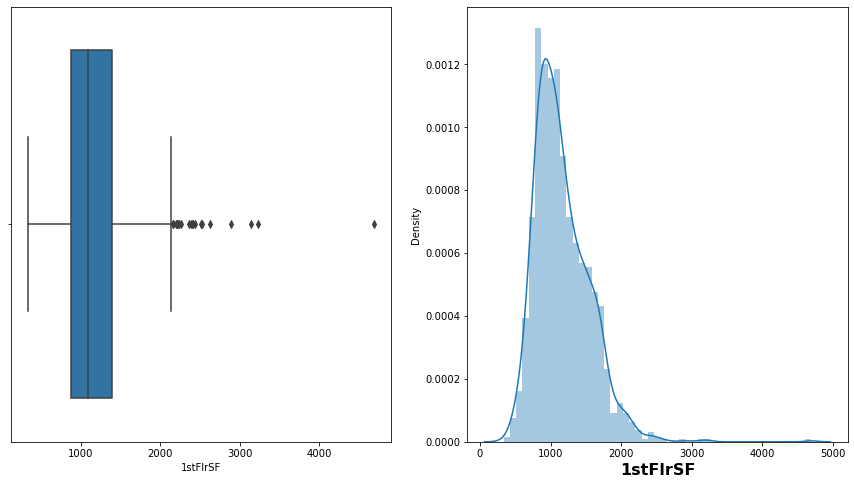

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%       728.000000
90%       954.200000
95%      1141.050000
99%      1418.920000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


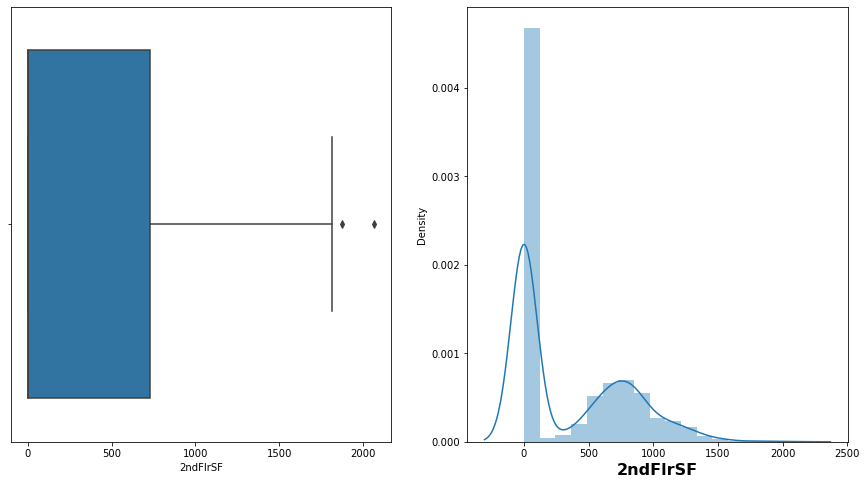

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%       360.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


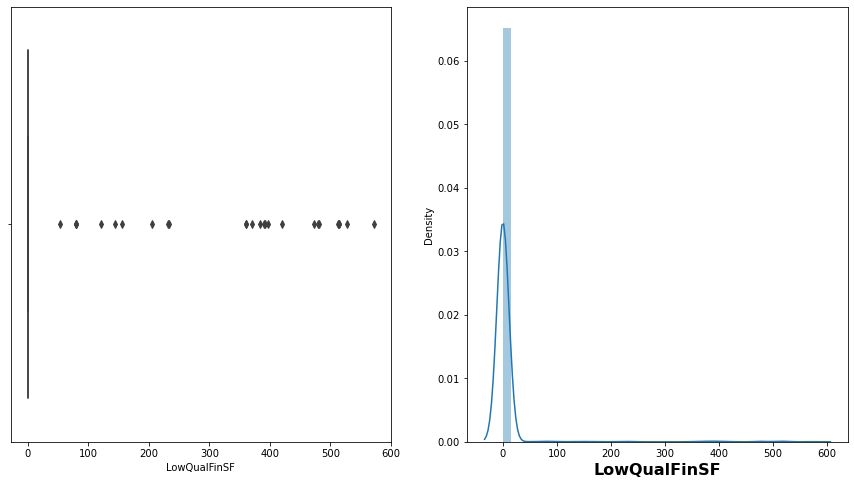

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
5%        848.000000
10%       912.000000
50%      1464.000000
75%      1776.750000
90%      2158.300000
95%      2466.100000
99%      3123.480000
max      5642.000000
Name: GrLivArea, dtype: float64


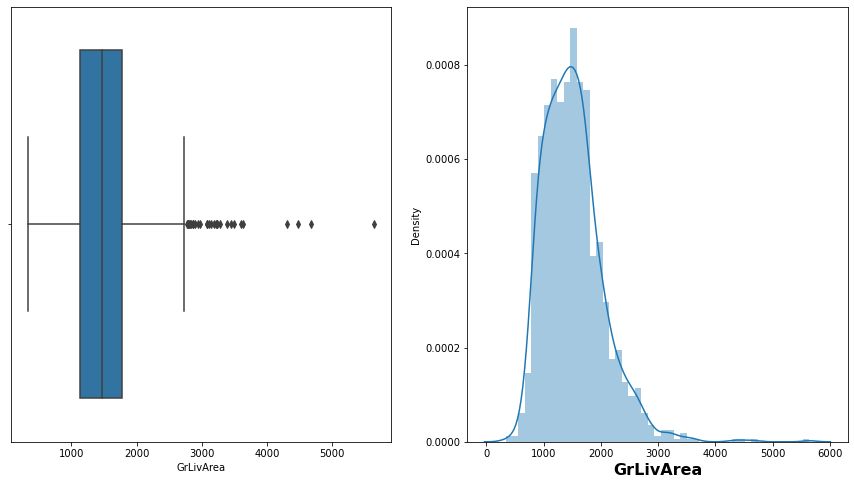

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
95%         1.000000
99%         2.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


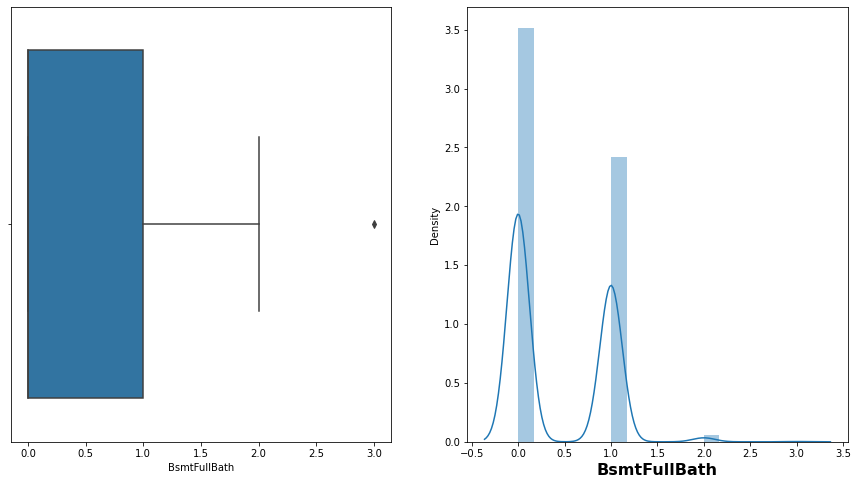

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         1.000000
99%         1.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


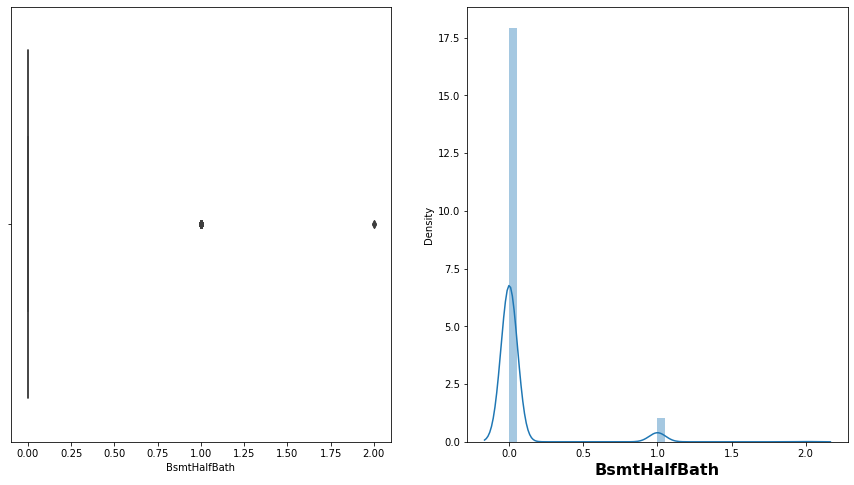

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
5%          1.000000
10%         1.000000
50%         2.000000
75%         2.000000
90%         2.000000
95%         2.000000
99%         3.000000
max         3.000000
Name: FullBath, dtype: float64


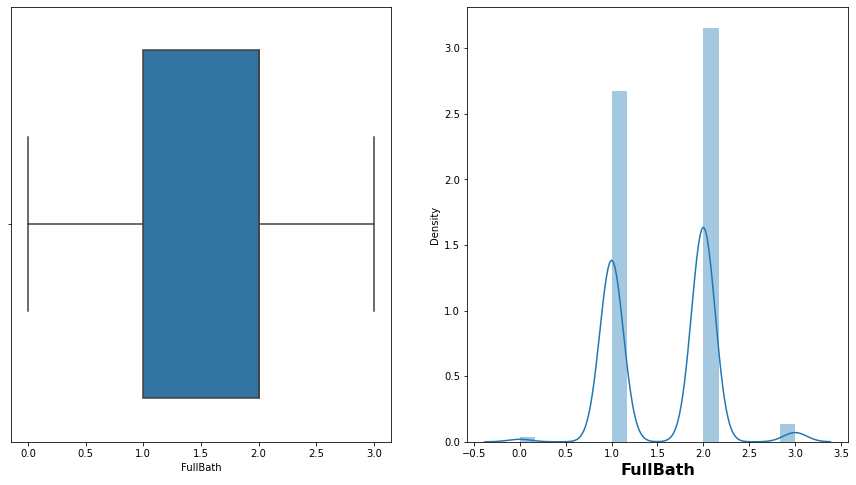

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


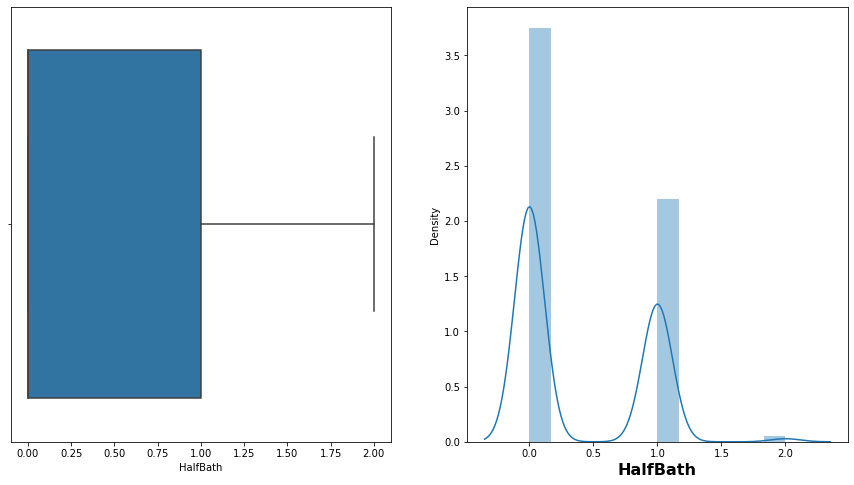

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
5%          2.000000
10%         2.000000
50%         3.000000
75%         3.000000
90%         4.000000
95%         4.000000
99%         5.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


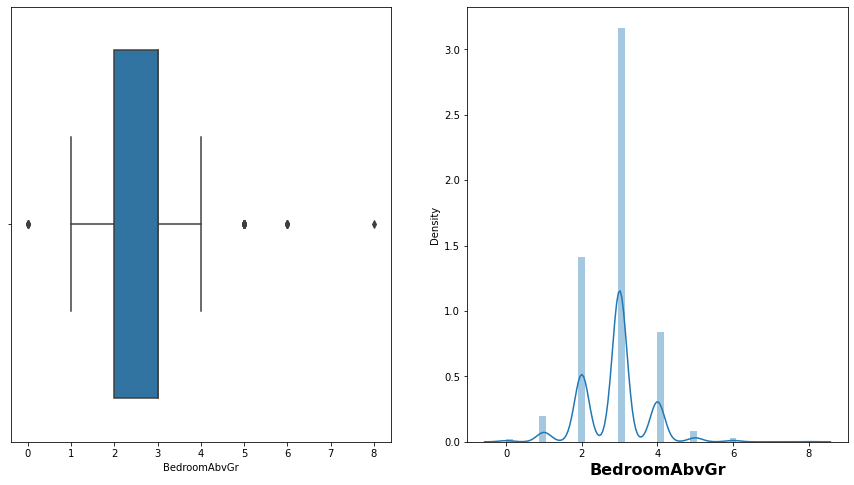

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        3.511644
std         0.663760
min         2.000000
5%          3.000000
10%         3.000000
50%         3.000000
75%         4.000000
90%         4.000000
95%         5.000000
99%         5.000000
max         5.000000
Name: KitchenQual, dtype: float64


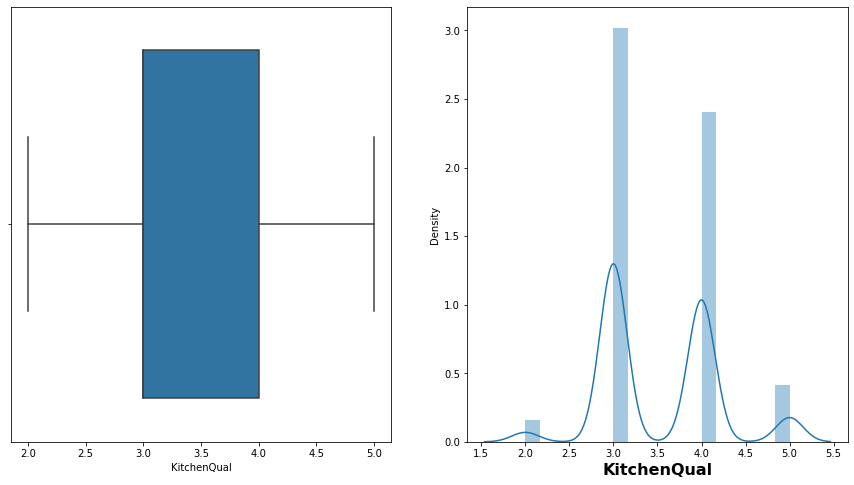

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
5%          4.000000
10%         5.000000
50%         6.000000
75%         7.000000
90%         9.000000
95%        10.000000
99%        11.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


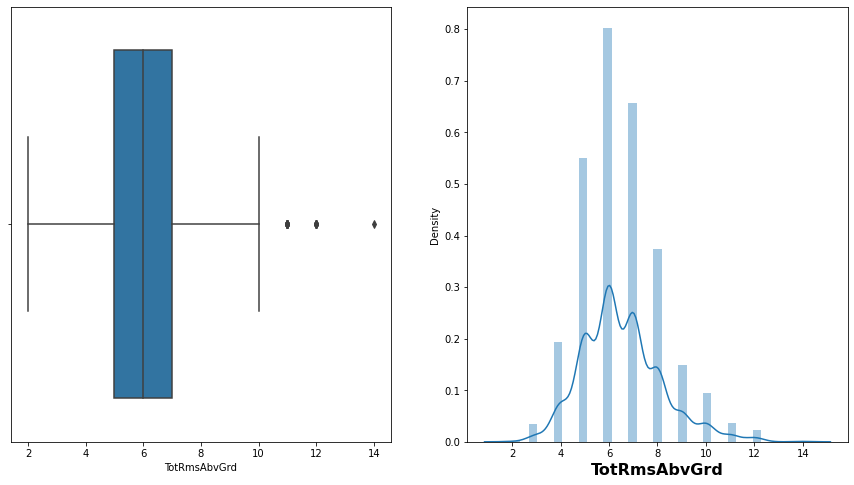

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
5%          0.000000
10%         0.000000
50%         1.000000
75%         1.000000
90%         1.000000
95%         2.000000
99%         2.000000
max         3.000000
Name: Fireplaces, dtype: float64


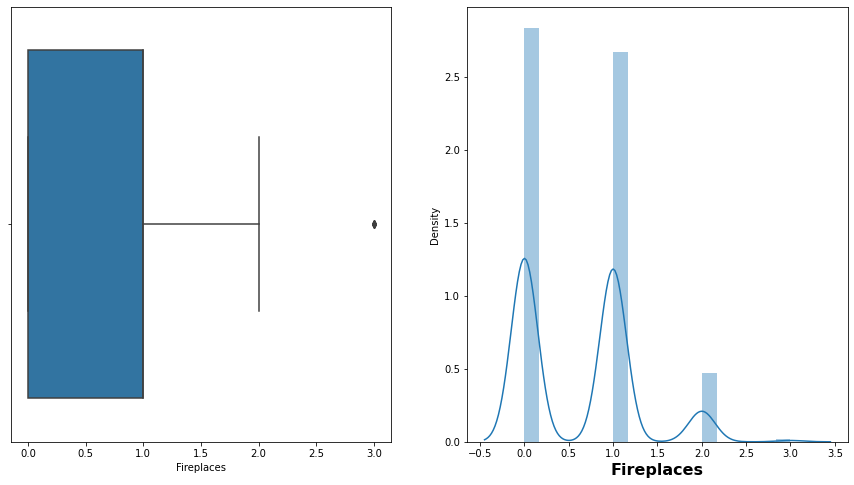

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        1.825342
std         1.810877
min         0.000000
5%          0.000000
10%         0.000000
50%         2.000000
75%         4.000000
90%         4.000000
95%         4.000000
99%         5.000000
max         5.000000
Name: FireplaceQu, dtype: float64


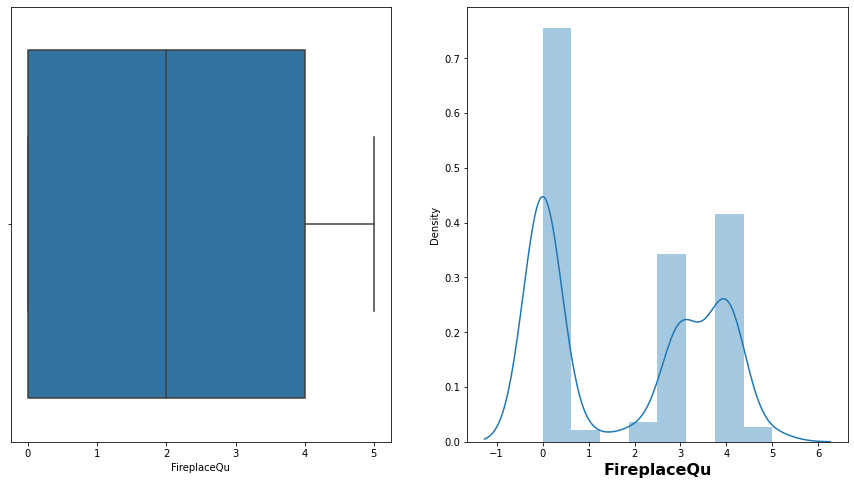

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
5%          0.000000
10%         1.000000
50%         2.000000
75%         2.000000
90%         3.000000
95%         3.000000
99%         3.000000
max         4.000000
Name: GarageCars, dtype: float64


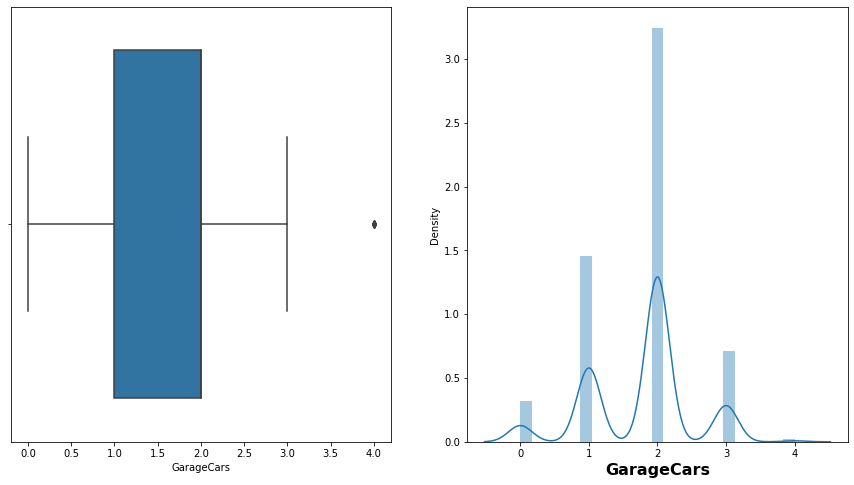

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
5%          0.000000
10%       240.000000
50%       480.000000
75%       576.000000
90%       757.100000
95%       850.100000
99%      1002.790000
max      1418.000000
Name: GarageArea, dtype: float64


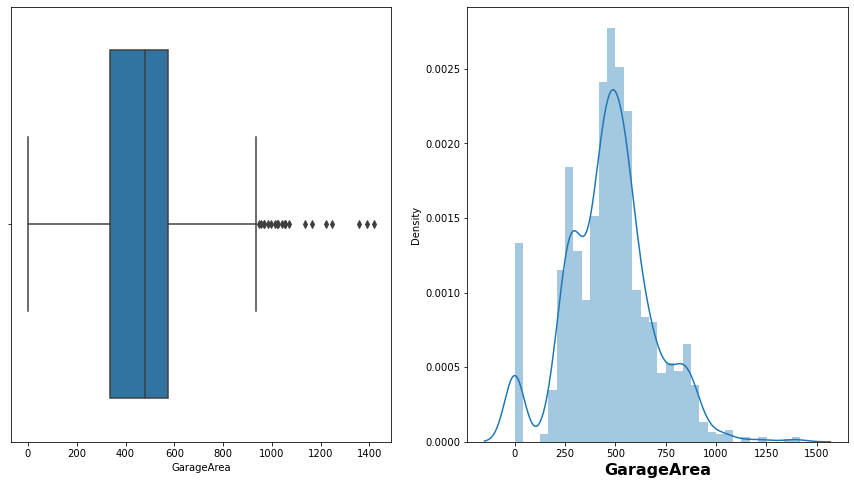

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%       168.000000
90%       262.000000
95%       335.000000
99%       505.460000
max       857.000000
Name: WoodDeckSF, dtype: float64


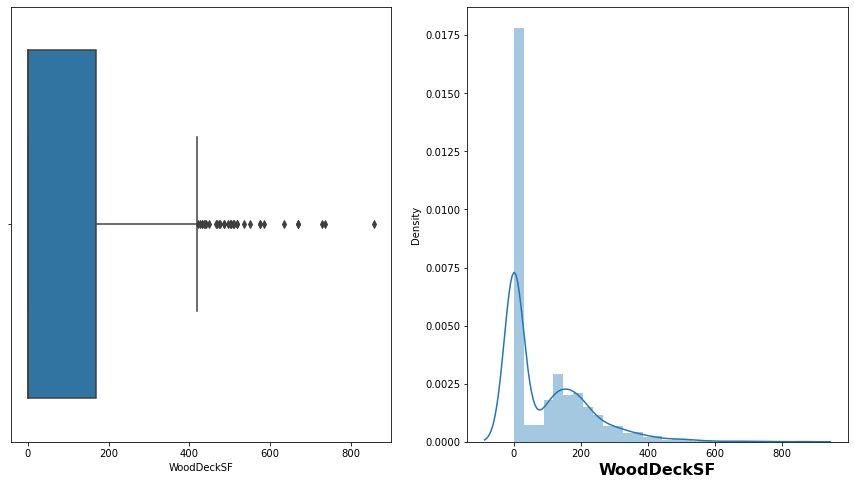

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
5%          0.000000
10%         0.000000
50%        25.000000
75%        68.000000
90%       130.000000
95%       175.050000
99%       285.820000
max       547.000000
Name: OpenPorchSF, dtype: float64


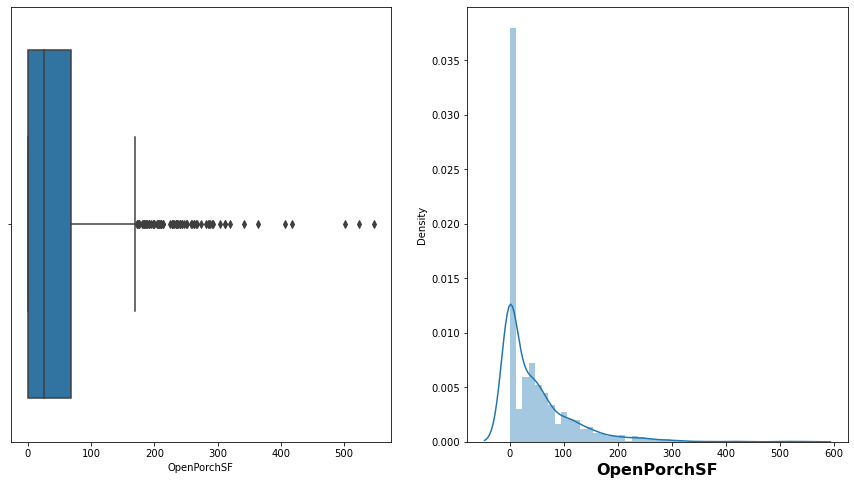

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         0.000000
90%       112.000000
95%       180.150000
99%       261.050000
max       552.000000
Name: EnclosedPorch, dtype: float64


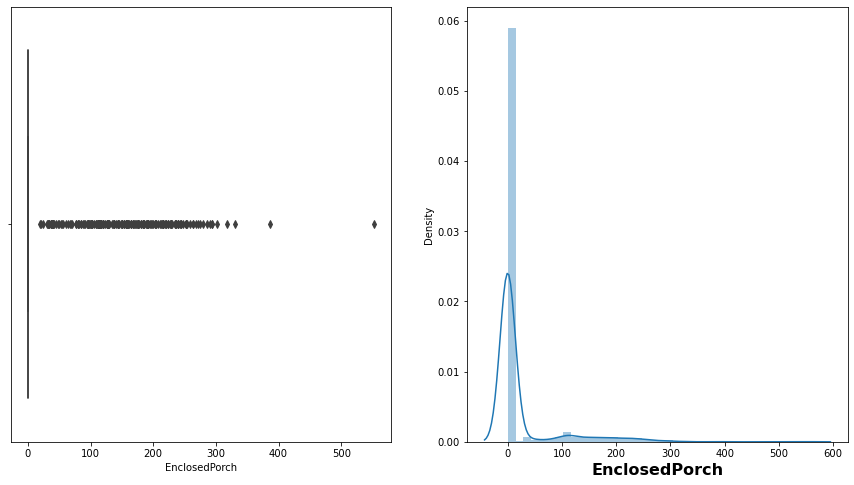

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%       168.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


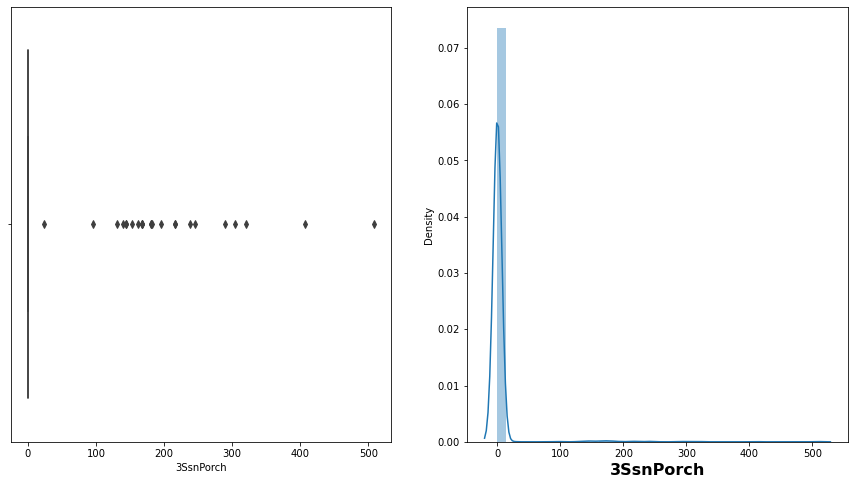

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%       160.000000
99%       268.050000
max       480.000000
Name: ScreenPorch, dtype: float64


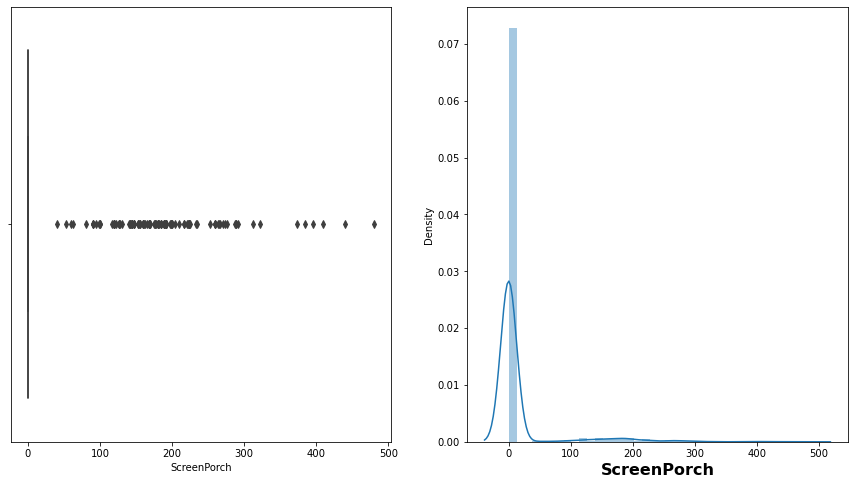

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


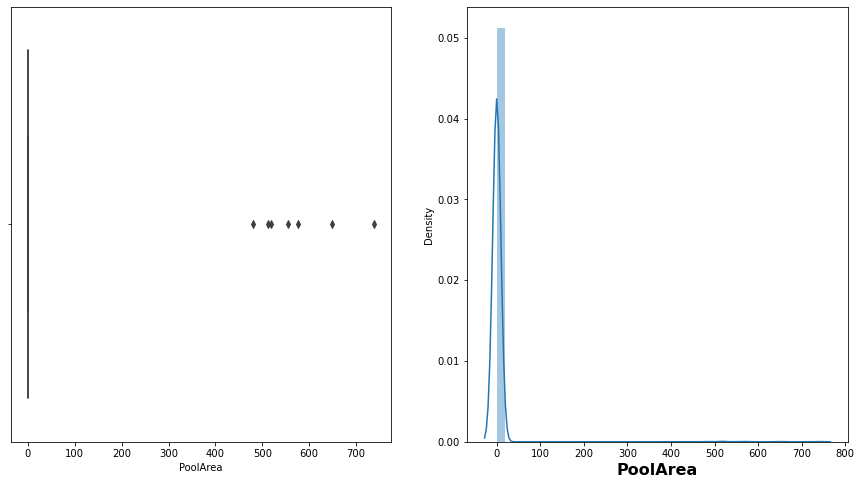

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean        0.017808
std         0.268952
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         5.000000
Name: PoolQC, dtype: float64


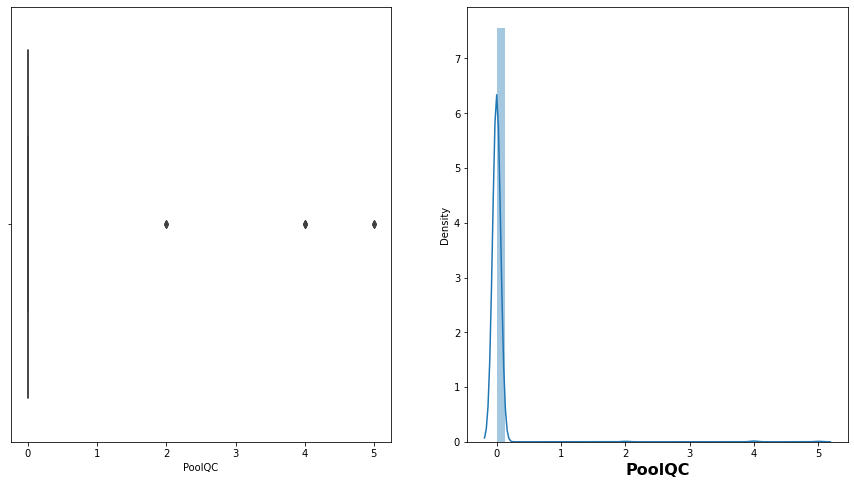

------------------------------------------------------------------------------------------------------------------------
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
5%           0.000000
10%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%        700.000000
max      15500.000000
Name: MiscVal, dtype: float64


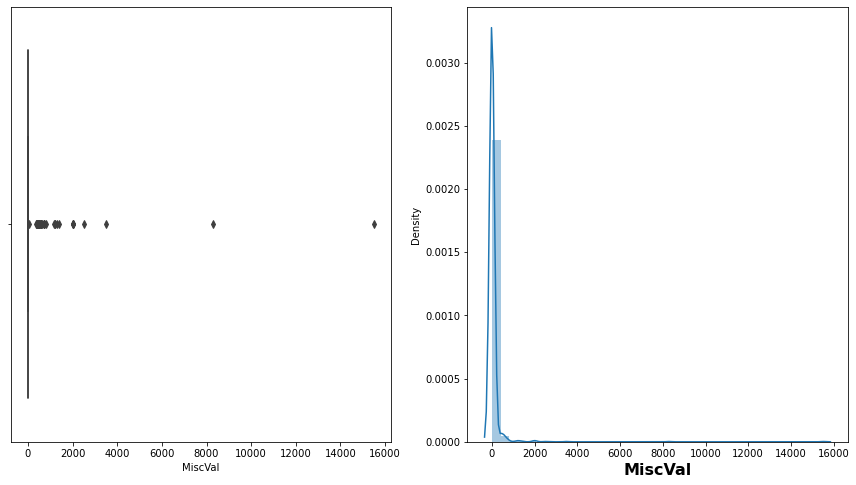

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       49.732192
std        30.202904
min        11.000000
5%         14.000000
10%        15.000000
50%        48.000000
75%        67.000000
90%        96.100000
95%       105.000000
99%       121.820000
max       149.000000
Name: AgeYearBuilt, dtype: float64


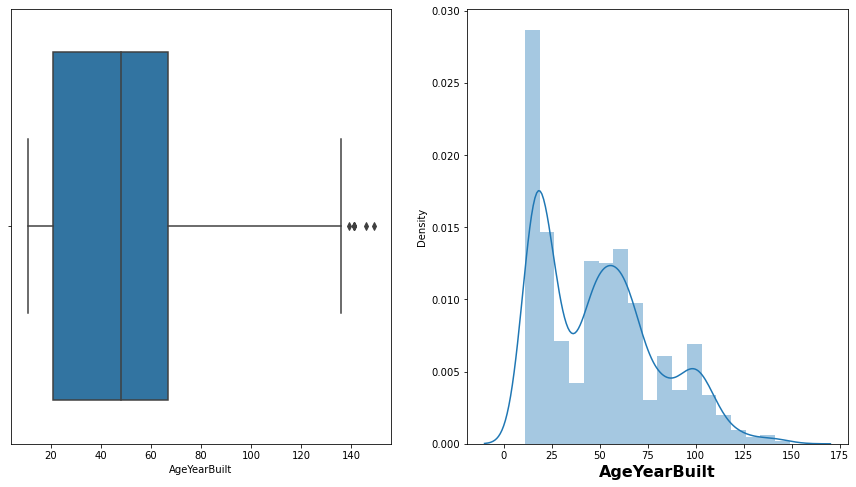

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       36.134247
std        20.645407
min        11.000000
5%         14.000000
10%        15.000000
50%        27.000000
75%        54.000000
90%        71.000000
95%        71.000000
99%        71.000000
max        71.000000
Name: AgeYearRemodAdd, dtype: float64


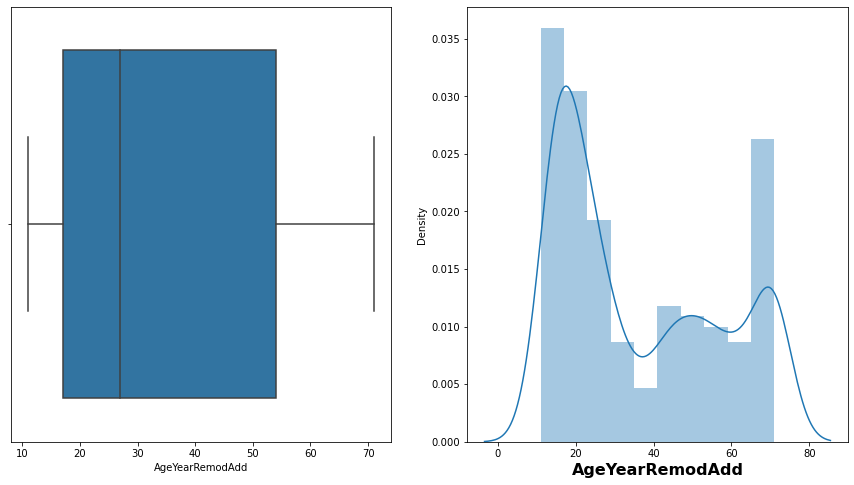

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       40.136301
std        25.892617
min         0.000000
5%          0.000000
10%        14.000000
50%        36.500000
75%        59.000000
90%        73.000000
95%        91.000000
99%       103.820000
max       121.000000
Name: AgeGarageYrBlt, dtype: float64


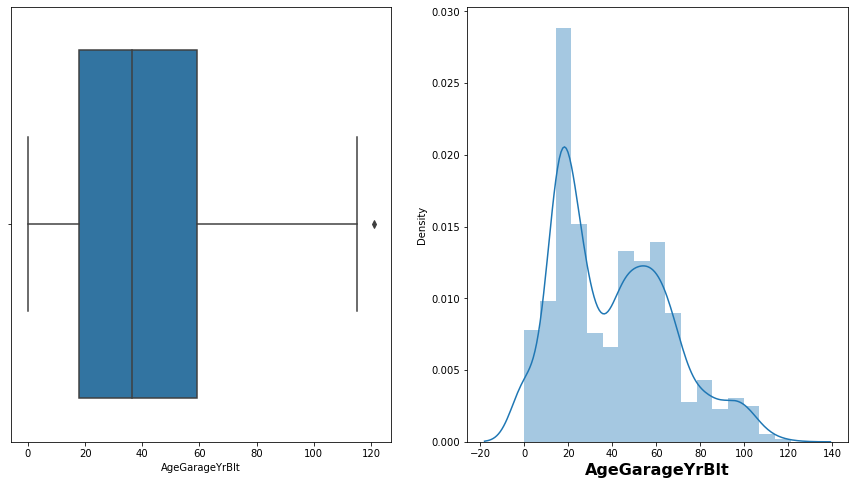

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       13.184247
std         1.328095
min        11.000000
5%         11.000000
10%        11.000000
50%        13.000000
75%        14.000000
90%        15.000000
95%        15.000000
99%        15.000000
max        15.000000
Name: AgeYrSold, dtype: float64


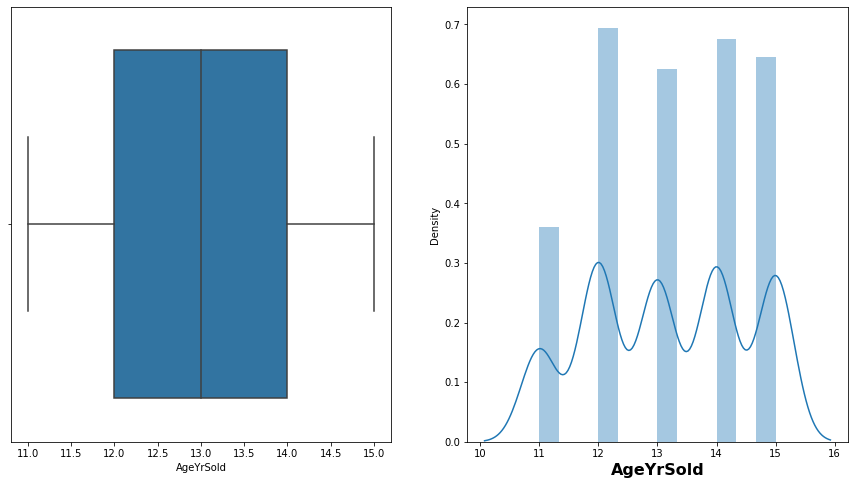

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
5%         11.385092
10%        11.575665
50%        12.001505
75%        12.273731
90%        12.535376
95%        12.694958
99%        13.000323
max        13.534473
Name: SalePrice_log, dtype: float64


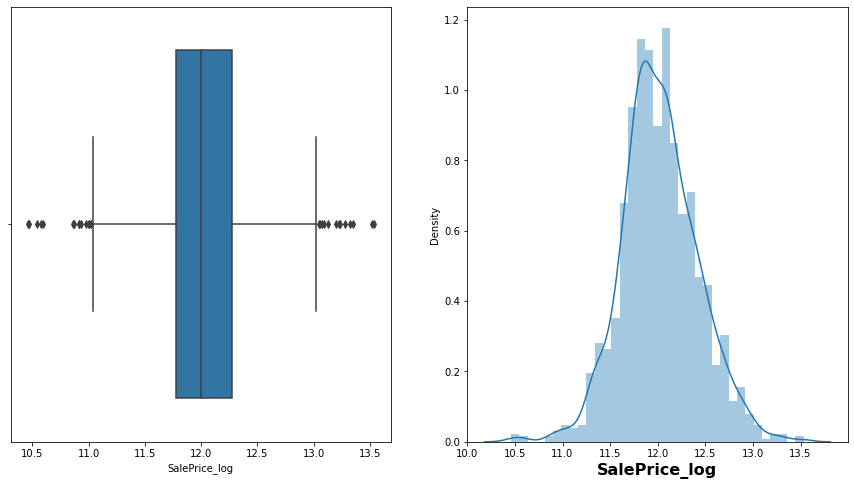

In [65]:
num_col = list(data.select_dtypes(include=['int64','float64']).columns)

for i in num_col:
    
    print("----"* 30)
    print(data[i].describe([0.05, 0.1, 0.5, 0.75, 0.9, 0.95, 0.99]))
    fig, ax = plt.subplots(1,2)
    sns.boxplot(i,data = data, ax = ax[0])
    sns.distplot(data[i],ax = ax[1])
#     fig = plt.gcf()
    fig.set_size_inches(15,8)
    plt.xlabel(i,weight='bold', fontsize=16)
    plt.show()


There are some of the highly skewed columns we might have to drop them.

In [66]:
drop_col = ['MiscVal','PoolArea','PoolQC','ScreenPorch','3SsnPorch', 'EnclosedPorch','LowQualFinSF','BsmtFinSF2']

In [67]:
data.drop(drop_col, inplace = True , axis = 1)

There are some numerical columns having outliers. We should treat them.

In [68]:
outlier_features = ['LotFrontage','LotArea','MasVnrArea',
                    'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF',
                    'GrLivArea','OpenPorchSF']

# Let's cap all values between 0.05 percentile and 0.95 percentile 

for i in outlier_features:
    q_l = data[i].quantile(0.05)
    q_h = data[i].quantile(0.95)

    data[i][data[i] <= q_l] = q_l
    data[i][data[i] >= q_h] = q_h

Checking outlier features

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       69.112568
std        16.509008
min        35.950000
5%         35.997500
10%        49.000000
50%        69.000000
75%        79.000000
90%        92.000000
95%       104.000000
99%       104.000000
max       104.000000
Name: LotFrontage, dtype: float64


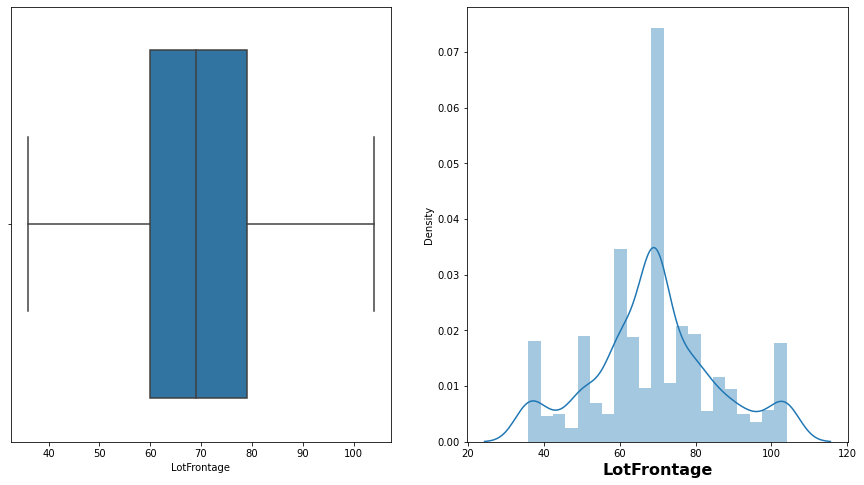

------------------------------------------------------------------------------------------------------------------------
count     1460.000000
mean      9682.319212
std       3469.967624
min       3311.700000
5%        3315.785000
10%       5000.000000
50%       9478.500000
75%      11601.500000
90%      14381.700000
95%      17400.057500
99%      17401.150000
max      17401.150000
Name: LotArea, dtype: float64


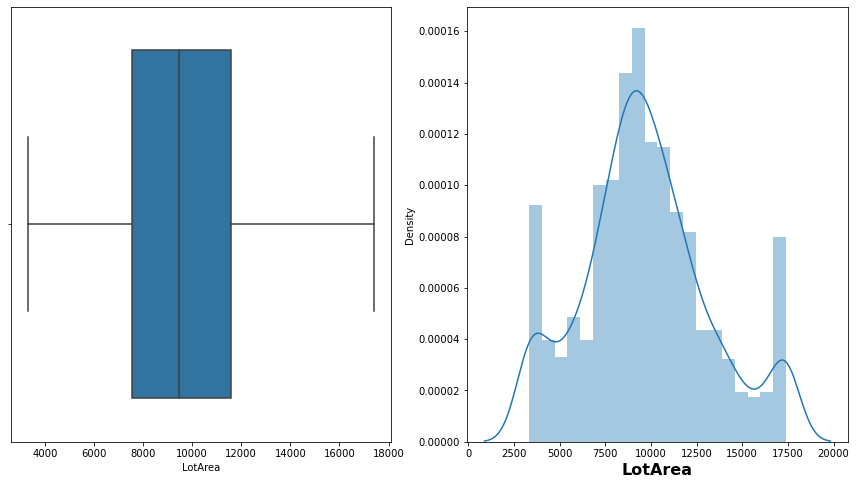

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       92.047945
std       140.590668
min         0.000000
5%          0.000000
10%         0.000000
50%         0.000000
75%       164.250000
90%       335.000000
95%       456.000000
99%       456.000000
max       456.000000
Name: MasVnrArea, dtype: float64


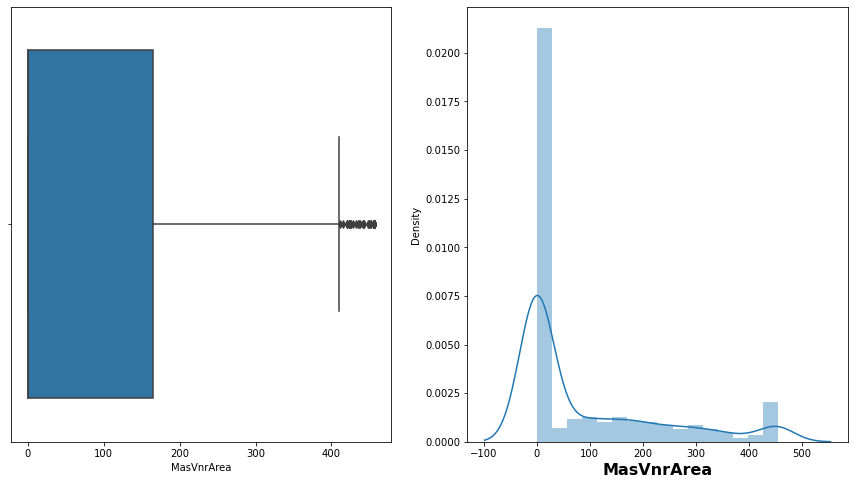

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean      431.089041
std       412.214952
min         0.000000
5%          0.000000
10%         0.000000
50%       383.500000
75%       712.250000
90%      1065.500000
95%      1274.000000
99%      1274.000000
max      1274.000000
Name: BsmtFinSF1, dtype: float64


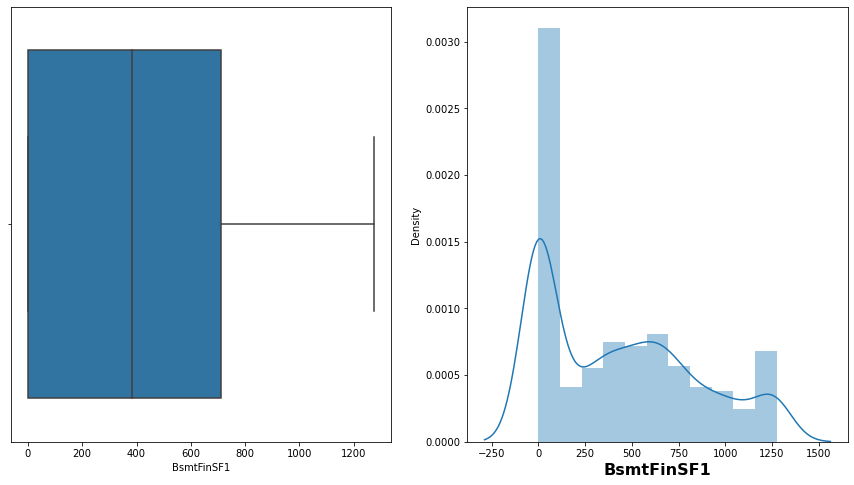

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean     1055.950616
std       346.901853
min       519.300000
5%        519.965000
10%       636.900000
50%       991.500000
75%      1298.250000
90%      1602.200000
95%      1753.000000
99%      1753.000000
max      1753.000000
Name: TotalBsmtSF, dtype: float64


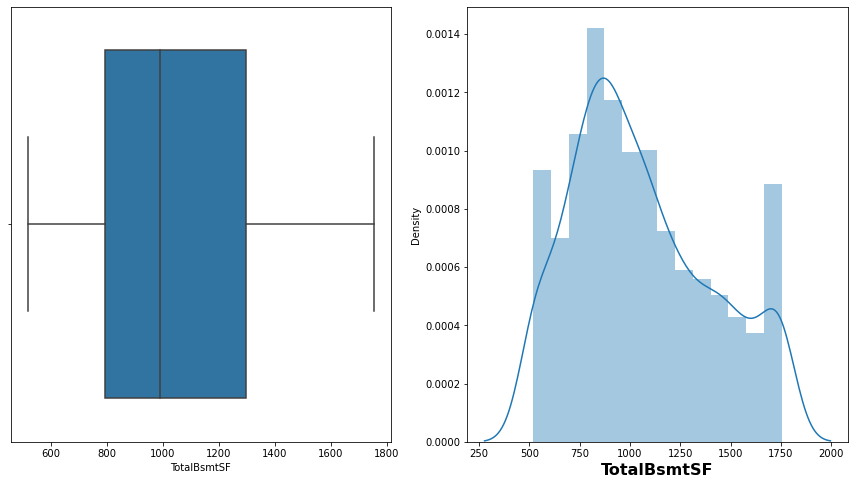

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean     1151.861370
std       333.684061
min       672.950000
5%        672.997500
10%       756.900000
50%      1087.000000
75%      1391.250000
90%      1680.000000
95%      1831.012500
99%      1831.250000
max      1831.250000
Name: 1stFlrSF, dtype: float64


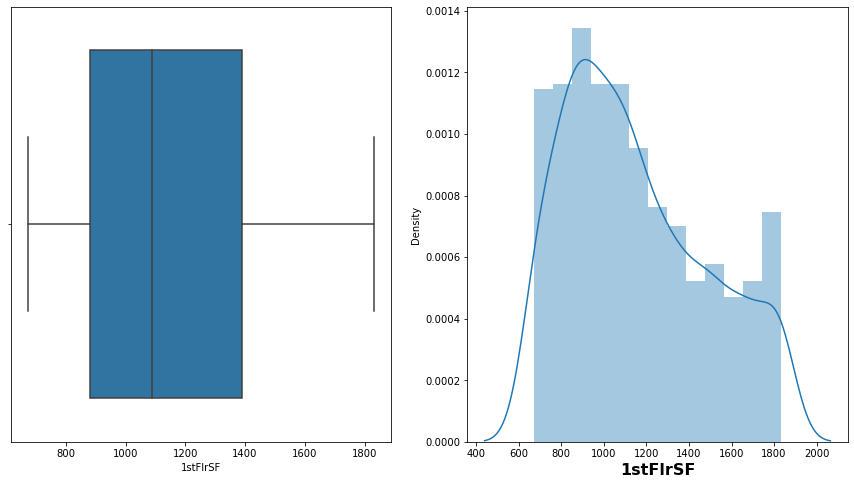

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean     1498.922123
std       450.732225
min       848.000000
5%        848.000000
10%       912.000000
50%      1464.000000
75%      1776.750000
90%      2158.300000
95%      2466.005000
99%      2466.100000
max      2466.100000
Name: GrLivArea, dtype: float64


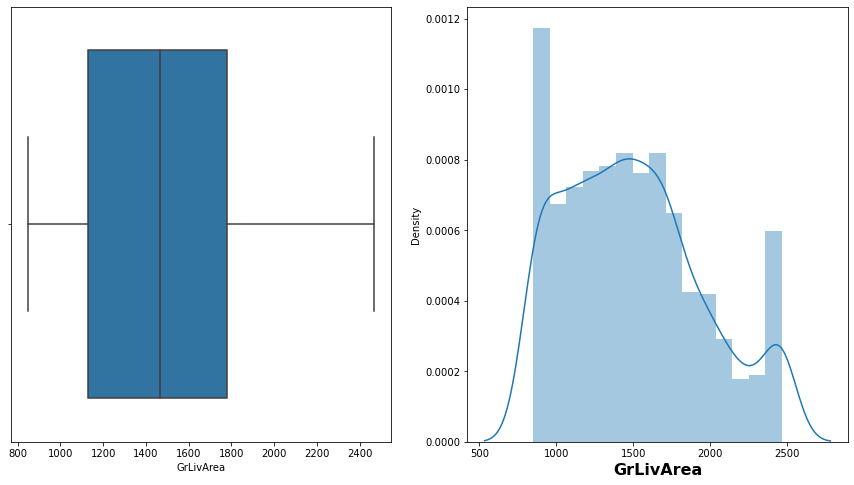

------------------------------------------------------------------------------------------------------------------------
count    1460.000000
mean       42.864829
std        53.144211
min         0.000000
5%          0.000000
10%         0.000000
50%        25.000000
75%        68.000000
90%       130.000000
95%       175.002500
99%       175.050000
max       175.050000
Name: OpenPorchSF, dtype: float64


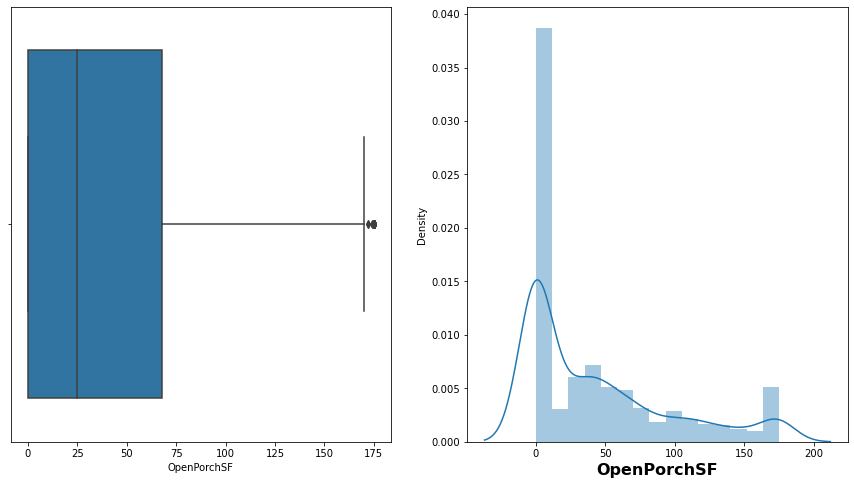

In [69]:
for i in outlier_features:
    
    print("----"* 30)
    print(data[i].describe([0.05, 0.1, 0.5, 0.75, 0.9, 0.95, 0.99]))
    fig, ax = plt.subplots(1,2)
    sns.boxplot(i,data = data, ax = ax[0])
    sns.distplot(data[i],ax = ax[1])
#     fig = plt.gcf()
    fig.set_size_inches(15,8)
    plt.xlabel(i,weight='bold', fontsize=16)
    plt.show()

### Bivariate Analysis

#### Numerical Columns

Analysing all numerical variables with respect to all numerical columns

In [70]:
num_col = data.select_dtypes(include=['int64','float64']).columns

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs MSSubClass


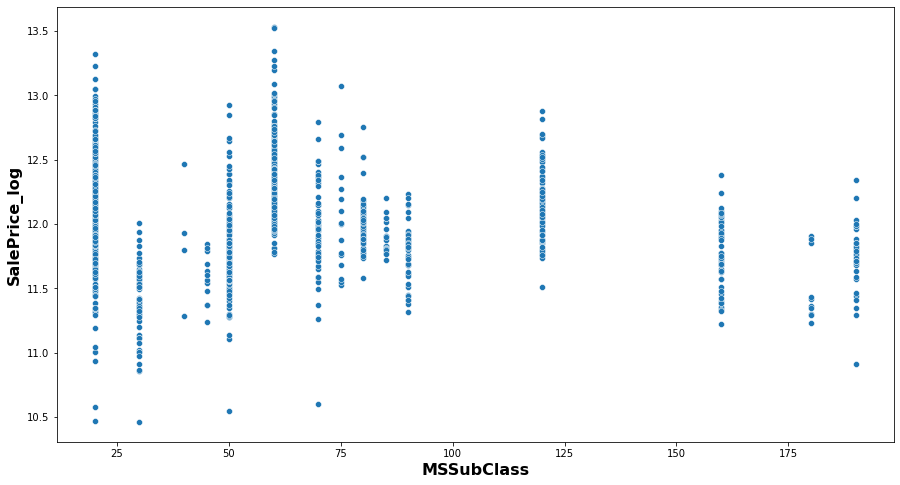

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs LotFrontage


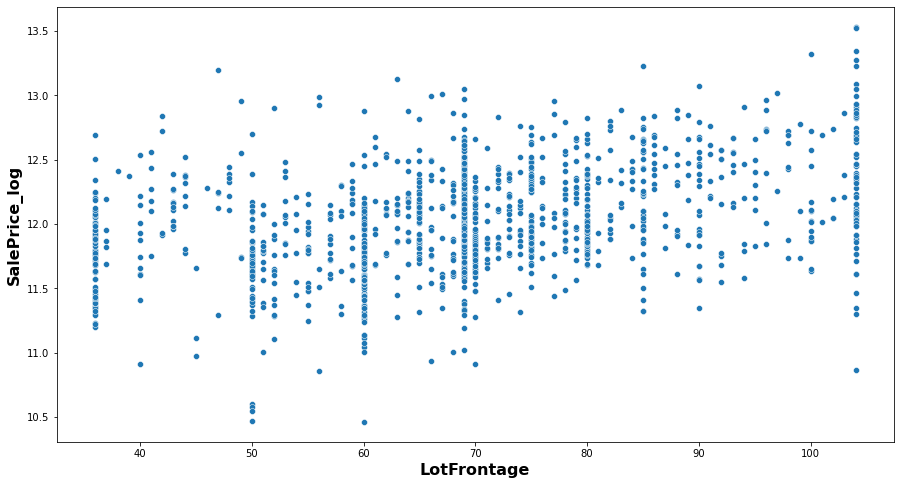

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs LotArea


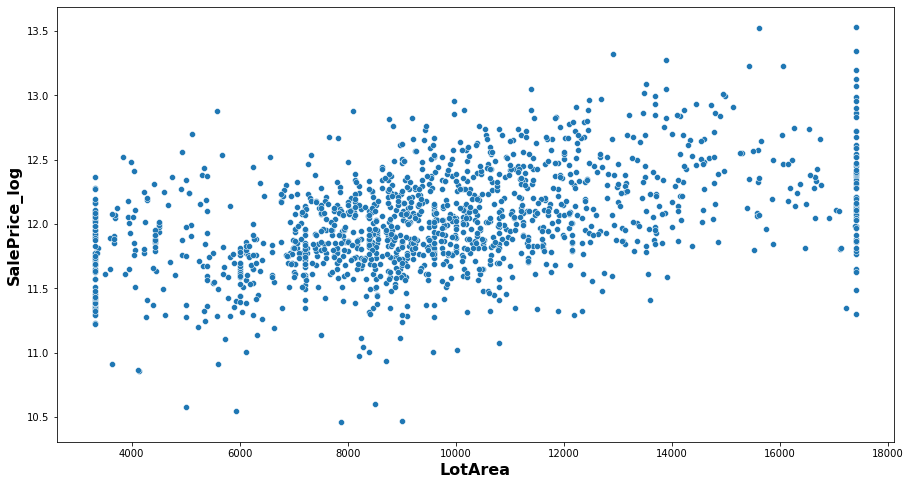

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs OverallQual


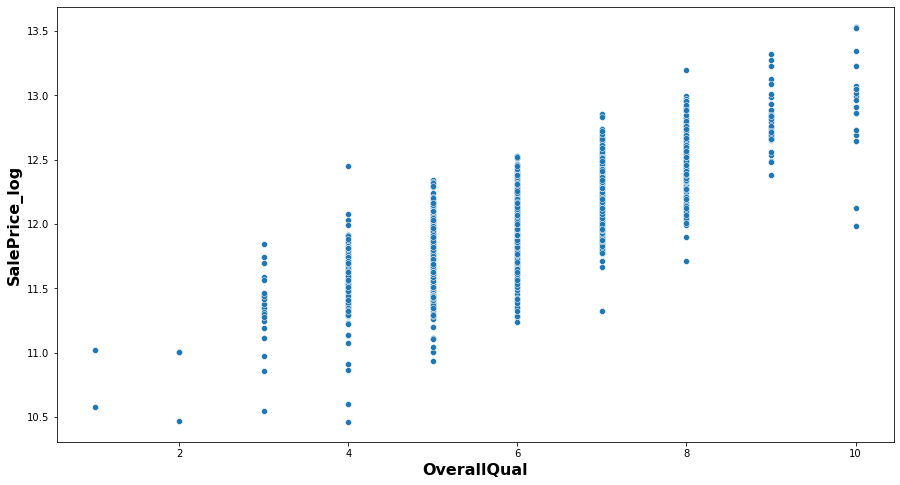

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs OverallCond


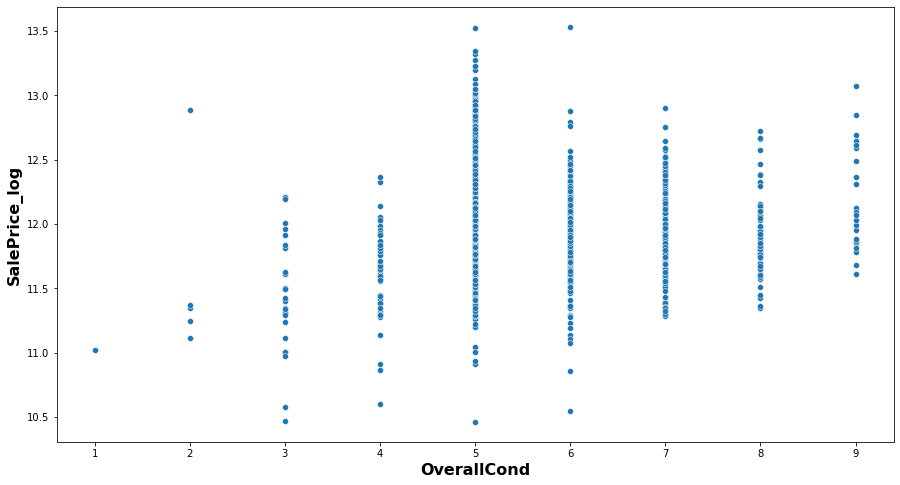

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs MasVnrArea


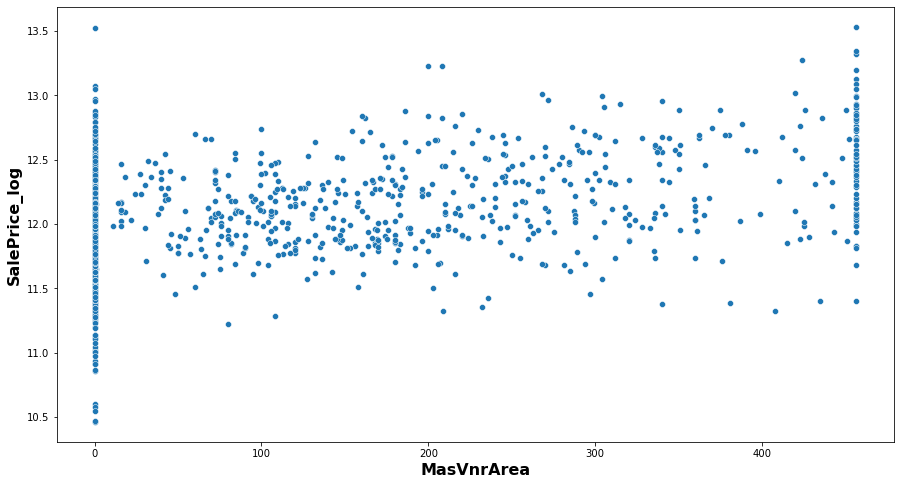

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs ExterQual


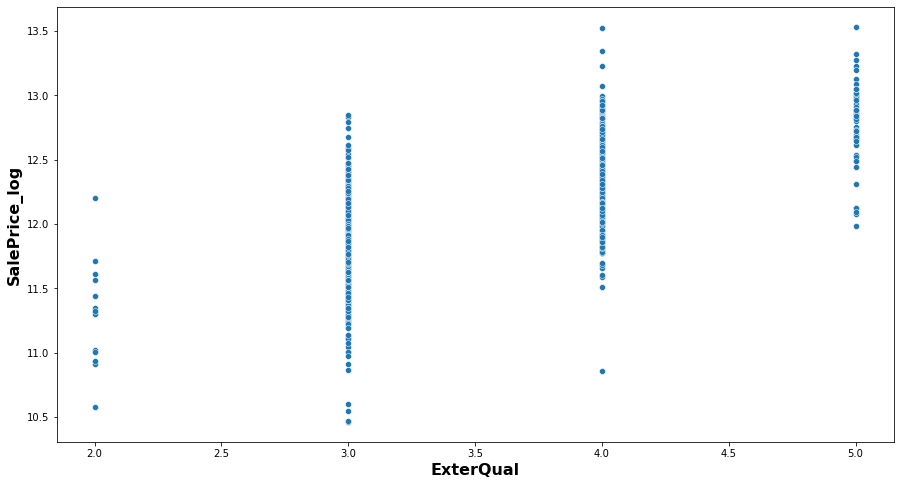

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs ExterCond


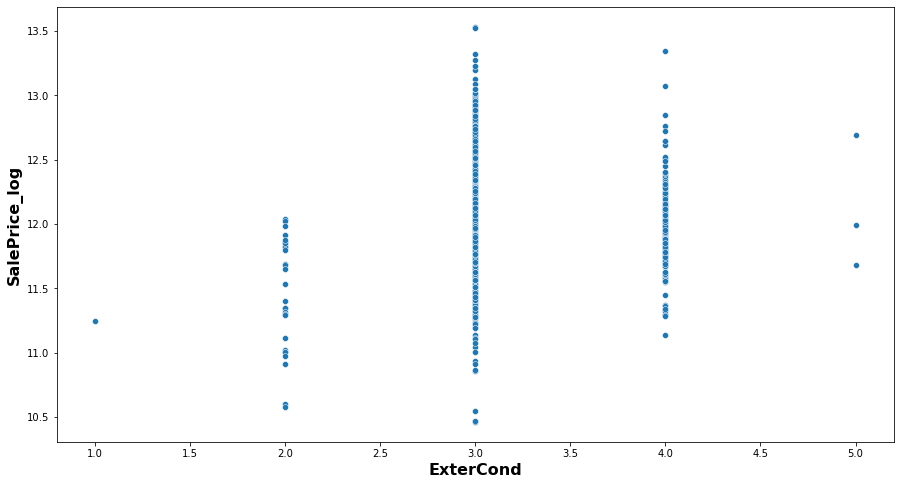

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs BsmtQual


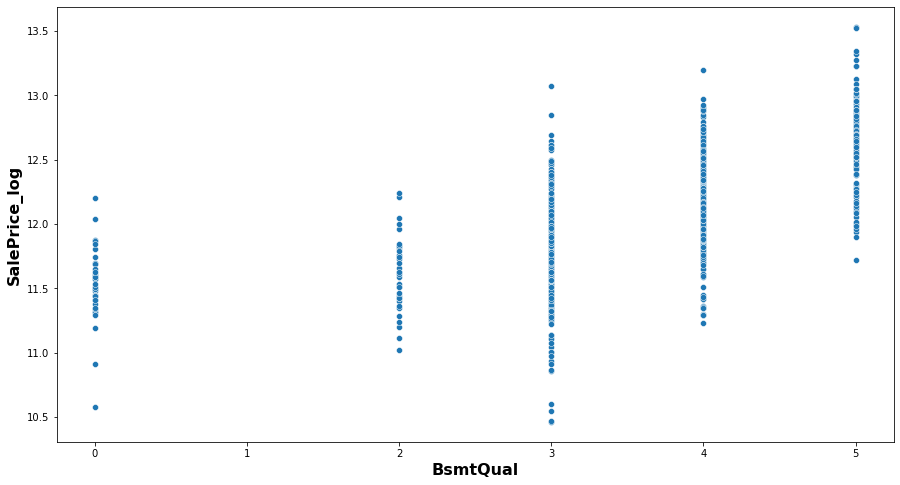

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs BsmtFinSF1


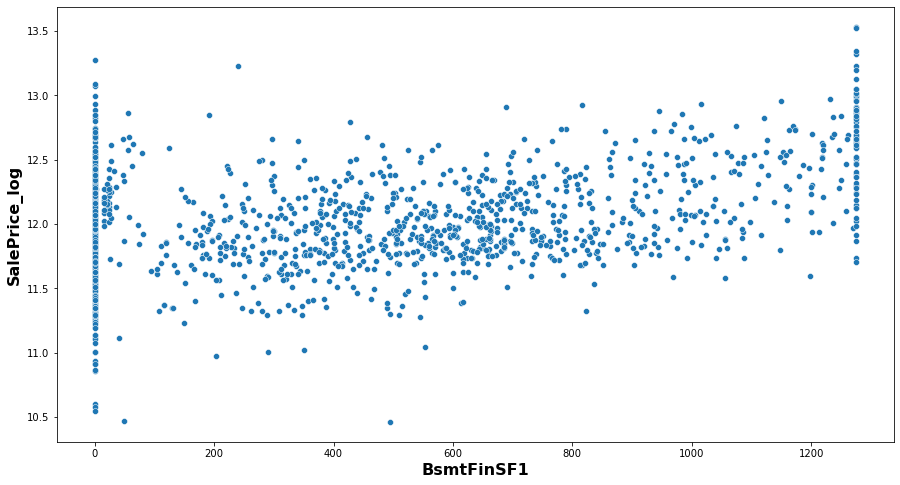

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs BsmtUnfSF


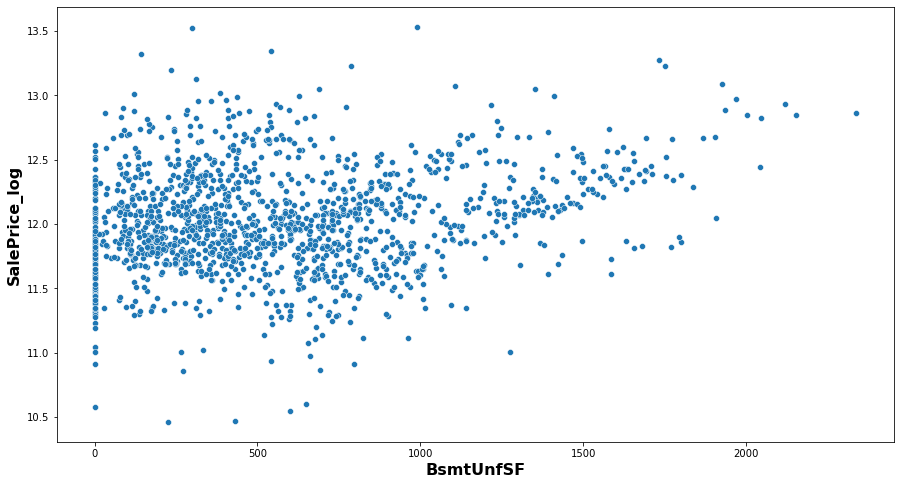

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs TotalBsmtSF


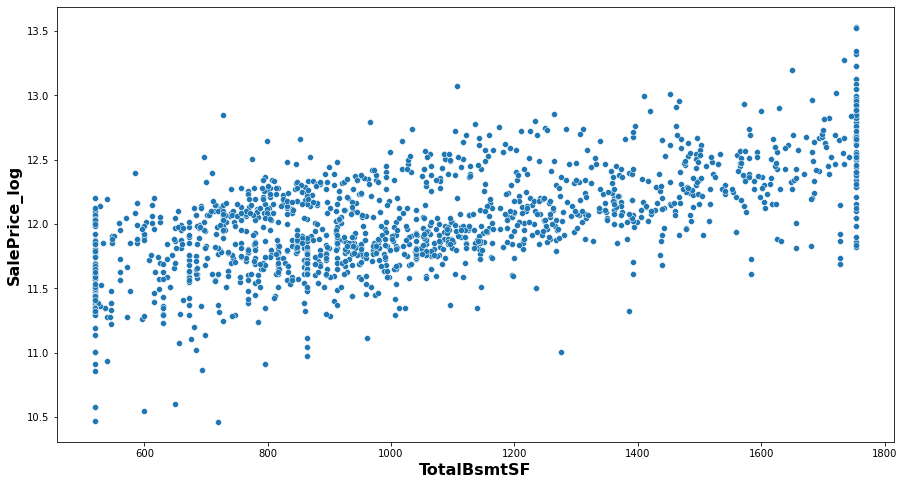

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs HeatingQC


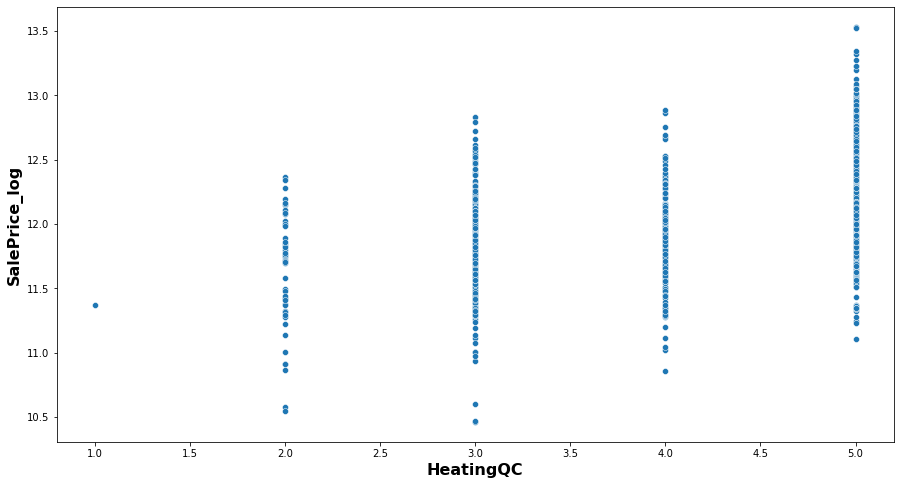

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs 1stFlrSF


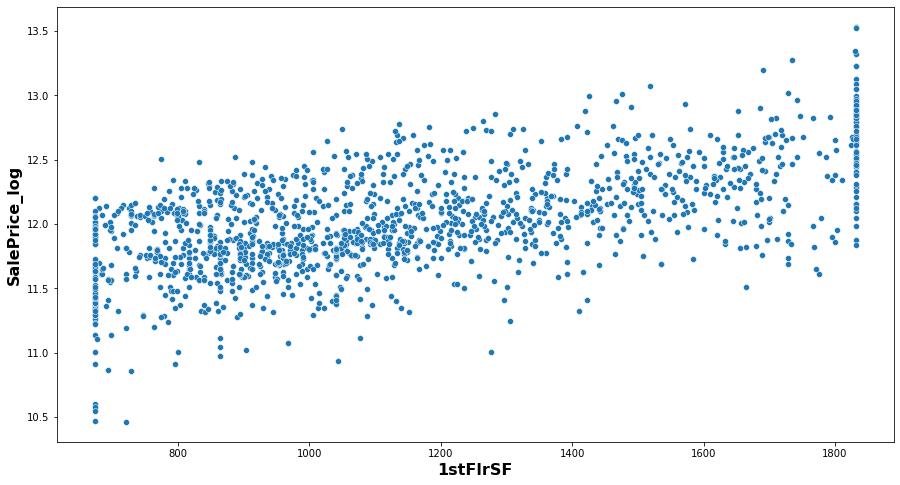

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs 2ndFlrSF


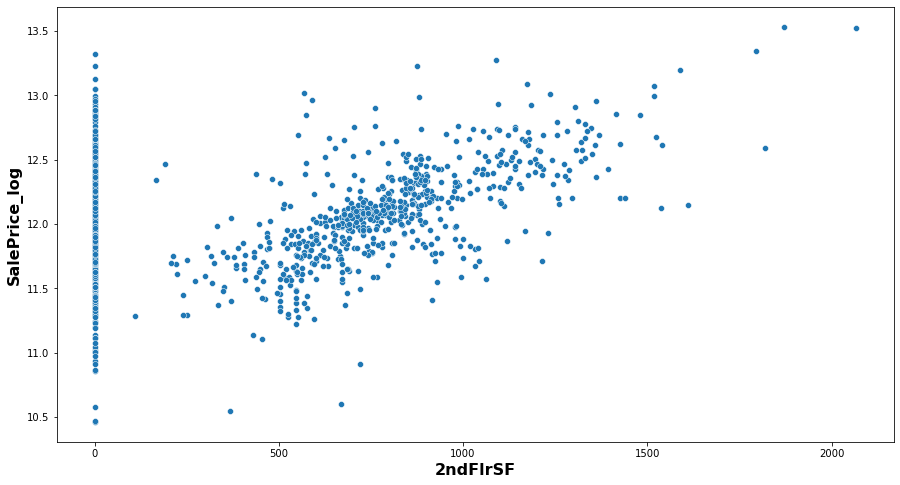

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs GrLivArea


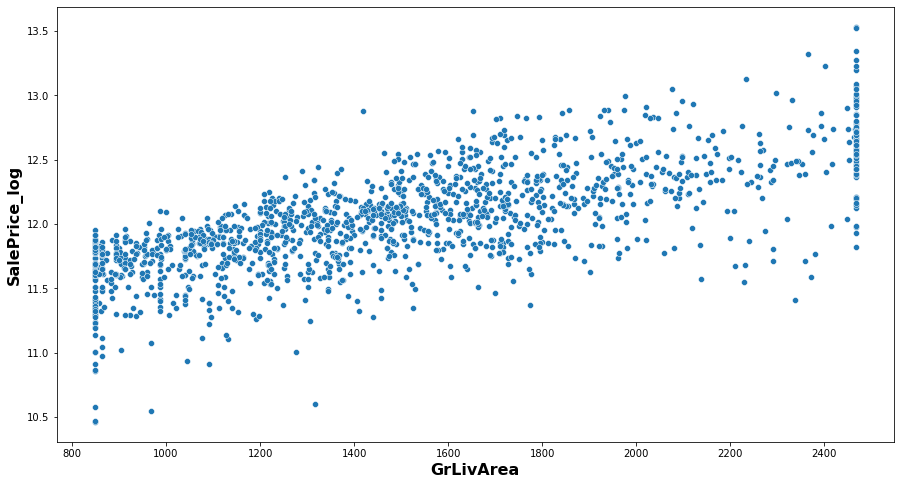

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs BsmtFullBath


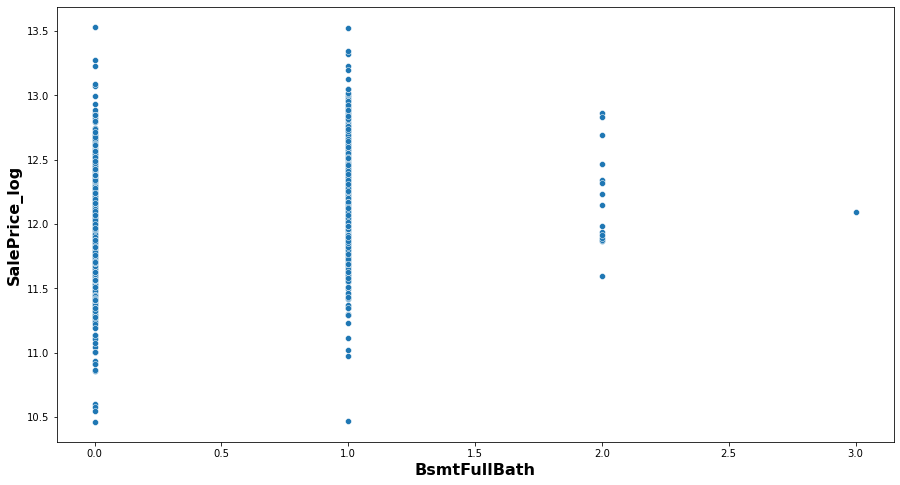

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs BsmtHalfBath


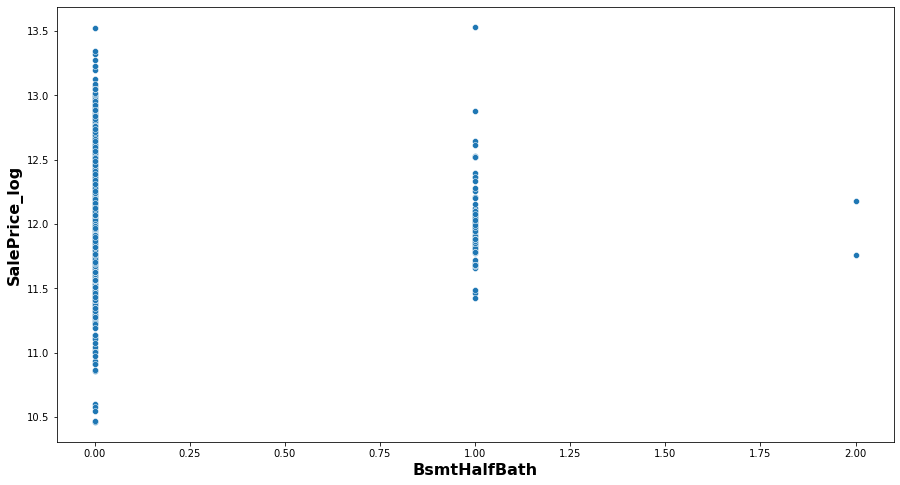

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs FullBath


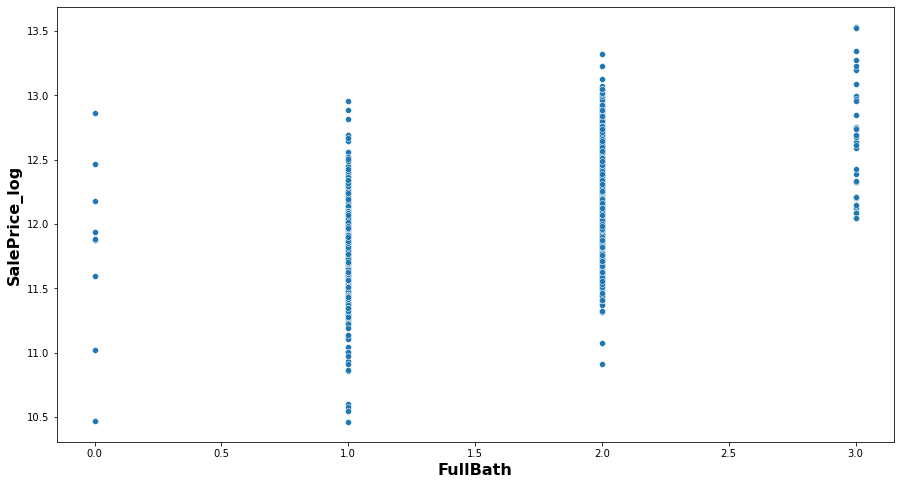

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs HalfBath


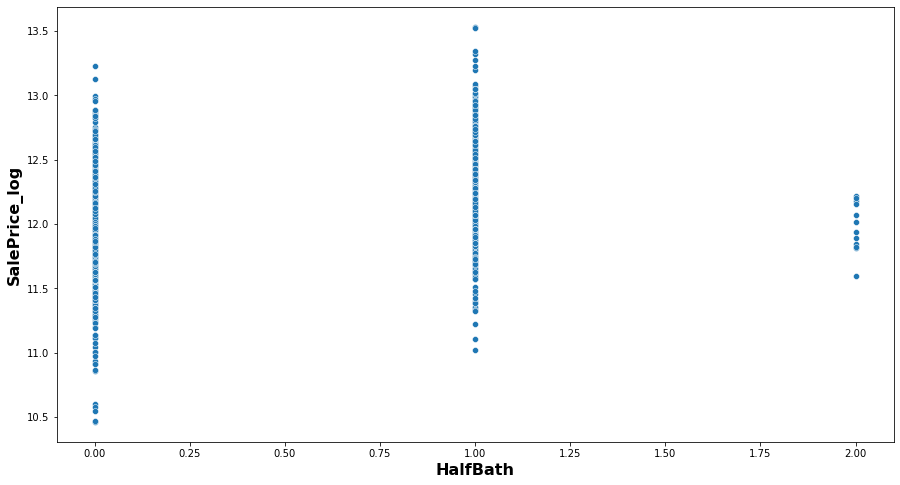

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs BedroomAbvGr


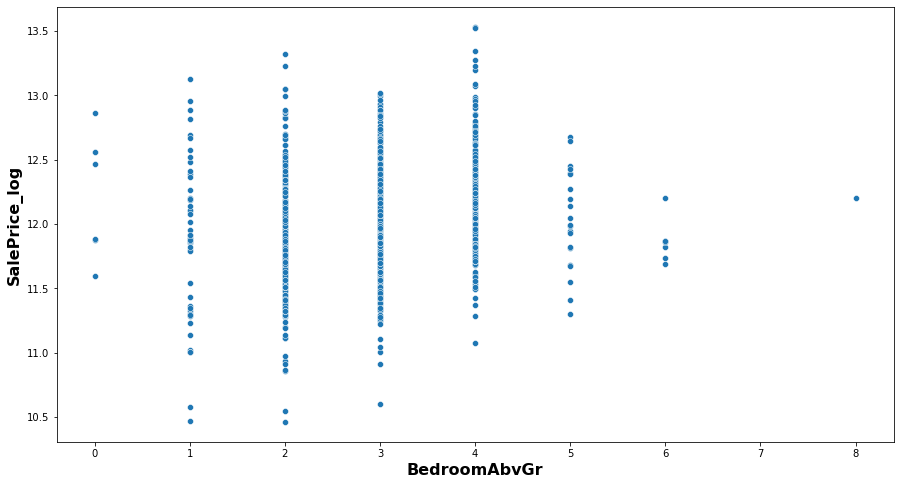

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs KitchenQual


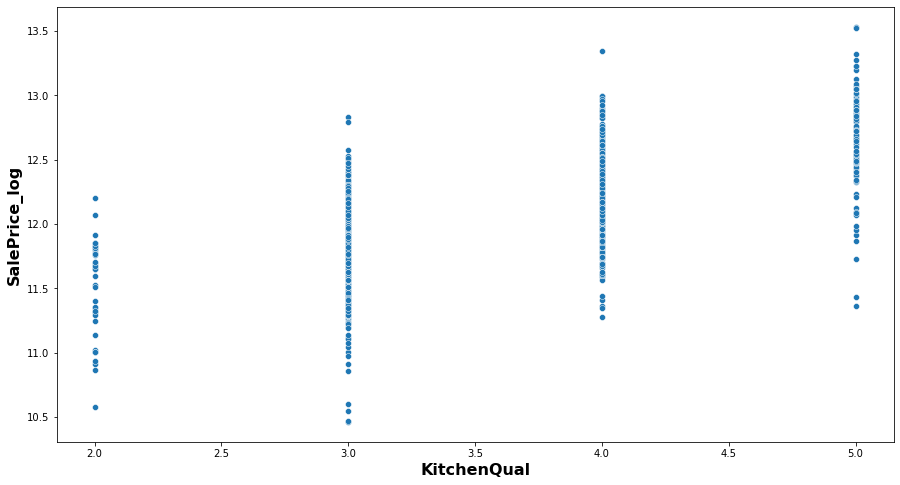

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs TotRmsAbvGrd


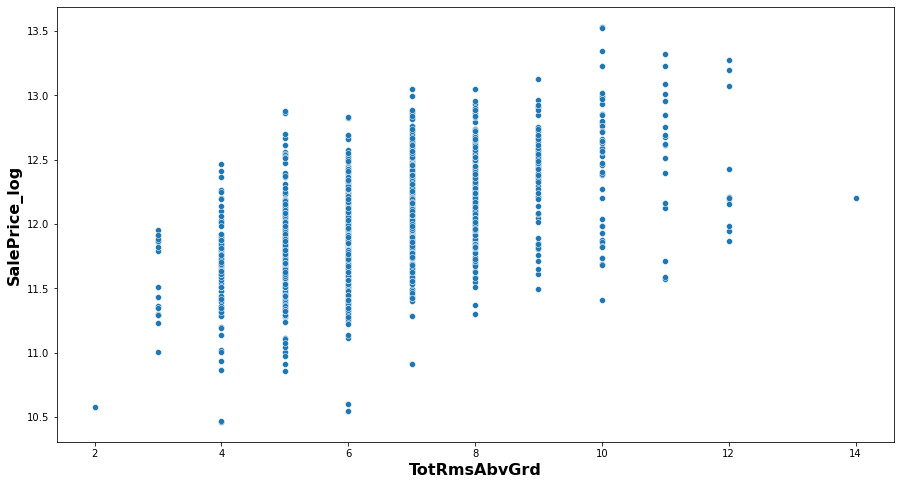

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs Fireplaces


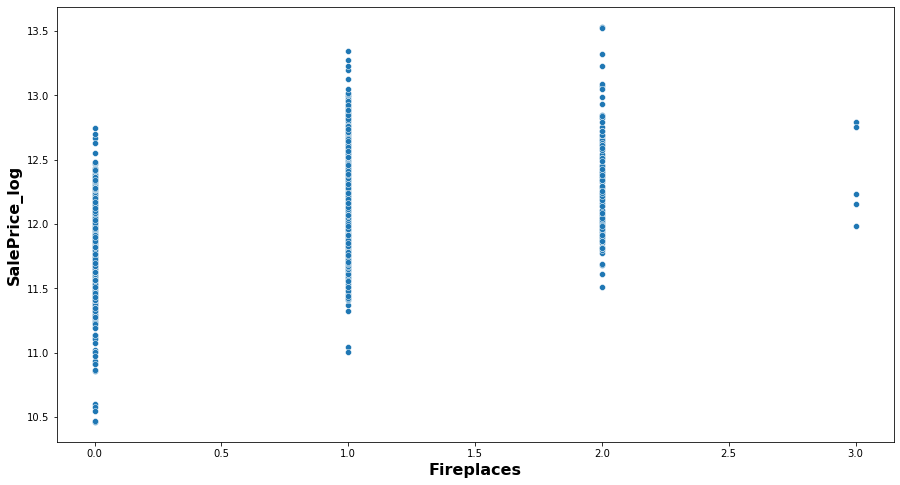

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs FireplaceQu


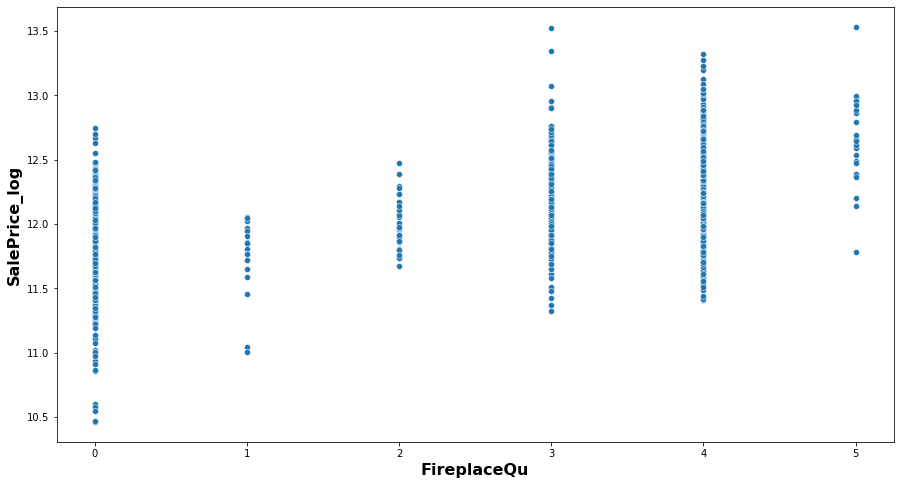

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs GarageCars


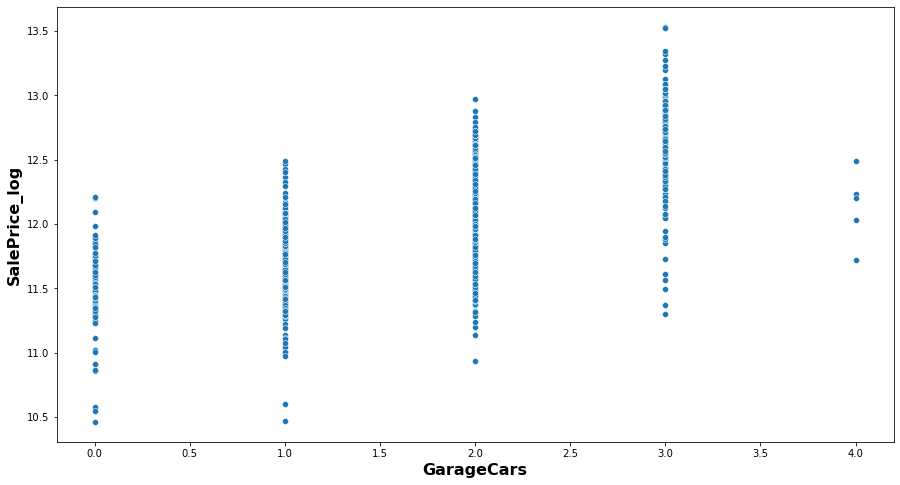

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs GarageArea


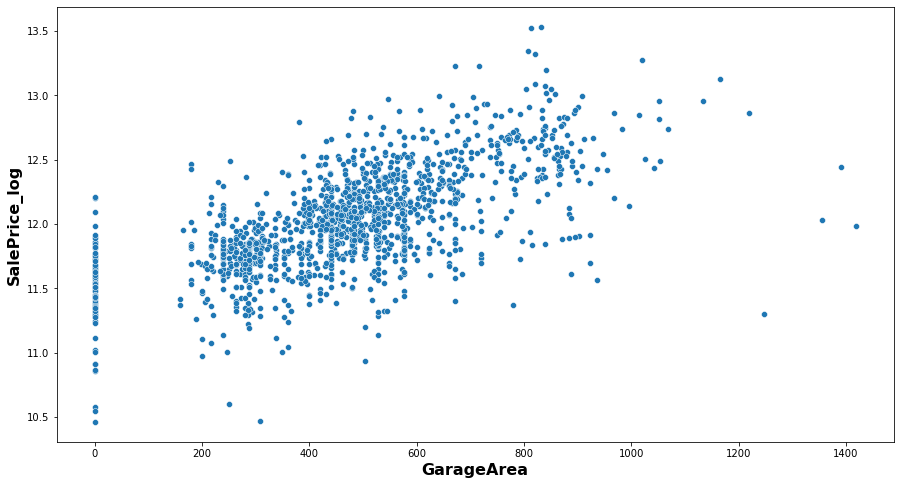

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs WoodDeckSF


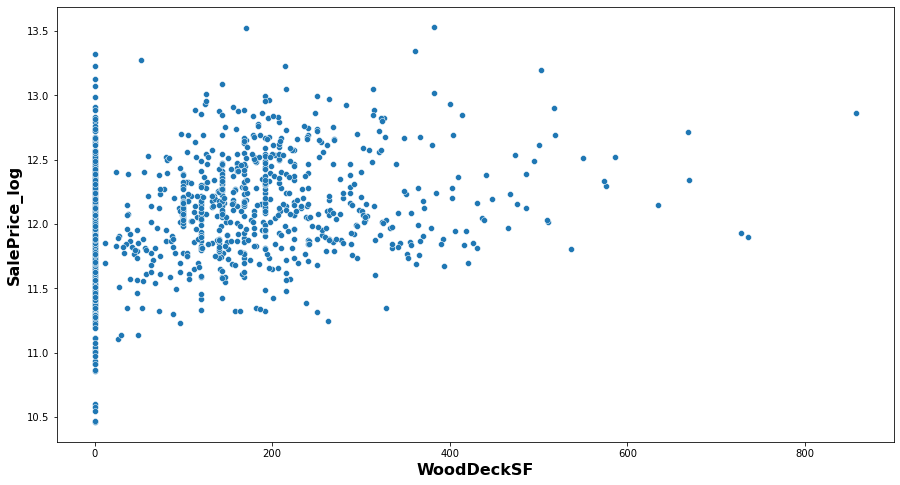

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs OpenPorchSF


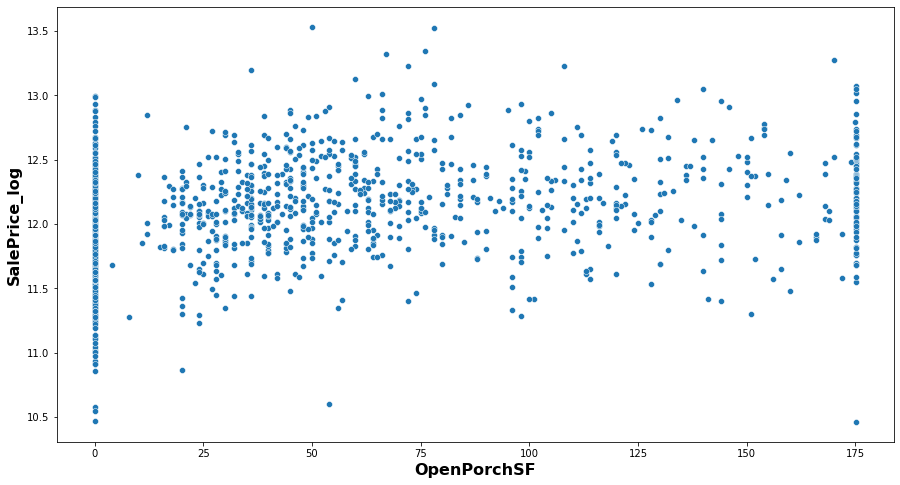

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs AgeYearBuilt


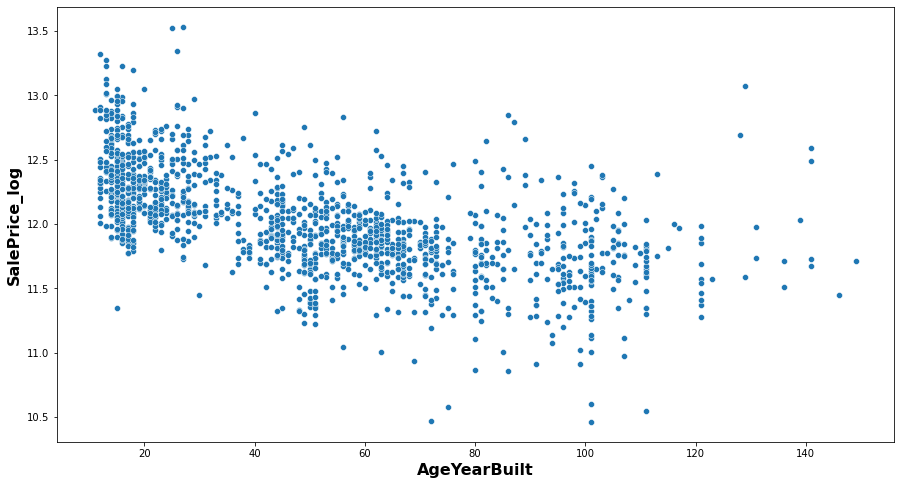

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs AgeYearRemodAdd


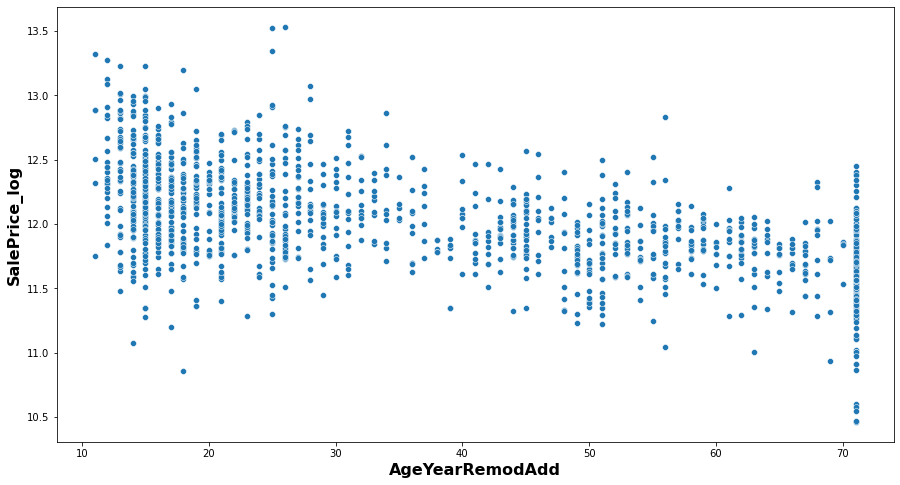

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs AgeGarageYrBlt


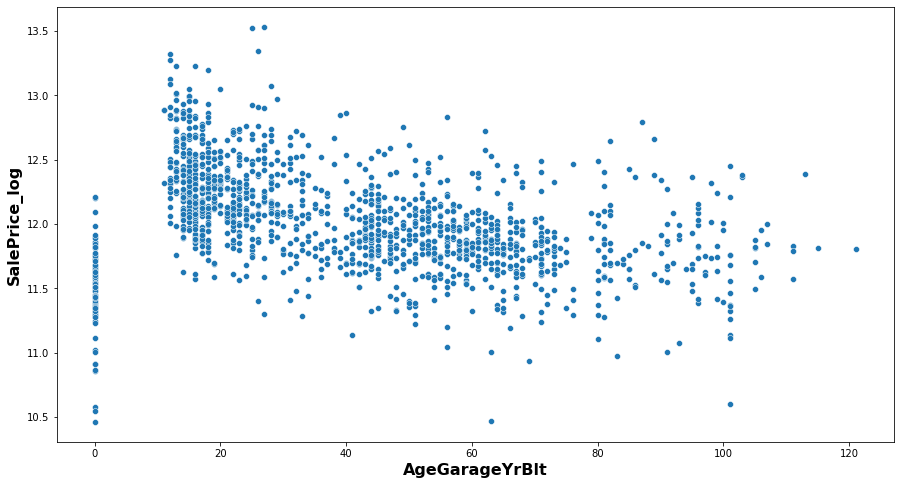

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs AgeYrSold


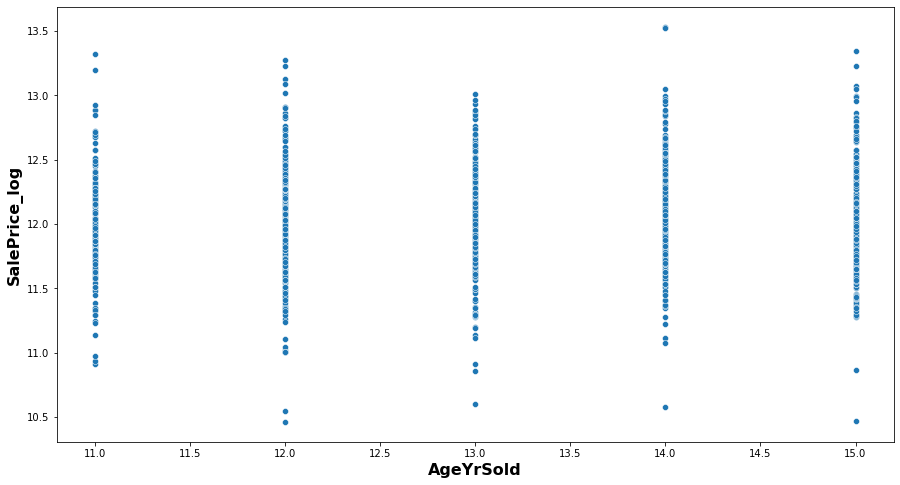

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs SalePrice_log


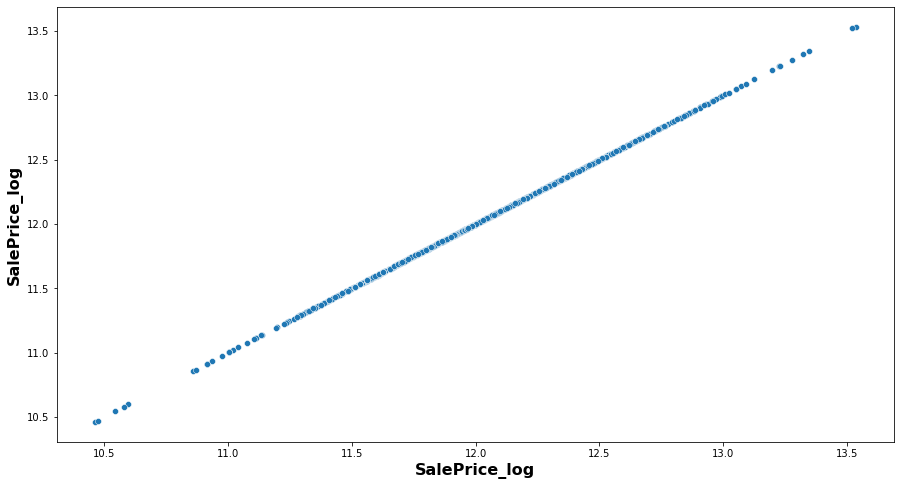

In [71]:
for i in num_col:
    
    print("----"*30)
    print("SalePrice_log vs", i)
    sns.scatterplot(y ='SalePrice_log', x= i, data = data )
    fig = plt.gcf()
    fig.set_size_inches(15,8)
    plt.xlabel(i,weight='bold', fontsize=16)
    plt.ylabel('SalePrice_log',weight='bold', fontsize=16)
    
    plt.show()

#### Categorical Columns

In [72]:
cate_col = data.select_dtypes(include='category').columns


------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs MSZoning


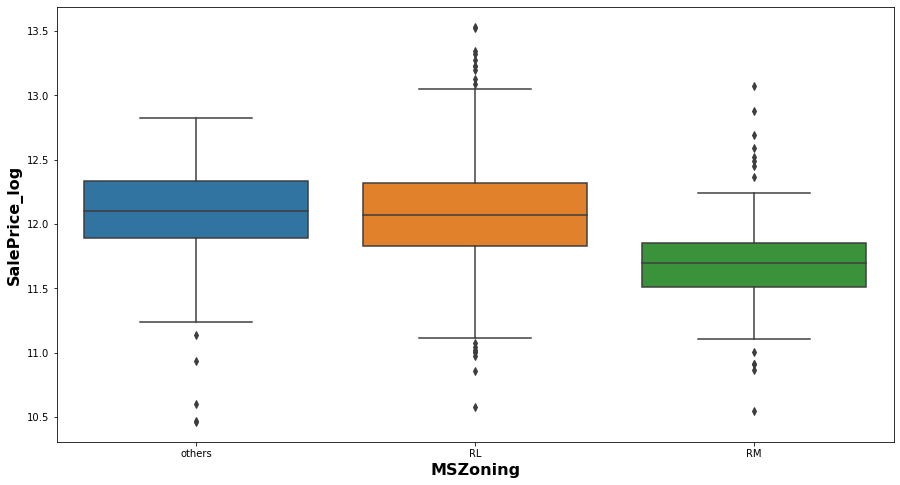

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs Alley


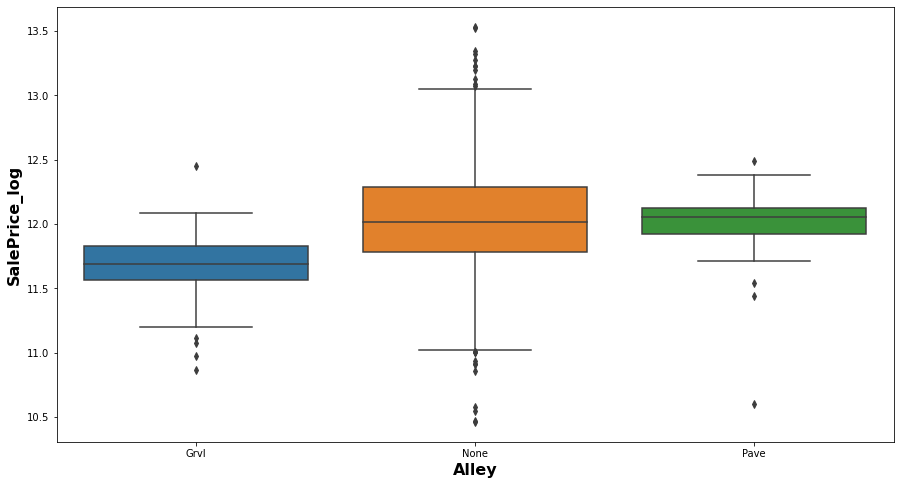

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs LotShape


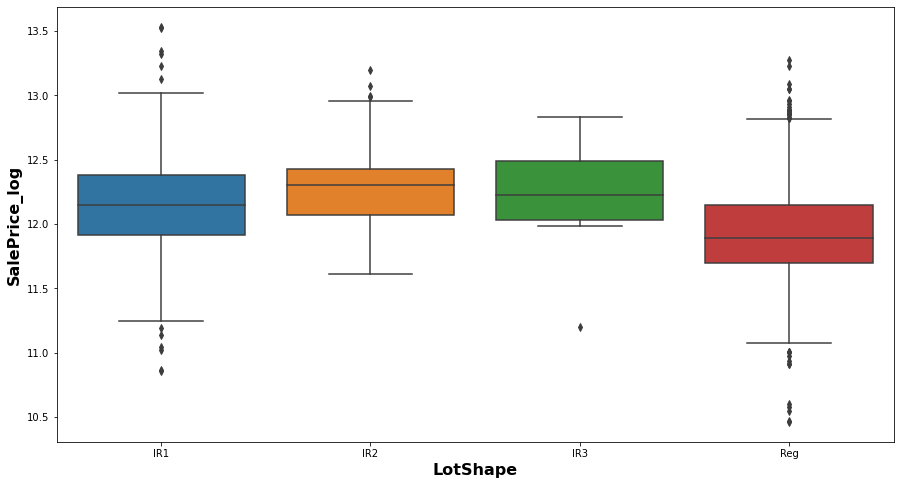

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs LandContour


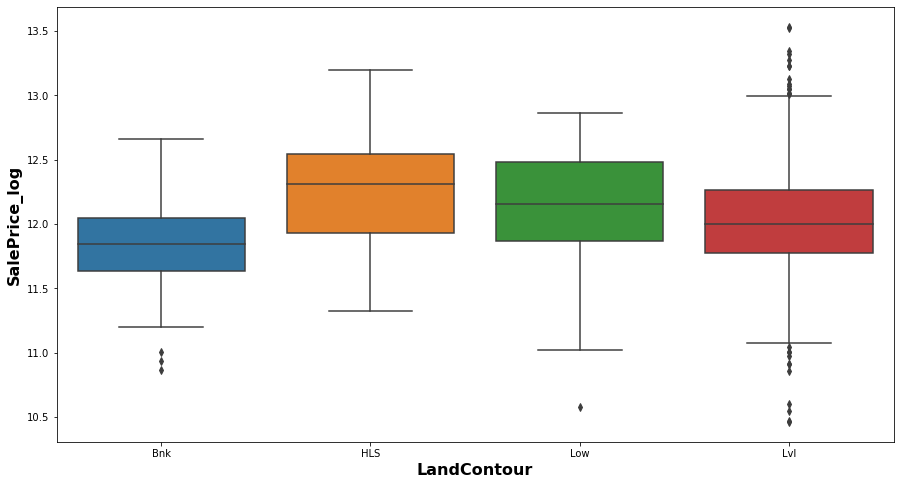

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs LotConfig


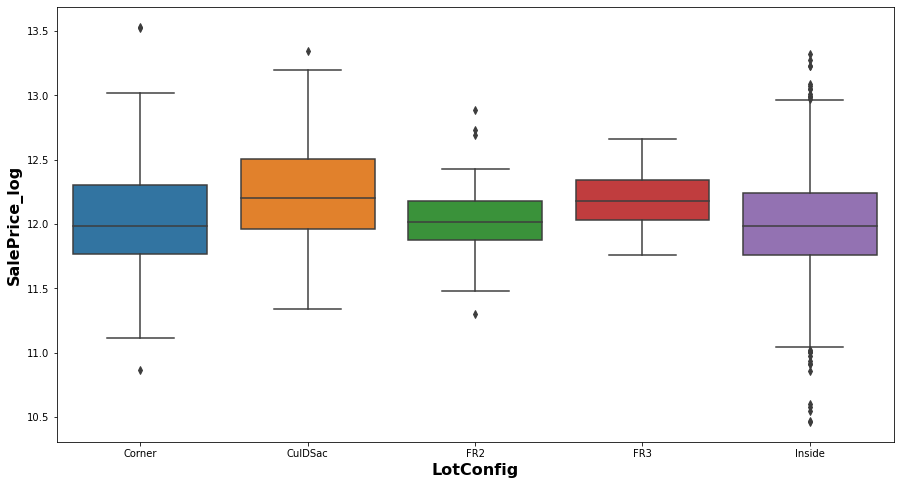

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs LandSlope


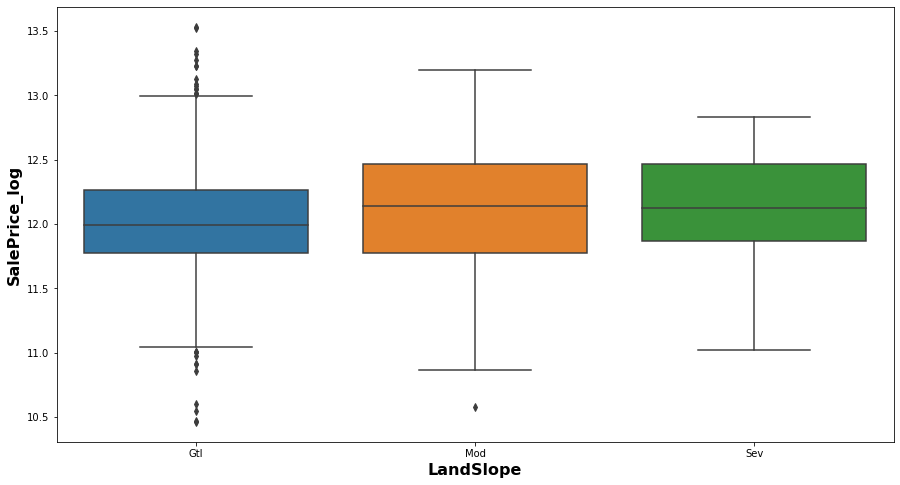

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs Neighborhood


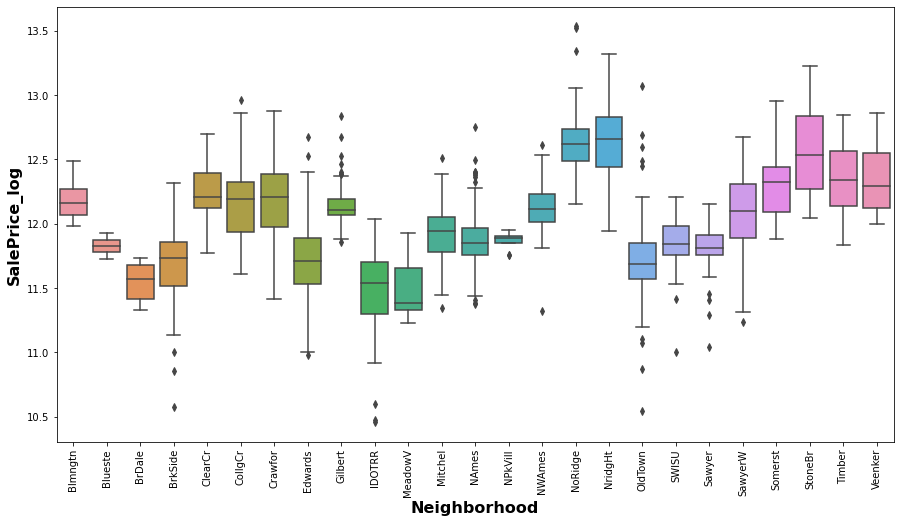

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs BldgType


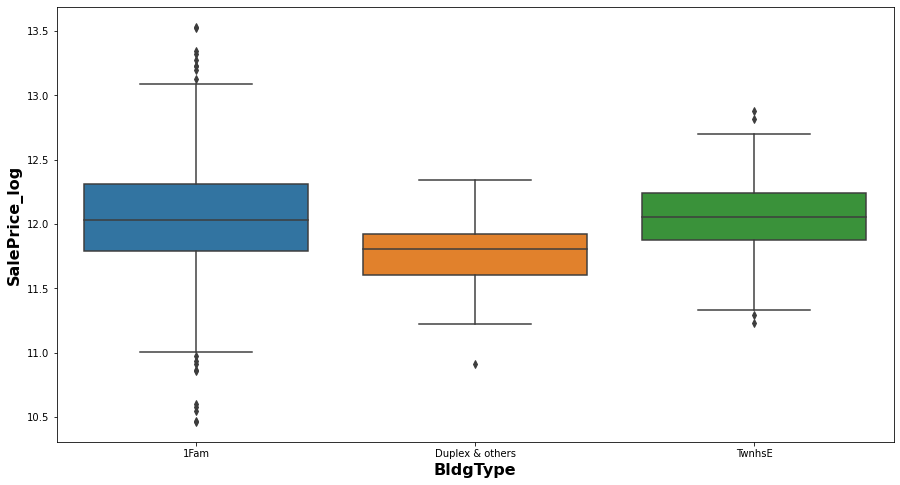

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs HouseStyle


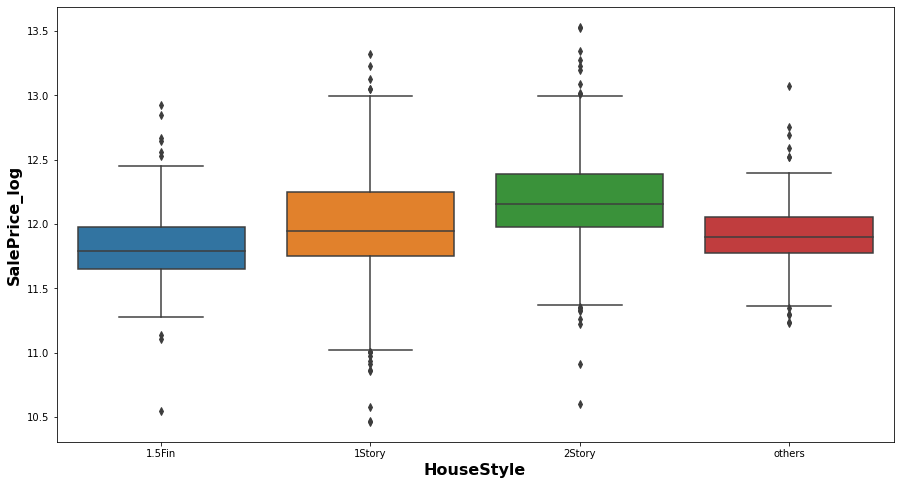

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs RoofStyle


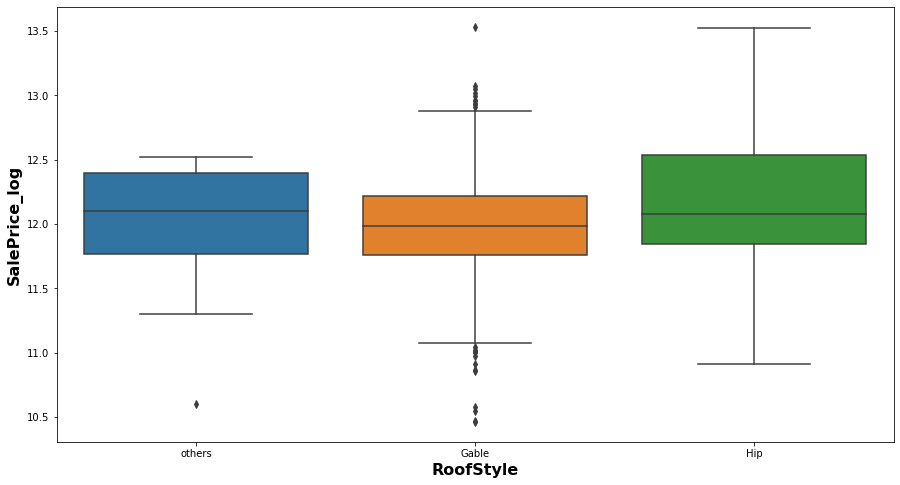

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs Exterior1st


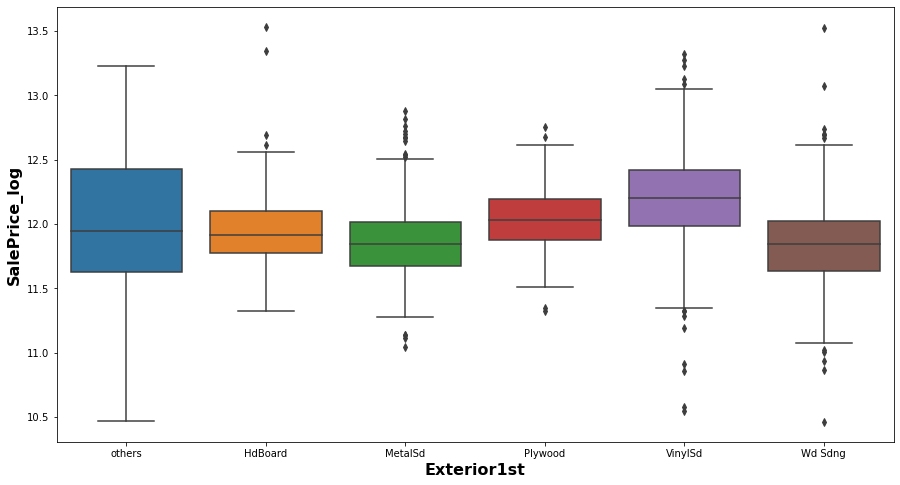

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs Exterior2nd


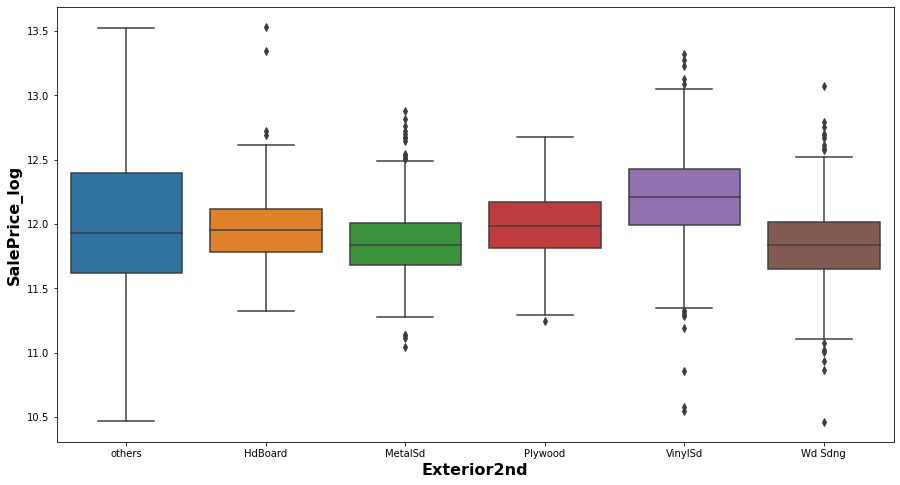

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs MasVnrType


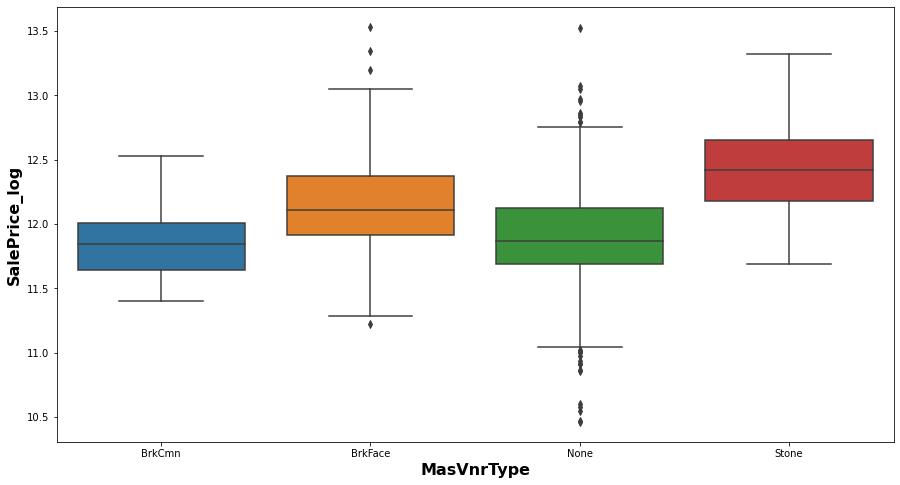

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs Foundation


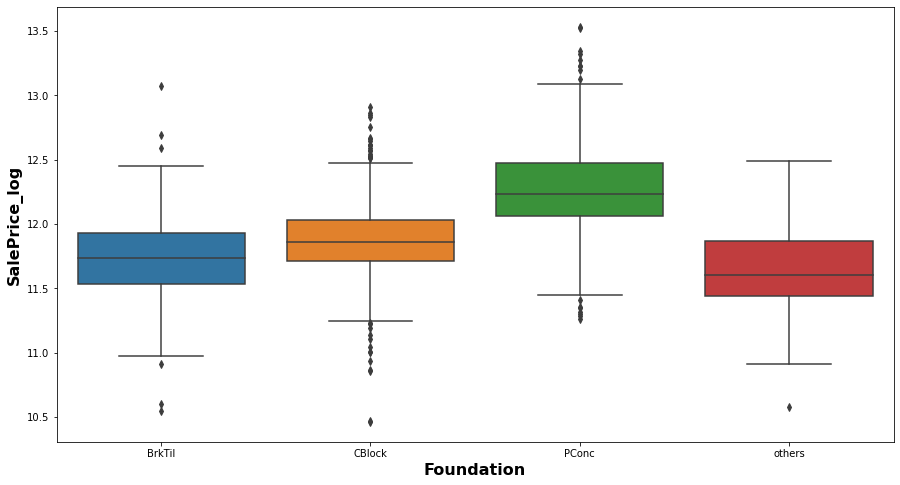

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs BsmtExposure


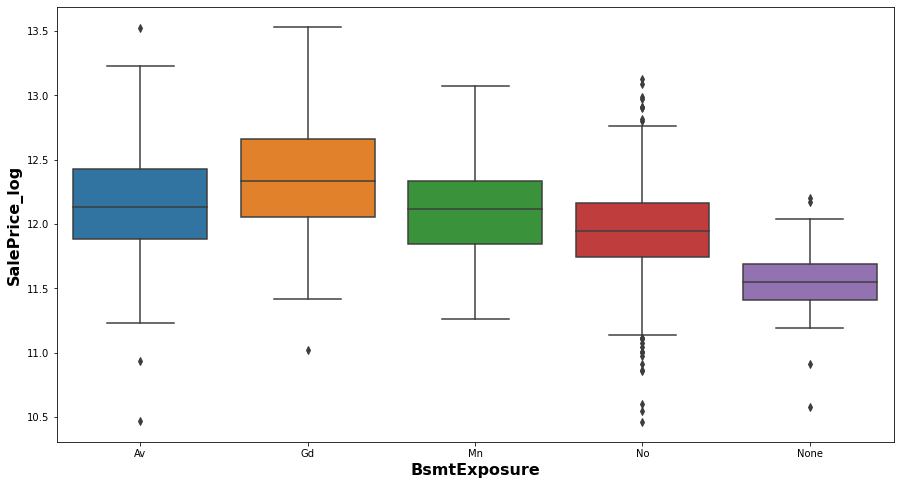

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs BsmtFinType1


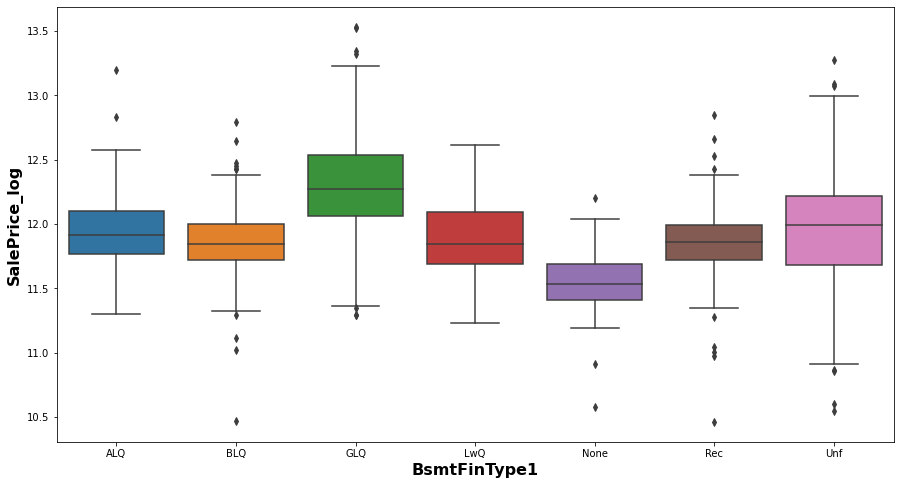

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs CentralAir


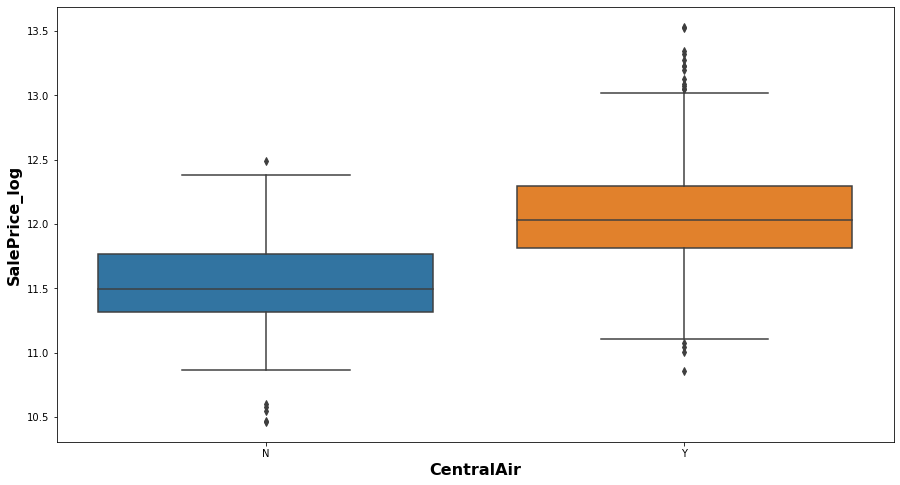

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs Electrical


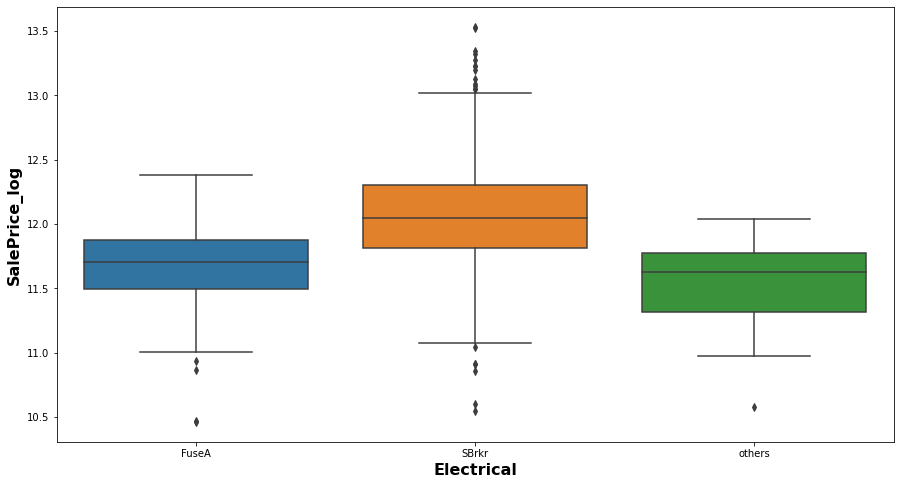

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs GarageType


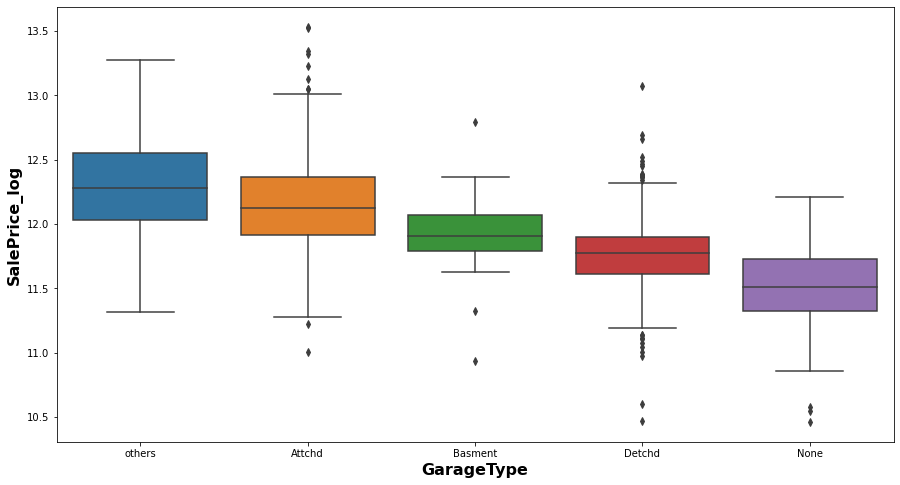

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs GarageFinish


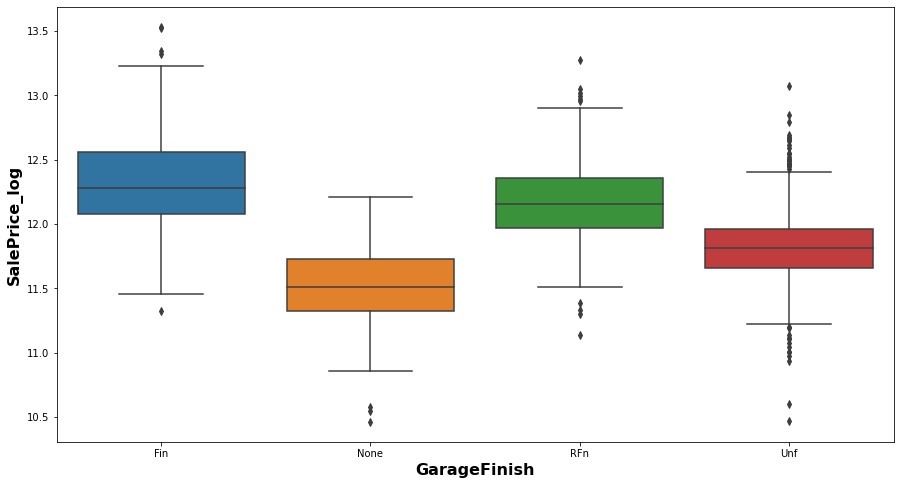

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs PavedDrive


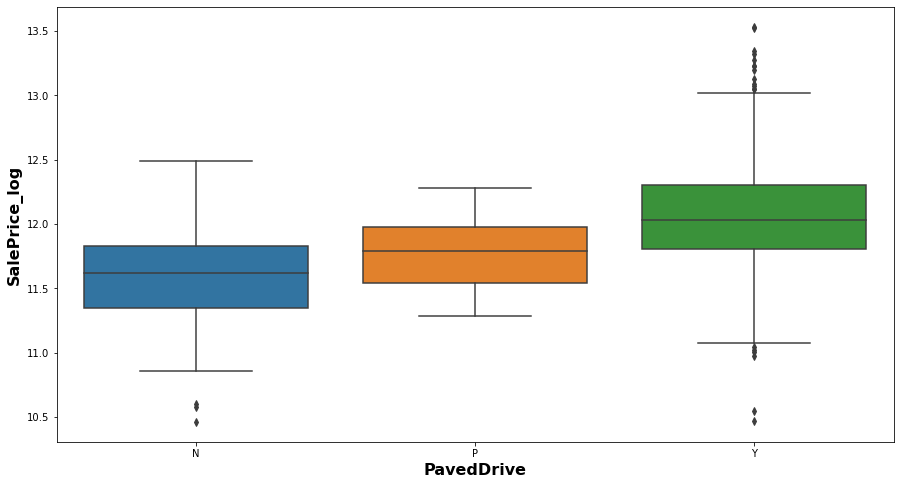

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs Fence


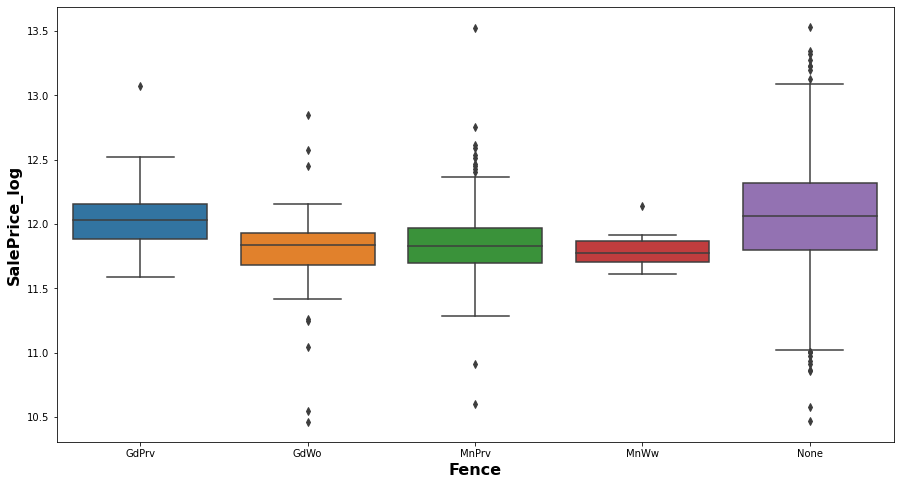

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs MiscFeature


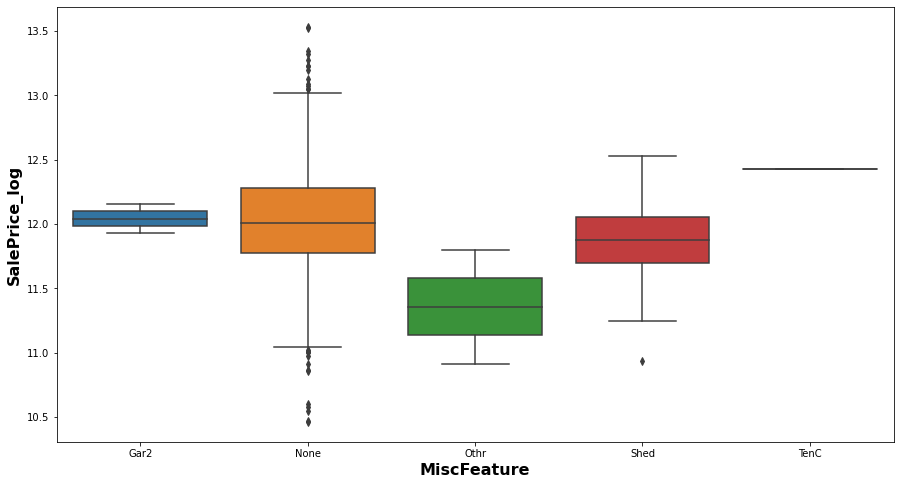

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs MoSold


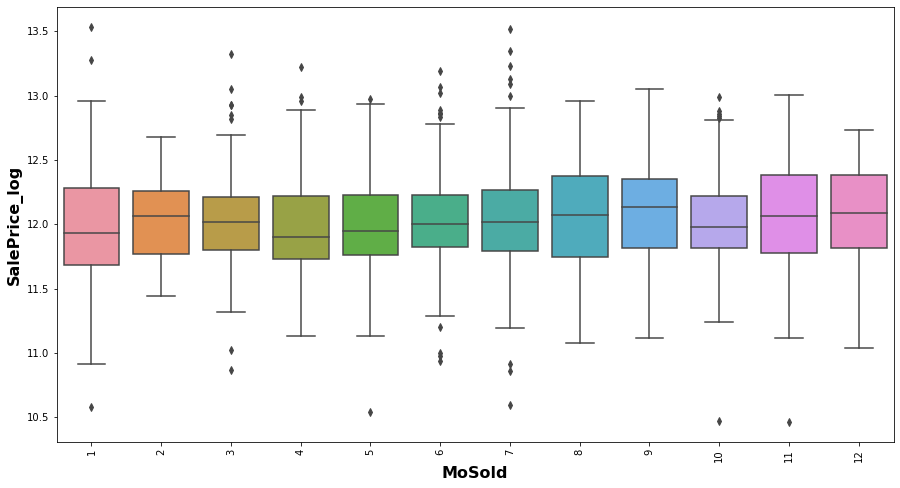

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs SaleType


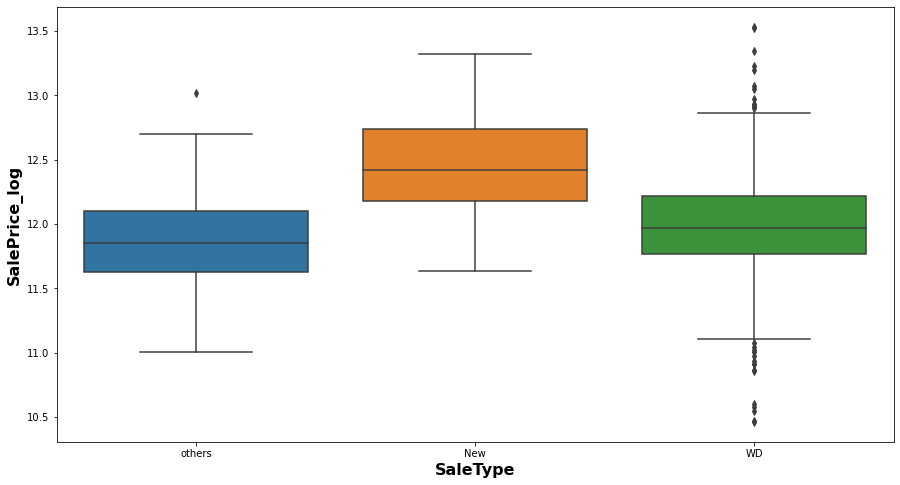

------------------------------------------------------------------------------------------------------------------------
SalePrice_log vs SaleCondition


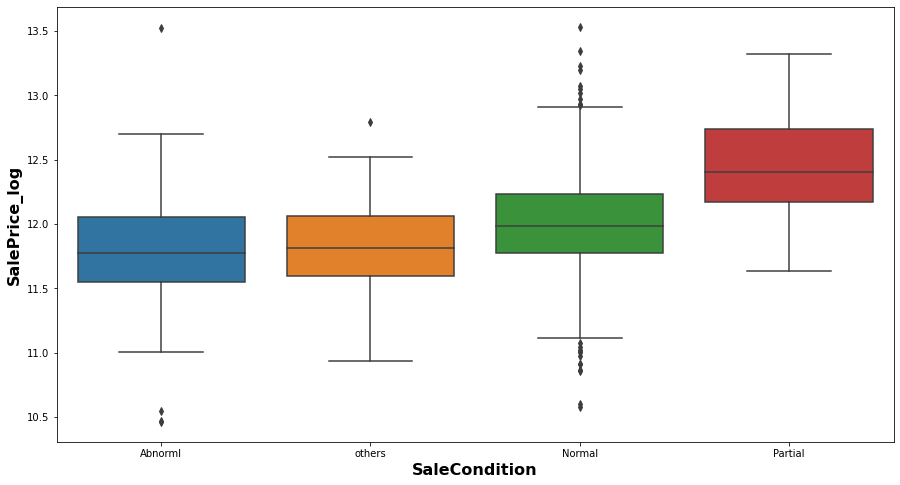

In [73]:
for i in cate_col:
    
    print("----"*30)
    print("SalePrice_log vs", i)
    sns.boxplot(y ='SalePrice_log', x= i, data = data )
    fig = plt.gcf()
    fig.set_size_inches(15,8)
    plt.xlabel(i,weight='bold', fontsize=16)
    plt.ylabel('SalePrice_log',weight='bold', fontsize=16)
    if data[i].nunique() > 10:
        plt.xticks(rotation = 90)
    plt.show()

### Inferences:

#### numerical vs saleprice

1. MSsubClass doesnot show any significant relationship with target variable
2. LotFrontage have a bit of positive linear relationship with target variable.
3. LotArea have visible positive linear relationship with target variable.
4. Overall Quality is highly correlated with target variable, it seems it is one of the highly influential features. This tells us that people tend to pay more for high quality houses. 
5. Overall Cond have somewhat of a positive relationship with target variable.
6. MasVnrArea doesnot show any relationship
7. bsmt area affects target variable positively 
8. It Looks like total bsmt area affects sale price quite a bit, customers tend to pay a bit more than usual for more area in finished basement.
9. 1stFlrSF, 2ndFlrSF column are the area of 1st floor and 2nd floor resp in square ft, and it seems it highly correlates with target variable.
10. It seems Ground living area is one of the most influential variable, it is highly correlated with target variable.
11. if a house have a garage then GarageArea surely affects the saleprice positively.
12. wooddeck have somewhat of a positive relation with target variable.
13 Open Porch doesnot seem to have much of an affect on target variable
14. AgeYrBuilt that tells the age of the house is clearly one of the most important feature here, this feature have a negative relation ship with target variable. Clearly price will be low for old houses.
15. AgeYrRemodAdd tells age after remodelling this also have negative affects on target variable.
16. Garage Age is also a negative feature and shows negative relationship with target variable.
17. it seems number of rooms above ground have positive relation with target variable, more rooms more price. 

#### categorical columns

1. MSZoning, Alley, LotShape arent giving much information about their relation with target variable.
2. By LandContour feature we can say that hillside houses have more sale price than others.
3. LotConfig and landslope aren't telling much
4. It looks like neighbourhood affects the price of house, some neighbourhood tend to have more effect on sale price than others. In which NorthRidge have the highest affect.
5. There isn't much variance in BldgType, it surely tells that most people buy single family house and hence it's price is also a bit higher than others.
6. Saleprice for 2story houses are higher than of other type,
7. It seems roofstyle and exterior doesnot have signifcant effect on target variable.
8. Stone type masonry veneer tend to have more price than other ones.
9. It seems external quality of excellent is having highest of prices of houses. (looks good sells good)
10.  Foundation of poured conc rises the sale price of a house.
11. Excellent Basement quality have high sale price for houses.
12. If house have good living quarters in basement this increases the sale price of the house significantly.
13. Excellent Heating quality  of house increases price to some extent.
14. Houses with central air system have significantly higher price than ones with no central air system.
15.  houses with Standard Circuit Breakers and Romex type of electric sys tem have more price than other ones.
16. Having Full bath in the house significantly rise the salesprice.
17. Houses with Excellent Kitchen quality will have much high price than other types.
18. Excellent Fireplace Quality increases value of the property as well. 
19. Attached Garage type houses tend to have slighlty higher price than usual.
20. seems like finishing of garage does not affect price of house much but size of garage does, having 3 cars space is more pricy than having 4.
21. Only Exccellent quality of pool affects the price other than that good and fair quality doesnot have much difference.
22.Month sold does not have any affect on target variable.
23. New houses have more sale price than older ones so sale type of new have high sale price value.
24. according to Salecondition Newly underconstruction homes seems to have higher price than finished ones.

### Multivariate Analysis (Correlation Matrix)

In [74]:
num_col = list(data.select_dtypes(include=['int64','float64']).columns)

In [75]:
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'AgeYearBuilt',
 'AgeYearRemodAdd',
 'AgeGarageYrBlt',
 'AgeYrSold',
 'SalePrice_log']

In [76]:
# sns.pairplot(data[num_col])

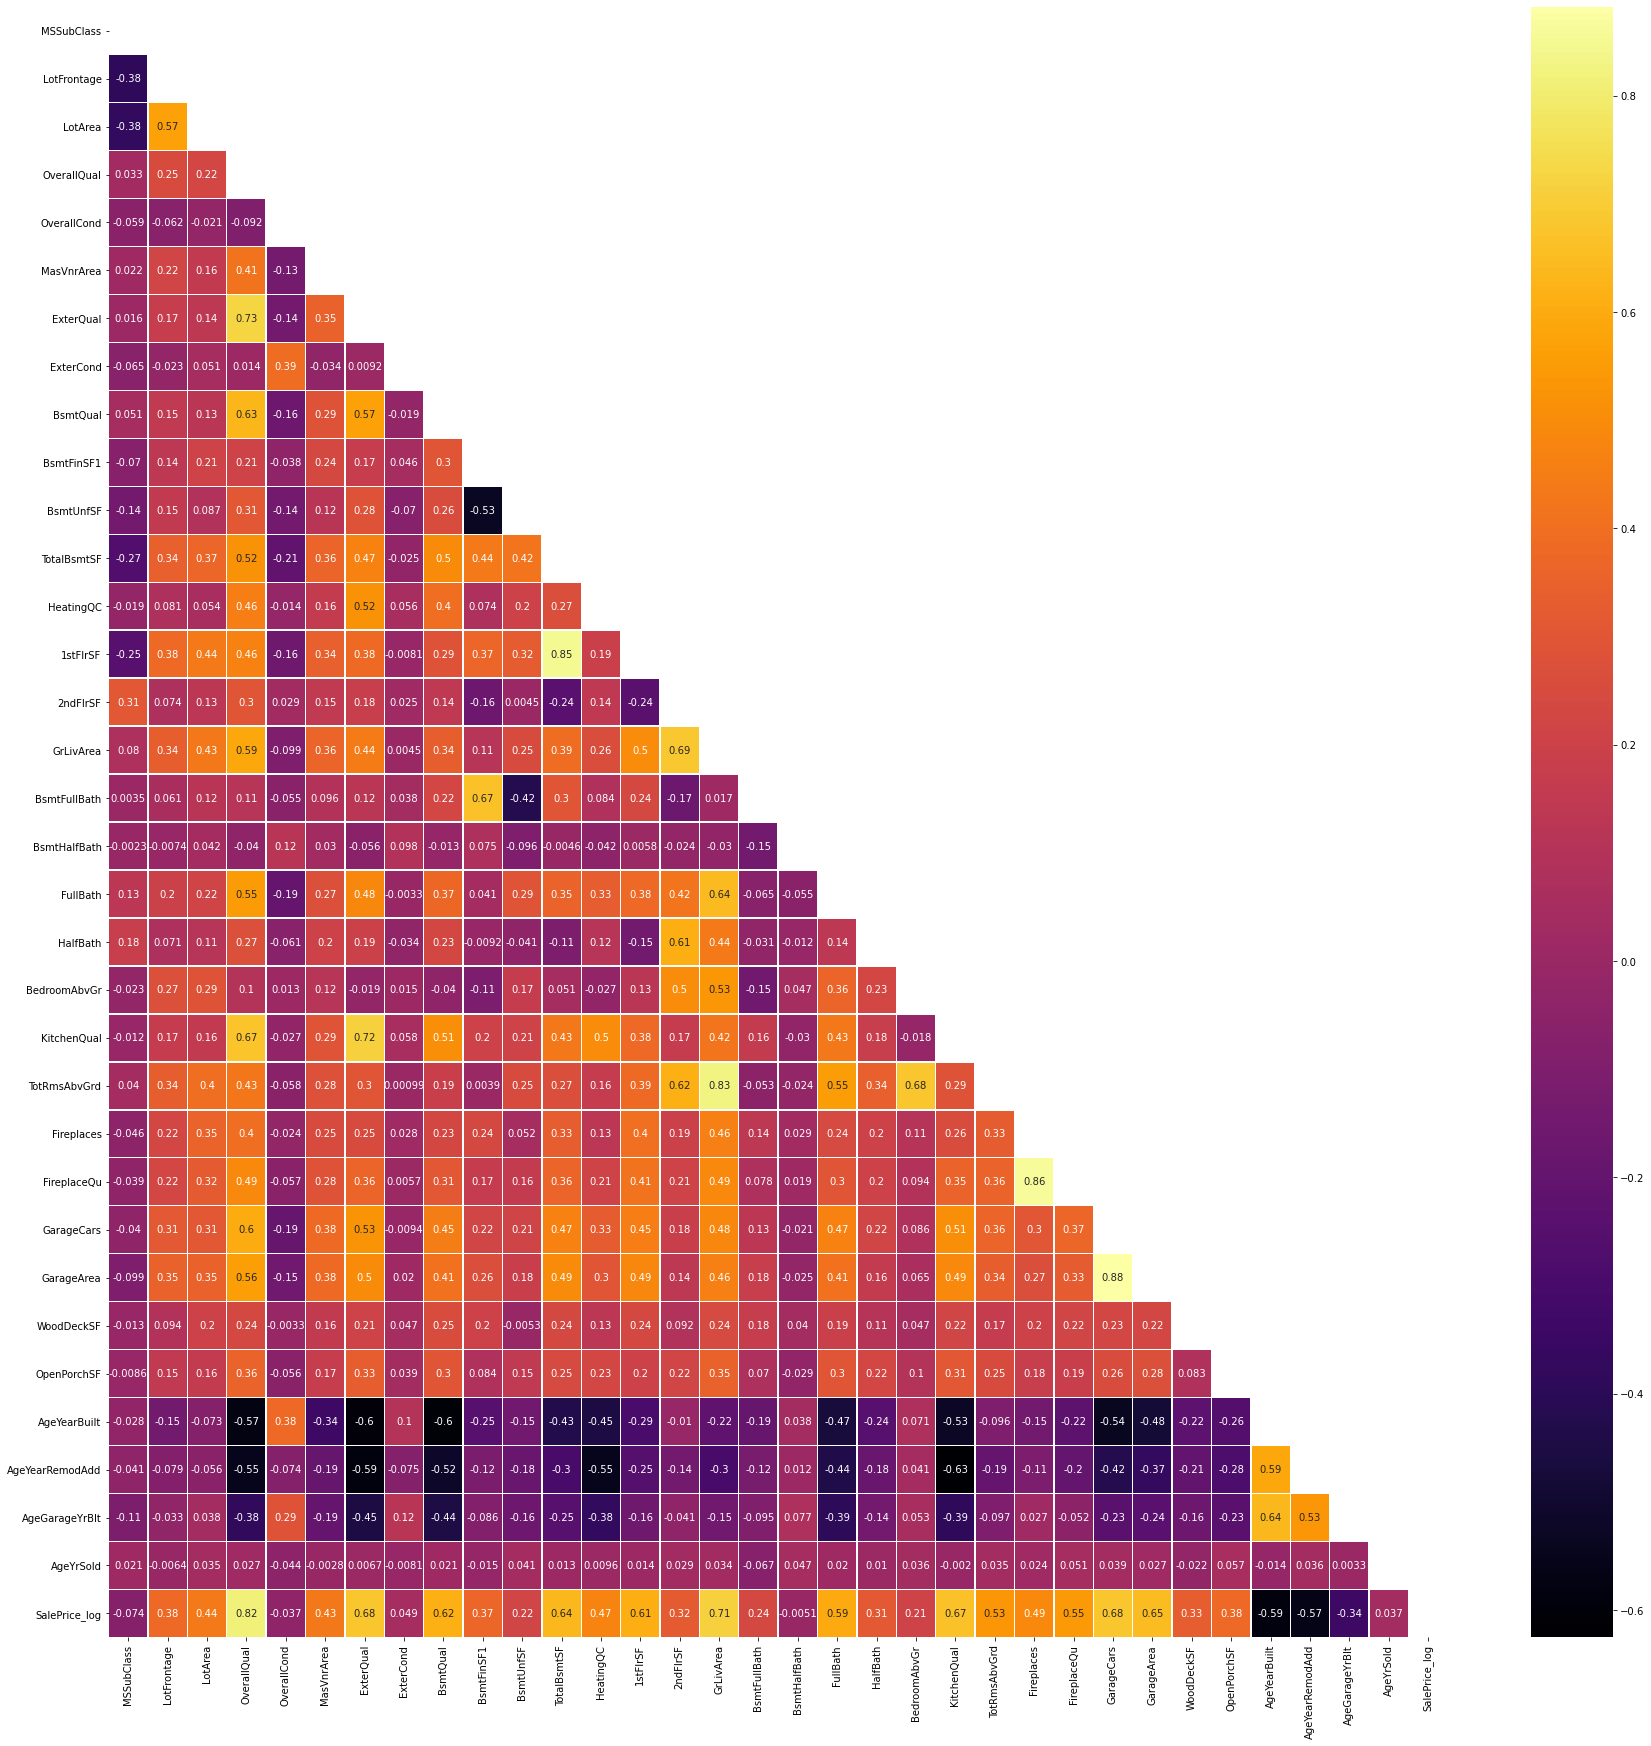

In [77]:
corr = data[num_col].corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap="inferno", annot = True, mask = mask, linewidth= 0.4, xticklabels=True, yticklabels=True )
fig = plt.gcf()
fig.set_size_inches(30,30)

In [78]:
# sns.pairplot(data[num_col])

#### Features that are highly correlated to target variable

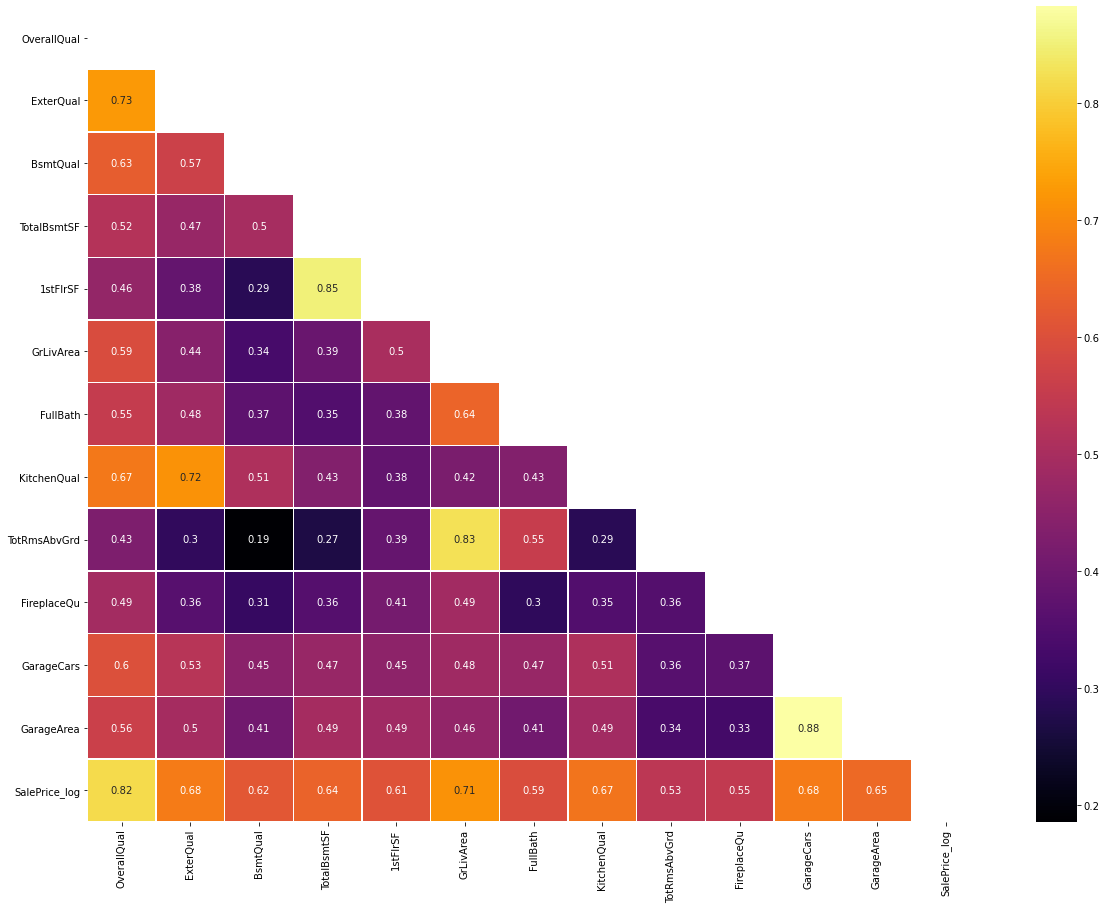

In [79]:
top_features = corr.index[abs(corr['SalePrice_log'] > 0.5)]
# top_features = top_features.drop('SalePrice')
top_corr=data[top_features].corr()
mask = np.triu(np.ones_like(top_corr))
sns.heatmap(top_corr, cmap = 'inferno', linewidth = 0.4,annot = True, mask = mask)
fig = plt.gcf()
fig.set_size_inches(20,15)

According to heatmap, 
    
</t><b> LotArea, OverallQual, MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea, AgeYearBuilt(Age of house), AgeYearRemodAdd </b> are the highly correlated variables with target variable. 

<b> OverallQual, and GrLivArea </b> are the highest correlated features among all.

TotalBsmtSF and 1stFlrSF are also showing high correlation, this may be the sign of multicorrelation


In [80]:
corr.nlargest(10, 'SalePrice_log')['SalePrice_log']

SalePrice_log    1.000000
OverallQual      0.817184
GrLivArea        0.714254
GarageCars       0.680625
ExterQual        0.678840
KitchenQual      0.667893
GarageArea       0.650888
TotalBsmtSF      0.637978
BsmtQual         0.615804
1stFlrSF         0.605680
Name: SalePrice_log, dtype: float64

### Dummification (Dummy variable creation)

In [81]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Fence',
       'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition', 'AgeYearBuilt',
       'AgeYearRemodAdd', 'AgeGarageYrBlt', 'AgeYrSold', 'SalePrice_log'],
      dtype='object')

In [82]:
cate_col = data.select_dtypes(include='category').columns

In [83]:
cate_col

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'CentralAir', 'Electrical',
       'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature',
       'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [84]:
cate_dum = pd.DataFrame(pd.get_dummies(data[cate_col], drop_first = True))

In [85]:
data = data.join(cate_dum, how='right')

In [86]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0          60       RL         65.0   8450.0  None      Reg         Lvl   
1          20       RL         80.0   9600.0  None      Reg         Lvl   
2          60       RL         68.0  11250.0  None      IR1         Lvl   
3          70       RL         60.0   9550.0  None      IR1         Lvl   
4          60       RL         84.0  14260.0  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr     1Fam     2Story            7   
1       FR2       Gtl      Veenker     1Fam     1Story            6   
2    Inside       Gtl      CollgCr     1Fam     2Story            7   
3    Corner       Gtl      Crawfor     1Fam     2Story            7   
4       FR2       Gtl      NoRidge     1Fam     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0            5     Gable     VinylSd     VinylSd    BrkFace       196.0   
1            8     Gable     MetalSd     MetalSd       None         0.0   
2            5     Gable     VinylSd     VinylSd    BrkFace       162.0   
3            5     Gable     Wd Sdng      others       None         0.0   
4            5     Gable     VinylSd     VinylSd    BrkFace       350.0   

   ExterQual  ExterCond Foundation  BsmtQual BsmtExposure BsmtFinType1  \
0          4          3      PConc         4           No          GLQ   
1          3          3     CBlock         4           Gd          ALQ   
2          4          3      PConc         4           Mn          GLQ   
3          3          3     BrkTil         3           No          ALQ   
4          4          3      PConc         4           Av          GLQ   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC CentralAir Electrical  \
0         706        150        856.0          5          Y      SBrkr   
1         978        284       1262.0          5          Y      SBrkr   
2         486        434        920.0          5          Y      SBrkr   
3         216        540        756.0          4          Y      SBrkr   
4         655        490       1145.0          5          Y      SBrkr   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0     856.0       854     1710.0             1             0         2   
1    1262.0         0     1262.0             0             1         2   
2     920.0       866     1786.0             1             0         2   
3     961.0       756     1717.0             1             0         1   
4    1145.0      1053     2198.0             1             0         2   

   HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
0         1             3            4             8           0            0   
1         0             3            3             6           1            3   
2         1             3            4             6           1            3   
3         0             3            4             7           1            4   
4         1             4            4             9           1            3   

  GarageType GarageFinish  GarageCars  GarageArea PavedDrive  WoodDeckSF  \
0     Attchd          RFn           2         548          Y           0   
1     Attchd          RFn           2         460          Y         298   
2     Attchd          RFn           2         608          Y           0   
3     Detchd          Unf           3         642          Y           0   
4     Attchd          RFn           3         836          Y         192   

   OpenPorchSF  ... MasVnrType_Stone Foundation_CBlock Foundation_PConc  \
0         61.0  ...                0                 0                1   
1          0.0  ...                0                 1                0   
2         42.0  ...                0                 0                1   
3         35.0  ...                0                 0                0   
4         84.0  ... 

Dropping categorical columns for which we have created dummy variable.

In [87]:
data.drop(cate_col, axis = 1, inplace = True)

In [88]:
df = data.copy()

Let's get Target variable and independent variables separated

### Train Test Split


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
df_train, df_test = train_test_split(df, test_size = 0.25, random_state=100)

### Rescaling Features

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Applying scaler to all numerical features

In [92]:
num_vars = list(df_train.select_dtypes(include=['int64','float64']))
num_vars.remove('SalePrice_log')
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
774    0.000000     1.000000  0.774643     0.777778        0.500    0.822368   
92     0.058824     0.647318  0.713179     0.444444        0.750    0.000000   
360    0.382353     0.485672  0.300104     0.555556        0.625    0.000000   
549    0.235294     0.573843  0.430343     0.666667        0.500    0.000000   
546    0.176471     0.500367  0.385061     0.555556        0.750    0.000000   

     ExterQual  ExterCond  BsmtQual  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
774   0.666667   0.333333       0.8    0.000000   0.828339     1.000000   
92    0.333333   0.666667       0.8    0.559655   0.069777     0.289130   
360   0.333333   0.333333       0.8    0.606750   0.049229     0.298857   
549   0.666667   0.333333       0.8    0.000000   0.390411     0.318311   
546   0.333333   0.333333       0.8    0.235479   0.327483     0.442328   

     HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
774       0.75  1.000000  0.000000   0.695260      0.000000           0.0   
92        1.00  0.251273  0.000000   0.071689      0.333333           0.0   
360       1.00  0.206380  0.000000   0.039553      0.333333           0.0   
549       1.00  0.206380  0.572397   0.770039      0.000000           0.0   
546       1.00  0.208970  0.348668   0.486373      0.000000           0.0   

     FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
774  0.666667       0.0         0.375     0.666667      0.545455    0.333333   
92   0.333333       0.0         0.250     0.333333      0.181818    0.000000   
360  0.333333       0.0         0.250     0.333333      0.181818    0.333333   
549  0.666667       0.5         0.500     0.666667      0.454545    0.333333   
546  0.333333       0.5         0.375     0.333333      0.272727    0.333333   

     FireplaceQu  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
774          0.8        0.75    0.631171    0.367561     0.257069   
92           0.0        0.50    0.304654    0.000000     0.000000   
360          0.6        0.50    0.331453    0.000000     0.000000   
549          0.8        0.50    0.433709    0.212369     1.000000   
546          0.8        0.50    0.310296    0.000000     0.217081   

     AgeYearBuilt  AgeYearRemodAdd  AgeGarageYrBlt  AgeYrSold  SalePrice_log  \
774      0.028986         0.066667        0.123967       0.75      12.886641   
92       0.644928         0.066667        0.826446       0.25      12.004568   
360      0.231884         0.533333        0.355372       0.75      11.957611   
549      0.050725         0.100000        0.148760       0.25      12.479909   
546      0.630435         1.000000        0.586777       0.75      12.254863   

     MSZoning_RL  MSZoning_RM  Alley_None  Alley_Pave  LotShape_IR2  \
774            1            0           1           0             0   
92             1            0           0           0             0   
360            1            0           1           0             0   
549            0            0           1           0             0   
546            1            0           1           0             0   

     LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
774             0             1                0                0   
92              0             0                1                0   
360             0             0                0                0   
549             0             1                0                0   
546             0             0                0                0   

     LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
774                1                  0              0              0   
92                 0                  0              0              0   
360                1                  1              0              0   
549                1                  0              0              0   
546                0      

In [93]:
df_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1436    0.000000     0.353417  0.403728     0.333333        0.625    0.000000   
57      0.235294     0.779574  0.591457     0.666667        0.500    0.000000   
780     0.000000     0.397502  0.323881     0.666667        0.500    0.083333   
382     0.235294     0.632623  0.421117     0.666667        0.500    0.000000   
1170    0.352941     0.588538  0.466186     0.555556        0.625    0.000000   

      ExterQual  ExterCond  BsmtQual  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
1436   0.333333   0.333333       0.6    0.483516   0.106164     0.279403   
57     0.666667   0.333333       0.8    0.000000   0.368151     0.276161   
780    0.333333   0.333333       0.8    0.000000   0.529538     0.581746   
382    0.666667   0.333333       0.8    0.000000   0.401969     0.340196   
1170   0.333333   0.333333       0.6    0.409733   0.245719     0.467456   

      HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1436       0.50  0.164940  0.000000   0.009888      0.000000           0.0   
57         1.00  0.161487  0.416465   0.538904      0.000000           0.0   
780        0.75  0.500777  0.000000   0.250294      0.000000           0.0   
382        1.00  0.229690  0.415496   0.586490      0.000000           0.0   
1170       0.50  0.384227  0.000000   0.166862      0.333333           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
1436  0.333333       0.0         0.375     0.333333      0.181818    0.000000   
57    0.666667       0.5         0.375     0.666667      0.363636    0.000000   
780   0.666667       0.0         0.375     0.333333      0.272727    0.333333   
382   0.666667       0.5         0.375     0.666667      0.454545    0.000000   
1170  0.333333       0.0         0.375     0.333333      0.272727    0.333333   

      FireplaceQu  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1436          0.0        0.50    0.372355    0.000000     0.000000   
57            0.0        0.50    0.398449    0.000000     0.399886   
780           0.6        0.50    0.283498    0.256709     0.119966   
382           0.0        0.50    0.450635    0.168028     0.302771   
1170          0.2        0.25    0.252468    0.236873     0.000000   

      AgeYearBuilt  AgeYearRemodAdd  AgeGarageYrBlt  AgeYrSold  SalePrice_log  \
1436      0.282609         0.650000        0.388430       0.75      11.699405   
57        0.043478         0.100000        0.140496       1.00      12.188418   
780       0.108696         0.233333        0.214876       0.75      12.078239   
382       0.028986         0.066667        0.123967       0.75      12.271392   
1170      0.239130         0.550000        0.363636       0.50      12.049419   

      MSZoning_RL  MSZoning_RM  Alley_None  Alley_Pave  LotShape_IR2  \
1436            1            0           1           0             0   
57              1            0           1           0             0   
780             1            0           1           0             0   
382             1            0           1           0             0   
1170            1            0           1           0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1436             0             1                0                0   
57               0             0                0                0   
780              0             1                0                0   
382              0             0                0                0   
1170             0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
1436                1                  0              1              0   
57                  1                  0              0              0   
780                 1                  0              0              0   
382                 1                  0        

### Dividing into X and Y sets

In [94]:
y_train = df_train.pop('SalePrice_log')
X_train = df_train

y_test = df_test.pop('SalePrice_log')
X_test = df_test

### RFE

In [95]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [96]:

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 40)
rfe = rfe.fit(X_train, y_train)

In [97]:
pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)),
             columns=['Features','RFE Support','Ranking']).sort_values(by='Ranking', ascending = True).head(40)

Features  RFE Support  Ranking
70       Neighborhood_StoneBr         True        1
30            AgeYearRemodAdd         True        1
38               LotShape_IR3         True        1
44              LotConfig_FR2         True        1
45              LotConfig_FR3         True        1
48              LandSlope_Sev         True        1
49       Neighborhood_Blueste         True        1
50        Neighborhood_BrDale         True        1
52       Neighborhood_ClearCr         True        1
54       Neighborhood_Crawfor         True        1
55       Neighborhood_Edwards         True        1
57        Neighborhood_IDOTRR         True        1
58       Neighborhood_MeadowV         True        1
63       Neighborhood_NoRidge         True        1
64       Neighborhood_NridgHt         True        1
65       Neighborhood_OldTown         True        1
69       Neighborhood_Somerst         True        1
140      SaleCondition_Normal         True        1
73   BldgType_Duplex & others         True        1
96            BsmtExposure_Gd         True        1
123          MiscFeature_Othr         True        1
137              SaleType_New         True        1
29               AgeYearBuilt         True        1
25                 GarageCars         True        1
141     SaleCondition_Partial         True        1
7                   ExterCond         True        1
18                   FullBath         True        1
10                  BsmtUnfSF         True        1
14                   2ndFlrSF         True        1
2                     LotArea         True        1
8                    BsmtQual         True        1
13                   1stFlrSF         True        1
3                 OverallQual         True        1
11                TotalBsmtSF         True        1
4                 OverallCond         True        1
21                KitchenQual         True        1
22               TotRmsAbvGrd         True        1
16               BsmtFullBath         True        1
15                  GrLivArea         True        1
24                FireplaceQu         True        1

In [98]:
col = X_train.columns[rfe.support_]
len(col)

40

In [99]:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

using statsmodels to get detailed view of linear regression model

In [100]:
import statsmodels.api as sm


In [101]:
X_train_rfe = sm.add_constant(X_train_rfe)


In [102]:
X_test_rfe = sm.add_constant(X_test_rfe)

In [103]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [104]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     279.5
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:50:29   Log-Likelihood:                 794.00
No. Observations:                1095   AIC:                            -1508.
Df Residuals:                    1055   BIC:                            -1308.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.0392      0.043    258.499      0.000      10.955      11.123
LotArea                      0.1182      0.020      6.042      0.000       0.080       0.157
OverallQual                  0.4292      0.045      9.452      0.000       0.340       0.518
OverallCond                  0.4245      0.035     12.066      0.000       0.355       0.494
ExterCond                   -0.0537      0.034     -1.587      0.113      -0.120       0.013
BsmtQual                     0.0772      0.033      2.313      0.021       0.012       0.143
BsmtUnfSF                   -0.1366      0.029     -4.754      0.000      -0.193      -0.080
TotalBsmtSF                  0.2655      0.033      7.972      0.000       0.200       0.331
1stFlrSF                     0.0931      0.046      2.005      0.045       0.002       0.184
2ndFlrSF                     0.2207      0.064      3.435      0.001       0.095       0.347
GrLivArea                    0.2478      0.055      4.499      0.000       0.140       0.356
BsmtFullBath                 0.1117      0.029      3.821      0.000       0.054       0.169
FullBath                     0.0460      0.031      1.487      0.137      -0.015       0.107
KitchenQual                  0.0827      0.025      3.282      0.001       0.033       0.132
TotRmsAbvGrd                 0.0676      0.048      1.404      0.161      -0.027       0.162
FireplaceQu                  0.0591      0.013      4.596      0.000       0.034       0.084
GarageCars                   0.1661      0.028      6.020      0.000       0.112       0.220
AgeYearBuilt                -0.3178      0.036     -8.895      0.000      -0.388      -0.248
AgeYearRemodAdd             -0.0565      0.016     -3.444      0.001      -0.089      -0.024
LotShape_IR3                -0.0996      0.041     -2.418      0.016      -0.181      -0.019
LotConfig_FR2               -0.0474      0.022     -2.189      0.029      -0.090      -0.005
LotConfig_FR3               -0.0589      0.070     -0.841      0.401      -0.196       0.079
LandSlope_Sev                0.0642      0.042      1.537      0.125      -0.018       0.146
Neighborhood_Blueste        -0.0673      0.086     -0.783      0.434      -0.236       0.101
Neighborhood_BrDale         -0.0753      0.038     -1.976      0.048      -0.150      -0.001
Neighborhood_ClearCr         0.0531      0.028      1.928      0.054      -0.001       0.107
Neighborhood_Crawfor         0.1326      0.022      6.109      0.000       0.090       0.175
Neighborhood_Edwards        -0.0769      0.015     -5.054      0.000      -0.107      -0.047
Neighborhood_IDOTRR         -0.1218      0.025     -4.924      0.000      -0.170      -0.073
Neighborhood_MeadowV        -0.1659      0.042     -3.924      0.000      -0.249      -0.083
Neighborhood_N

using only 40 columns out 170 and we were still able to explain about 90% of the variance. Though we can see some multicollinearity.

In [105]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

In [106]:
from sklearn.metrics import r2_score, mean_squared_error

In [107]:
# y_pred_train = lm.predict(X_train)
# y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train , y_pred_train)
print("r2_train score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train score: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test score: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse train score: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse test score: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train score:  0.9117508158355789
r2_test score:  0.8896805637571588
rss_train score:  15.035473584068894
rss_test score:  6.886737305481089
mse train score:  0.013731026104172506
mse test score:  0.018867773439674218


As we can see that there is more than 2% of difference in train score and test score. Here it is completely normal to have this much difference in train and test set R-squared value. Still Let's try Ridge and Lasso and see how they will affect our model and predictions.

## Ridge and LAsso

In [109]:
from sklearn.linear_model import Ridge, Lasso
from sklearn. model_selection import GridSearchCV
from sklearn import linear_model

##### trying out different values of alpha through gridSearchCV to decide the best one

In [110]:
params = {
    "alpha":[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
}


### Ridge

In [111]:
ridge = Ridge()

#cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator=ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv=folds,
                       return_train_score = True,
                       verbose = 1)

ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
#checking the value of optimum number of parameters
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 3.0}
-0.08776173096644378


In [113]:
RidgeModelCVResults = pd.DataFrame(ridge_model_cv.cv_results_)
RidgeCVResults = RidgeModelCVResults[RidgeModelCVResults['param_alpha']<=100]
RidgeCVResults[['param_alpha', 'mean_train_score', 'mean_test_score',
                'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
26           3         -0.075598        -0.087762                1
25           2         -0.075126        -0.087859                2
27           4         -0.076160        -0.087941                3
28           5         -0.076768        -0.088196                4
24           1         -0.074831        -0.088450                5
29           6         -0.077372        -0.088496                6
23         0.9         -0.074822        -0.088555                7
22         0.8         -0.074818        -0.088669                8
21         0.7         -0.074826        -0.088800                9
30           7         -0.077945        -0.088802               10
20         0.6         -0.074839        -0.088953               11
31           8         -0.078487        -0.089108               12
19         0.5         -0.074856        -0.089131               13
18         0.4         -0.074879        -0.089341               14
32           9         -0.079000        -0.089409               15
17         0.3         -0.074908        -0.089582               16
33          10         -0.079484        -0.089686               17
16         0.2         -0.074943        -0.089861               18
15         0.1         -0.074992        -0.090194               19
14        0.05         -0.075018        -0.090383               20
13        0.04         -0.075024        -0.090423               21
12        0.03         -0.075030        -0.090464               22
11        0.02         -0.075036        -0.090505               23
10        0.01         -0.075041        -0.090547               24
9        0.005         -0.075044        -0.090568               25
8        0.004         -0.075045        -0.090573               26
7        0.003         -0.075046        -0.090577               27
6        0.002         -0.075046        -0.090581               28
5        0.001         -0.075047        -0.090586               29
4       0.0005         -0.075047        -0.090588               30
3       0.0004         -0.075047        -0.090588               31
2       0.0003         -0.075047        -0.090589               32
1       0.0002         -0.075047        -0.090589               33
0       0.0001         -0.075047        -0.090589               34
34          20         -0.083510        -0.092224               35
35          50         -0.091926        -0.098560               36
36         100         -0.101764        -0.107106               37

###### here in the above dataframe we can see that for Ridge Regression with alpha = 3.0 model is having lowest mean train score and mean test score.

Text(0.5, 1.0, 'neg_mean_absolute_error')

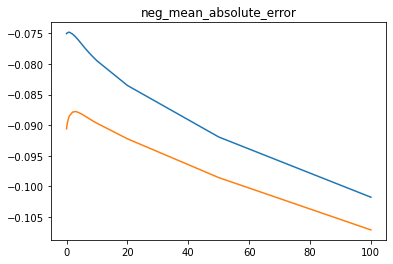

In [114]:
plt.plot(RidgeCVResults['param_alpha'], RidgeCVResults['mean_train_score'])
plt.plot(RidgeCVResults['param_alpha'], RidgeCVResults['mean_test_score'])
plt.title("neg_mean_absolute_error")

###### same thing is shown in the plot, maximum negative mean absolute error for both train and test score is at around 0.3

In [115]:
ridge_model_cv.best_params_

{'alpha': 3.0}

###### using alpha = 3 and building Ridge or L2 model.

In [117]:
alpha = 3
ridge = Ridge(alpha = alpha)
ridge.fit(X_train_rfe, y_train)

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)


###### Ridge coefficients of features in descending order

In [118]:
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coeff': ridge.coef_.round(3), 'abs_coef': abs(ridge.coef_.round(3))}).sort_values(by='Coeff', ascending = False)
ridge_df.reset_index(drop=True, inplace=True)
ridge_df[['Features','Coeff']]

Features  Coeff
0                OverallQual  0.357
1                OverallCond  0.327
2                  GrLivArea  0.253
3                TotalBsmtSF  0.237
4                   2ndFlrSF  0.193
5                 GarageCars  0.170
6       Neighborhood_Crawfor  0.121
7                    LotArea  0.118
8       Neighborhood_NoRidge  0.115
9               BsmtFullBath  0.109
10      Neighborhood_StoneBr  0.108
11                  BsmtQual  0.105
12               KitchenQual  0.104
13                  1stFlrSF  0.101
14      Neighborhood_NridgHt  0.101
15      Neighborhood_Somerst  0.099
16              TotRmsAbvGrd  0.074
17      SaleCondition_Normal  0.069
18               FireplaceQu  0.068
19           BsmtExposure_Gd  0.066
20                  FullBath  0.060
21      Neighborhood_ClearCr  0.047
22             LandSlope_Sev  0.047
23              SaleType_New  0.047
24     SaleCondition_Partial  0.047
25                     const  0.000
26                 ExterCond -0.021
27      Neighborhood_Blueste -0.024
28             LotConfig_FR3 -0.026
29             LotConfig_FR2 -0.041
30       Neighborhood_BrDale -0.048
31          MiscFeature_Othr -0.053
32      Neighborhood_OldTown -0.071
33              LotShape_IR3 -0.077
34           AgeYearRemodAdd -0.079
35      Neighborhood_Edwards -0.082
36  BldgType_Duplex & others -0.086
37                 BsmtUnfSF -0.119
38       Neighborhood_IDOTRR -0.126
39      Neighborhood_MeadowV -0.130
40              AgeYearBuilt -0.255

In [119]:
ridge_df.sort_values(by='abs_coef', ascending = False).reset_index(drop=True)

Features  Coeff  abs_coef
0                OverallQual  0.357     0.357
1                OverallCond  0.327     0.327
2               AgeYearBuilt -0.255     0.255
3                  GrLivArea  0.253     0.253
4                TotalBsmtSF  0.237     0.237
5                   2ndFlrSF  0.193     0.193
6                 GarageCars  0.170     0.170
7       Neighborhood_MeadowV -0.130     0.130
8        Neighborhood_IDOTRR -0.126     0.126
9       Neighborhood_Crawfor  0.121     0.121
10                 BsmtUnfSF -0.119     0.119
11                   LotArea  0.118     0.118
12      Neighborhood_NoRidge  0.115     0.115
13              BsmtFullBath  0.109     0.109
14      Neighborhood_StoneBr  0.108     0.108
15                  BsmtQual  0.105     0.105
16               KitchenQual  0.104     0.104
17      Neighborhood_NridgHt  0.101     0.101
18                  1stFlrSF  0.101     0.101
19      Neighborhood_Somerst  0.099     0.099
20  BldgType_Duplex & others -0.086     0.086
21      Neighborhood_Edwards -0.082     0.082
22           AgeYearRemodAdd -0.079     0.079
23              LotShape_IR3 -0.077     0.077
24              TotRmsAbvGrd  0.074     0.074
25      Neighborhood_OldTown -0.071     0.071
26      SaleCondition_Normal  0.069     0.069
27               FireplaceQu  0.068     0.068
28           BsmtExposure_Gd  0.066     0.066
29                  FullBath  0.060     0.060
30          MiscFeature_Othr -0.053     0.053
31       Neighborhood_BrDale -0.048     0.048
32     SaleCondition_Partial  0.047     0.047
33              SaleType_New  0.047     0.047
34      Neighborhood_ClearCr  0.047     0.047
35             LandSlope_Sev  0.047     0.047
36             LotConfig_FR2 -0.041     0.041
37             LotConfig_FR3 -0.026     0.026
38      Neighborhood_Blueste -0.024     0.024
39                 ExterCond -0.021     0.021
40                     const  0.000     0.000

In [120]:
# y_pred_train = lm.predict(X_train)
# y_pred_test = lm.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train , y_pred_train)
print("r2_train score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train score: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test score: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse train score: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse test score: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train score:  0.9100812427972581
r2_test score:  0.8863023424535745
rss_train score:  15.319927446753635
rss_test score:  7.097624194227988
mse train score:  0.013990801321236196
mse test score:  0.019445545737610925


###### here MSE is increased, but with very negligible margin

#### Change in the model if alpha is doubled

In [121]:
d_alpha = alpha *2
ridge = Ridge(alpha=d_alpha)

ridge.fit(X_train_rfe, y_train)


Ridge(alpha=6)

In [122]:
y_train_pred = ridge.predict(X_train_rfe)
y_test_pred = ridge.predict(X_test_rfe)

In [123]:
# y_pred_train = lm.predict(X_train)
# y_pred_test = lm.predict(X_test)

metric_temp = []
r2_train_lr = r2_score(y_train , y_pred_train)
print("r2_train score: ",r2_train_lr)
metric_temp.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test score: ",r2_test_lr)
metric_temp.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train score: ",rss1_lr)
metric_temp.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test score: ",rss2_lr)
metric_temp.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse train score: ",mse_train_lr)
metric_temp.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse test score: ",mse_test_lr)
metric_temp.append(mse_test_lr**0.5)

r2_train score:  0.9100812427972581
r2_test score:  0.8863023424535745
rss_train score:  15.319927446753635
rss_test score:  7.097624194227988
mse train score:  0.013990801321236196
mse test score:  0.019445545737610925


On doubling the alpha from previous value in Ridge regression metrics did not change much.
train and test r-squared did not change as well. So in Ridge regression doubling down alpha is not helping.

In [124]:
d_ridge = pd.DataFrame({'Features':X_train_rfe.columns,'Coeff':ridge.coef_.round(3),'abs_coef': abs(ridge.coef_.round(3))}).sort_values(by='Coeff', ascending = False).reset_index(drop=True)
d_ridge[['Features','Coeff']].head(10)

Features  Coeff
0           OverallQual  0.314
1           OverallCond  0.268
2             GrLivArea  0.251
3           TotalBsmtSF  0.220
4              2ndFlrSF  0.180
5            GarageCars  0.169
6               LotArea  0.118
7              BsmtQual  0.116
8           KitchenQual  0.116
9  Neighborhood_NoRidge  0.114

In [125]:
d_ridge.sort_values(by='abs_coef', ascending = False).reset_index(drop = True)

Features  Coeff  abs_coef
0                OverallQual  0.314     0.314
1                OverallCond  0.268     0.268
2                  GrLivArea  0.251     0.251
3               AgeYearBuilt -0.222     0.222
4                TotalBsmtSF  0.220     0.220
5                   2ndFlrSF  0.180     0.180
6                 GarageCars  0.169     0.169
7        Neighborhood_IDOTRR -0.124     0.124
8                    LotArea  0.118     0.118
9                   BsmtQual  0.116     0.116
10               KitchenQual  0.116     0.116
11      Neighborhood_NoRidge  0.114     0.114
12      Neighborhood_Crawfor  0.113     0.113
13                  1stFlrSF  0.108     0.108
14              BsmtFullBath  0.107     0.107
15      Neighborhood_MeadowV -0.107     0.107
16                 BsmtUnfSF -0.106     0.106
17      Neighborhood_NridgHt  0.096     0.096
18      Neighborhood_StoneBr  0.095     0.095
19      Neighborhood_Somerst  0.095     0.095
20           AgeYearRemodAdd -0.094     0.094
21  BldgType_Duplex & others -0.087     0.087
22      Neighborhood_Edwards -0.085     0.085
23               FireplaceQu  0.076     0.076
24              TotRmsAbvGrd  0.076     0.076
25      Neighborhood_OldTown -0.075     0.075
26           BsmtExposure_Gd  0.069     0.069
27      SaleCondition_Normal  0.068     0.068
28                  FullBath  0.068     0.068
29              LotShape_IR3 -0.063     0.063
30              SaleType_New  0.046     0.046
31     SaleCondition_Partial  0.046     0.046
32      Neighborhood_ClearCr  0.042     0.042
33             LandSlope_Sev  0.037     0.037
34       Neighborhood_BrDale -0.035     0.035
35             LotConfig_FR2 -0.035     0.035
36          MiscFeature_Othr -0.033     0.033
37             LotConfig_FR3 -0.016     0.016
38      Neighborhood_Blueste -0.014     0.014
39                 ExterCond -0.006     0.006
40                     const  0.000     0.000

###### Top 10 Absolute features after doubling the optimum alpha value in ridge regression.

In [126]:
d_ridge.sort_values(by='abs_coef', ascending = False).reset_index(drop = True).head(10)

Features  Coeff  abs_coef
0          OverallQual  0.314     0.314
1          OverallCond  0.268     0.268
2            GrLivArea  0.251     0.251
3         AgeYearBuilt -0.222     0.222
4          TotalBsmtSF  0.220     0.220
5             2ndFlrSF  0.180     0.180
6           GarageCars  0.169     0.169
7  Neighborhood_IDOTRR -0.124     0.124
8              LotArea  0.118     0.118
9             BsmtQual  0.116     0.116

###### Plot of coefficients of ridge regression

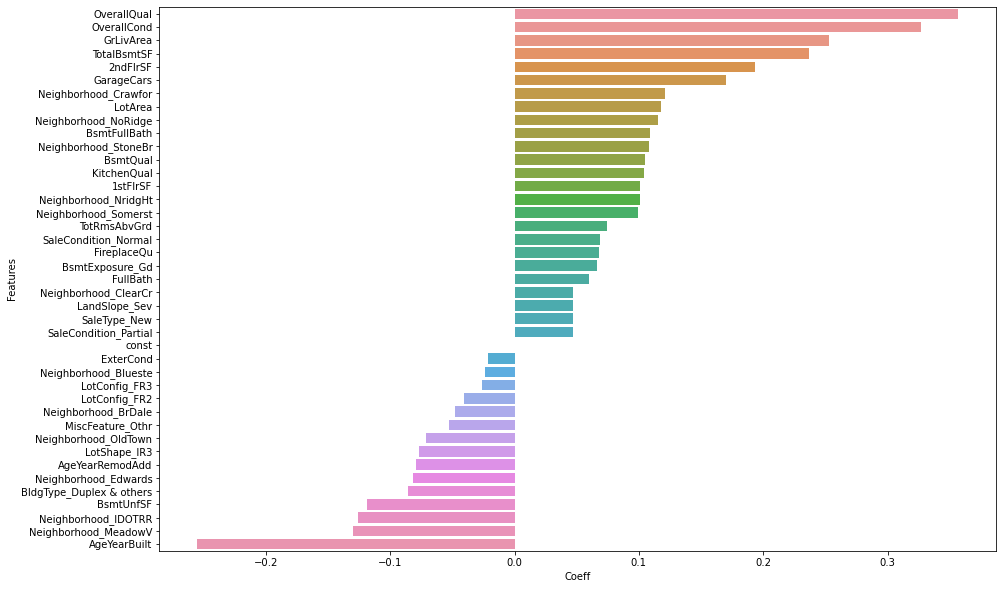

In [127]:
plt.figure(figsize=(15,10))
sns.barplot(y = 'Features', x='Coeff', data = ridge_df)
plt.show()

### Lasso

In [128]:
lasso = Lasso()
#cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv=folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
model_cv.best_params_

{'alpha': 0.0005}

In [130]:
alpha_lasso = 0.0005
lasso = Lasso(alpha = alpha_lasso)

lasso.fit(X_train_rfe, y_train)

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)


In [131]:
# y_pred_train = lm.predict(X_train)
# y_pred_test = lm.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train , y_pred_train)
print("r2_train score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train score: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test score: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse train score: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse test score: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train score:  0.9073883717686726
r2_test score:  0.8822731214031455
rss_train score:  15.778725922897808
rss_test score:  7.349150016558497
mse train score:  0.014409795363376993
mse test score:  0.02013465757961232


###### there is not seem to be having any difference in metrics. 

In ridge we had 40 features but here we have only 29 features, this tells us that lasso have done some feature elimination

In [132]:
lasso_df = pd.DataFrame({'features':X_train_rfe.columns,'Coeff':lasso.coef_.round(3), 'abs_coef':abs(lasso.coef_.round(3))}).sort_values(by='Coeff', ascending = False)
lasso_df = lasso_df[lasso_df.Coeff != 0]
lasso_df.reset_index(drop=True)

features  Coeff  abs_coef
0                OverallQual  0.440     0.440
1                OverallCond  0.365     0.365
2                  GrLivArea  0.360     0.360
3                TotalBsmtSF  0.271     0.271
4                 GarageCars  0.171     0.171
5                   2ndFlrSF  0.125     0.125
6                    LotArea  0.121     0.121
7       Neighborhood_Crawfor  0.119     0.119
8               BsmtFullBath  0.106     0.106
9       Neighborhood_NoRidge  0.093     0.093
10      Neighborhood_NridgHt  0.089     0.089
11      Neighborhood_Somerst  0.088     0.088
12               KitchenQual  0.086     0.086
13      Neighborhood_StoneBr  0.079     0.079
14               FireplaceQu  0.061     0.061
15           BsmtExposure_Gd  0.061     0.061
16                  BsmtQual  0.058     0.058
17              SaleType_New  0.057     0.057
18      SaleCondition_Normal  0.057     0.057
19      Neighborhood_ClearCr  0.039     0.039
20                  1stFlrSF  0.035     0.035
21                  FullBath  0.028     0.028
22     SaleCondition_Partial  0.023     0.023
23              TotRmsAbvGrd  0.002     0.002
24             LandSlope_Sev  0.001     0.001
25       Neighborhood_BrDale -0.018     0.018
26             LotConfig_FR2 -0.021     0.021
27              LotShape_IR3 -0.036     0.036
28      Neighborhood_OldTown -0.058     0.058
29      Neighborhood_Edwards -0.067     0.067
30           AgeYearRemodAdd -0.069     0.069
31  BldgType_Duplex & others -0.080     0.080
32      Neighborhood_MeadowV -0.099     0.099
33       Neighborhood_IDOTRR -0.109     0.109
34                 BsmtUnfSF -0.114     0.114
35              AgeYearBuilt -0.299     0.299

##### Top 10 features with Lasso regression

In [133]:
lasso_df.reset_index(drop=True).head(10)

features  Coeff  abs_coef
0           OverallQual  0.440     0.440
1           OverallCond  0.365     0.365
2             GrLivArea  0.360     0.360
3           TotalBsmtSF  0.271     0.271
4            GarageCars  0.171     0.171
5              2ndFlrSF  0.125     0.125
6               LotArea  0.121     0.121
7  Neighborhood_Crawfor  0.119     0.119
8          BsmtFullBath  0.106     0.106
9  Neighborhood_NoRidge  0.093     0.093

###### top absolute features in lasso regression

In [134]:
lasso_df.sort_values(by='abs_coef', ascending = False).reset_index(drop=True).head(10)

features  Coeff  abs_coef
0           OverallQual  0.440     0.440
1           OverallCond  0.365     0.365
2             GrLivArea  0.360     0.360
3          AgeYearBuilt -0.299     0.299
4           TotalBsmtSF  0.271     0.271
5            GarageCars  0.171     0.171
6              2ndFlrSF  0.125     0.125
7               LotArea  0.121     0.121
8  Neighborhood_Crawfor  0.119     0.119
9             BsmtUnfSF -0.114     0.114

##### Barplot of lasso features and with coefficients

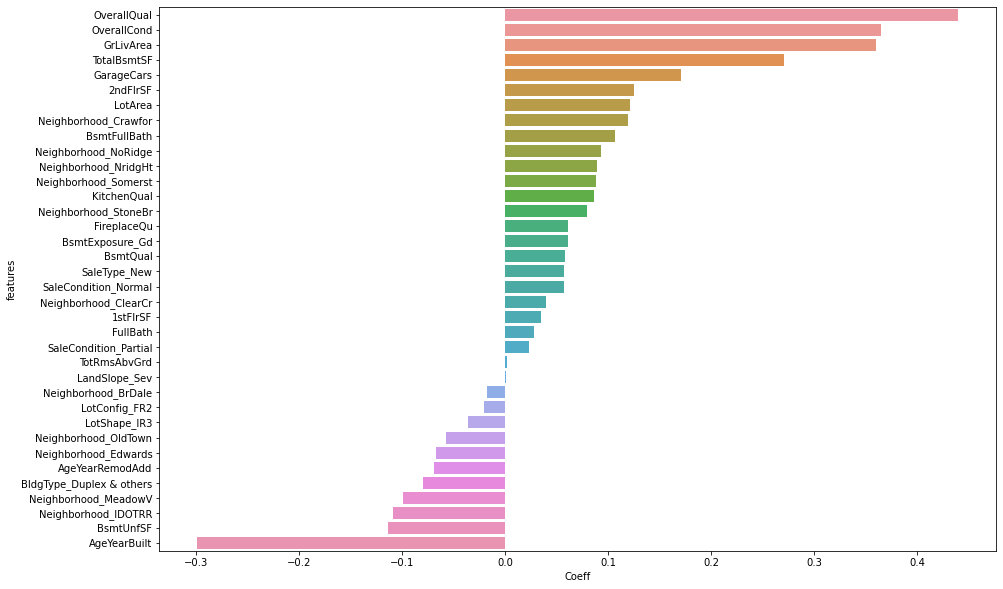

In [135]:
plt.figure(figsize=(15,10))
sns.barplot(y = 'features', x='Coeff', data = lasso_df)
plt.show()

#### top ten features in Lasso after taking absolute values of coefficients in account

#### Change in model if alpha is doubled

In [136]:
d_alpha_lasso = alpha_lasso *2 
lasso = Lasso(alpha = d_alpha_lasso)

lasso.fit(X_train_rfe, y_train)

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

In [137]:
# y_pred_train = lm.predict(X_train)
# y_pred_test = lm.predict(X_test)

metric_temp = []
r2_train_lr = r2_score(y_train , y_pred_train)
print("r2_train score: ",r2_train_lr)
metric_temp.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test score: ",r2_test_lr)
metric_temp.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train score: ",rss1_lr)
metric_temp.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test score: ",rss2_lr)
metric_temp.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse train score: ",mse_train_lr)
metric_temp.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse test score: ",mse_test_lr)
metric_temp.append(mse_test_lr**0.5)

r2_train score:  0.9073883717686726
r2_test score:  0.8822731214031455
rss_train score:  15.778725922897808
rss_test score:  7.349150016558497
mse train score:  0.014409795363376993
mse test score:  0.02013465757961232


###### Still not much significant change in the metrics as so.

#### Top positive features after alpha is doubled

In [138]:
lasso_df = pd.DataFrame({'features':X_train_rfe.columns,'Coeff':lasso.coef_.round(3),'abs_coef':abs(lasso.coef_.round(3))}).sort_values(by='Coeff', ascending = False)
lasso_df = lasso_df[lasso_df.Coeff != 0]
lasso_df.reset_index(drop=True)[['features','Coeff']].head(10)

features  Coeff
0           OverallQual  0.456
1             GrLivArea  0.421
2           OverallCond  0.322
3           TotalBsmtSF  0.271
4            GarageCars  0.173
5               LotArea  0.119
6  Neighborhood_Crawfor  0.105
7          BsmtFullBath  0.099
8           KitchenQual  0.090
9  Neighborhood_Somerst  0.074

#### Top absolute features

In [139]:
lasso_df.sort_values(by='abs_coef', ascending = False).reset_index(drop=True)

features  Coeff  abs_coef
0                OverallQual  0.456     0.456
1                  GrLivArea  0.421     0.421
2                OverallCond  0.322     0.322
3               AgeYearBuilt -0.290     0.290
4                TotalBsmtSF  0.271     0.271
5                 GarageCars  0.173     0.173
6                    LotArea  0.119     0.119
7       Neighborhood_Crawfor  0.105     0.105
8               BsmtFullBath  0.099     0.099
9                  BsmtUnfSF -0.098     0.098
10       Neighborhood_IDOTRR -0.093     0.093
11               KitchenQual  0.090     0.090
12           AgeYearRemodAdd -0.080     0.080
13  BldgType_Duplex & others -0.079     0.079
14      Neighborhood_NoRidge  0.074     0.074
15      Neighborhood_Somerst  0.074     0.074
16      Neighborhood_NridgHt  0.070     0.070
17               FireplaceQu  0.065     0.065
18              SaleType_New  0.060     0.060
19      Neighborhood_Edwards -0.060     0.060
20           BsmtExposure_Gd  0.058     0.058
21                  2ndFlrSF  0.054     0.054
22      Neighborhood_OldTown -0.053     0.053
23      SaleCondition_Normal  0.047     0.047
24                  BsmtQual  0.043     0.043
25      Neighborhood_StoneBr  0.034     0.034
26      Neighborhood_MeadowV -0.032     0.032
27      Neighborhood_ClearCr  0.014     0.014
28                  FullBath  0.009     0.009
29     SaleCondition_Partial  0.006     0.006

#### BarPlot of the feature of lasso regression with double alpha and their coefficient values

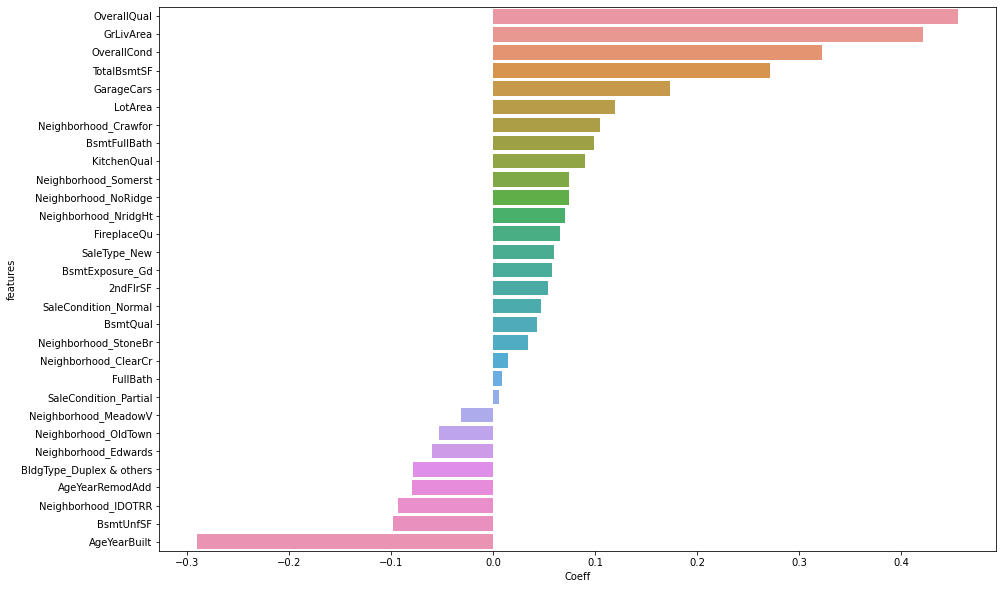

In [140]:
plt.figure(figsize=(15,10))
sns.barplot(y = 'features', x='Coeff', data = lasso_df)
plt.show()

In [141]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.911751          0.910081          0.907388
1   R2 Score (Test)           0.889681          0.886302          0.882273
2       RSS (Train)          15.035474         15.319927         15.778726
3        RSS (Test)           6.886737          7.097624          7.349150
4       MSE (Train)           0.117179          0.118283          0.120041
5        MSE (Test)           0.137360          0.139447          0.141897

According to what we can see in above models definitely Lasso is better as it is doing some good feature selection without loosing the accuracy of the model. we get 29 features remaining from 40 features which we selected using RFE. 

### Observing changes in coefficients after Regularization

In [142]:
p_values = lm.summary2().tables[1]['P>|t|']
# p_values.round(3)

In [143]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X_train_rfe.columns

betas['Linear'] = lm.params[1].round(3)
betas['p-value'] = p_values.round(3)
betas['Ridge'] = ridge.coef_.round(3)
betas['Lasso'] = lasso.coef_.round(3)

pd.set_option('display.max_rows', None)
betas

Linear  p-value  Ridge  Lasso
const                      0.118    0.000  0.000  0.000
LotArea                    0.118    0.000  0.118  0.119
OverallQual                0.118    0.000  0.314  0.456
OverallCond                0.118    0.000  0.268  0.322
ExterCond                  0.118    0.113 -0.006 -0.000
BsmtQual                   0.118    0.021  0.116  0.043
BsmtUnfSF                  0.118    0.000 -0.106 -0.098
TotalBsmtSF                0.118    0.000  0.220  0.271
1stFlrSF                   0.118    0.045  0.108  0.000
2ndFlrSF                   0.118    0.001  0.180  0.054
GrLivArea                  0.118    0.000  0.251  0.421
BsmtFullBath               0.118    0.000  0.107  0.099
FullBath                   0.118    0.137  0.068  0.009
KitchenQual                0.118    0.001  0.116  0.090
TotRmsAbvGrd               0.118    0.161  0.076  0.000
FireplaceQu                0.118    0.000  0.076  0.065
GarageCars                 0.118    0.000  0.169  0.173
AgeYearBuilt               0.118    0.000 -0.222 -0.290
AgeYearRemodAdd            0.118    0.001 -0.094 -0.080
LotShape_IR3               0.118    0.016 -0.063 -0.000
LotConfig_FR2              0.118    0.029 -0.035 -0.000
LotConfig_FR3              0.118    0.401 -0.016 -0.000
LandSlope_Sev              0.118    0.125  0.037  0.000
Neighborhood_Blueste       0.118    0.434 -0.014 -0.000
Neighborhood_BrDale        0.118    0.048 -0.035 -0.000
Neighborhood_ClearCr       0.118    0.054  0.042  0.014
Neighborhood_Crawfor       0.118    0.000  0.113  0.105
Neighborhood_Edwards       0.118    0.000 -0.085 -0.060
Neighborhood_IDOTRR        0.118    0.000 -0.124 -0.093
Neighborhood_MeadowV       0.118    0.000 -0.107 -0.032
Neighborhood_NoRidge       0.118    0.000  0.114  0.074
Neighborhood_NridgHt       0.118    0.000  0.096  0.070
Neighborhood_OldTown       0.118    0.001 -0.075 -0.053
Neighborhood_Somerst       0.118    0.000  0.095  0.074
Neighborhood_StoneBr       0.118    0.000  0.095  0.034
BldgType_Duplex & others   0.118    0.000 -0.087 -0.079
BsmtExposure_Gd            0.118    0.000  0.069  0.058
MiscFeature_Othr           0.118    0.082 -0.033 -0.000
SaleType_New               0.118    0.000  0.046  0.060
SaleCondition_Normal       0.118    0.000  0.068  0.047
SaleCondition_Partial      0.118    0.000  0.046  0.006

As we can see most of the features having p-value more than 0.05 now have reduced their coefficient to 0 by lasso regression.

When we had 40 features after RFE now using Lasso we have only 29 features left and without loosing much accuracy of the model.

Clearly Lasso is a better choice 

<hr>

->>assignment ends here

### subjective questions solutions

###### What if 5 most important predictor variables are gone, then which features would be the next top 5??

In [ ]:
ridge_5=['OverallQual','GrLivArea','OverallCond', '2ndFlrSF','AgeYearBuilt']
Lasso_5 = ['OverallQual','GrLivArea','OverallCond','AgeYearBuilt','TotalBsmtSF']



### Ridge regression

In [ ]:
X_train_rdg = X_train_rfe.drop(ridge_5, axis = 1)


In [ ]:
X_test_rdg = X_test_rfe.drop(ridge_5, axis = 1)

In [ ]:
X_train_rdg.head()

In [ ]:
ridge = Ridge()
#cross validation
folds = 5
rdg_model_cv = GridSearchCV(estimator=ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv=folds,
                       return_train_score = True,
                       verbose = 1)

rdg_model_cv.fit(X_train_rdg, y_train)

In [ ]:
rdg_model_cv.best_params_

In [ ]:
ridge = Ridge(alpha = 4)

ridge.fit(X_train_rdg, y_train)

y_pred_train = ridge.predict(X_train_rdg)
y_pred_test = ridge.predict(X_test_rdg)

In [ ]:
# y_pred_train = lm.predict(X_train)
# y_pred_test = lm.predict(X_test)

metric_temp = []
r2_train_lr = r2_score(y_train , y_pred_train)
print("r2_train score: ",r2_train_lr)
metric_temp.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test score: ",r2_test_lr)
metric_temp.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train score: ",rss1_lr)
metric_temp.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test score: ",rss2_lr)
metric_temp.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse train score: ",mse_train_lr)
metric_temp.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse test score: ",mse_test_lr)
metric_temp.append(mse_test_lr**0.5)

Things have gotten pretty rough after deleting top performing features, we can clearly see around 10% of decrement in train and test r-squared.



In [ ]:
pd.DataFrame(
    {
    'Features':X_train_rdg.columns,
    'Coeff':ridge.coef_.round(3),
    'abs_coef': abs(ridge.coef_.round(3))
    }
).sort_values(by='abs_coef', ascending=False).reset_index(drop=True).head(5)

So here we have the top 5 columns for Ridge regression if previous top 5 columns were to lost.

#### Same For Lasso

In [ ]:
X_train_ls = X_train_rfe.drop(Lasso_5, axis = 1)
X_test_ls = X_test_rfe.drop(Lasso_5, axis = 1)


In [ ]:
lasso = Lasso()
#cross validation
folds = 5
lso_model_cv = GridSearchCV(estimator=lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv=folds,
                       return_train_score = True,
                       verbose = 1)

lso_model_cv.fit(X_train_ls, y_train)

In [ ]:
lso_model_cv.best_params_


In [ ]:
lasso = Lasso(alpha = 0.0002)

lasso.fit(X_train_ls, y_train)

y_pred_train = lasso.predict(X_train_ls)
y_pred_test = lasso.predict(X_test_ls)

In [ ]:
# y_pred_train = lm.predict(X_train)
# y_pred_test = lm.predict(X_test)

metric_temp = []
r2_train_lr = r2_score(y_train , y_pred_train)
print("r2_train score: ",r2_train_lr)
metric_temp.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test score: ",r2_test_lr)
metric_temp.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train score: ",rss1_lr)
metric_temp.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test score: ",rss2_lr)
metric_temp.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse train score: ",mse_train_lr)
metric_temp.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse test score: ",mse_test_lr)
metric_temp.append(mse_test_lr**0.5)

we still can see some decrement in train and test r-squared from previous lasso when we had previous top 5 lasso features, and a slight increase in MSE.

In [ ]:
pd.DataFrame(
    {
    'Features':X_train_ls.columns,
    'Coeff':lasso.coef_.round(3),
    'abs_coef': abs(lasso.coef_.round(3))
    }
).sort_values(by='abs_coef', ascending=False).reset_index(drop=True).head(5)

##### here we have the new top 5 features in Lasso regression